# **Task 1**

## ***Introduction to Quantum Computing***

### [All About Qubits](https://pennylane.ai/codebook/01-introduction-to-quantum-computing/01-all-about-qubits/)

#### Codercise I.1.1 -- Normalizatuon of quantum states


$| \psi \rangle = \alpha | 0 \rangle + \beta| 1 \rangle$ where $ |\alpha|^2 + |\beta|^2 \neq 1$. Given that, we can normalize like this:

In [23]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    alpha_prime = alpha / norm
    beta_prime = beta / norm

    return np.array([alpha_prime, beta_prime])

    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR
    pass


#### Codercise I.1.2 -- Inner product and orthonormal bases


In [24]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    state_1_conj = np.conj(state_1)

    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT
    return np.dot(state_1_conj, state_2)



# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


#### Codercise I.1.3 -- Sampling measurement outcomes

In [25]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    prob_0 = np.abs(state[0])**2
    prob_1 = np.abs(state[1])**2

    if not np.isclose(prob_0 + prob_1, 1):
        raise ValueError("The state is not properly normalized.")

    outcomes = [0, 1]

    measurements = np.random.choice(outcomes, size=num_meas, p=[prob_0, prob_1])

    return measurements
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    pass


#### Codercise I.1.4 -- Applying a quantum operation

To preserve the normalization of amplitudes of our quantum state, we use unitary matrices. $| \psi' \rangle = U | \psi \rangle$

In [26]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    state_prime = np.matmul(U, state)

    return state_prime
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    pass


#### Codercise I.1.5 -- A simple quantum algorithm

We initialize a qubit in state $| 0 \rangle$, Apply a Unitary operation $U$, and simulate measuring the output 100 times

In [27]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    state = np.array([1, 0])

    return state

    ##################

    # PREPARE THE STATE |0>
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    qubit_1 = initialize_state()
    qubit_1_next = apply_u(qubit_1)
    measurements = measure_state(qubit_1_next, 100)
    return measurements
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass


### [Quantum Circuits](https://pennylane.ai/codebook/01-introduction-to-quantum-computing/02-quantum-circuits/)

#### Codercise I.2.1 -- Order of Operations

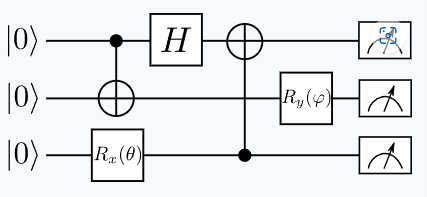

We need to reorder the operations.

In [28]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)


    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])


#### Codercise I.2.2 -- Building a QNode

`my_qnode = qml.QNode(my_circuit, my_device)` turns our uantum circuit into nodes that can be executed on real quantum hardware.

Let us implemment the following circuit, make it a QNode and run on a Pennylane device:

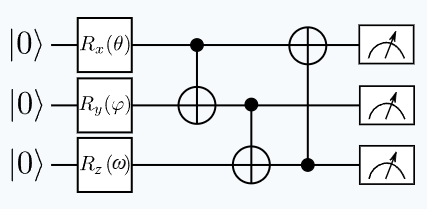

In [29]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES


    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

#### Codercise I.2.3 -- The QNode Decorator

`@qml.qnode(dev)` runs a QNode with the same name as our quantum function on the specified device `dev`. Same as the previous codercise, we apply a decorator to the quantum function to construct a QNode, then run it according to the parameters we've been given.

In [30]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS


#### Codercise I.2.4 -- Circuit Depth

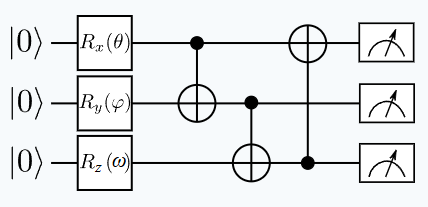



has circuit depth 4, which is the number of steps our circuit take to finish running. We can also interpret depth as the number of layers we have in our circuit.

### [Unitary Matrices](https://pennylane.ai/codebook/01-introduction-to-quantum-computing/03-unitary-matrices/)

#### Codercise I.3.1 -- Unitaries in PennyLane

`QubitUnitary` is used to apply a uniraty operation in Pennylane. We apply a unitary `U` directly in the following circuit as opposed to `apply_u` our function from before:

In [31]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #

    # Use QubitUnitary to apply U to the qubit
    qml.QubitUnitary(U, wires=0)
    #apply to the zeroth qubit which is initialized to the |0> state
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT

    # Return the state
    return qml.state()


#### Codercise I.3.2 -- Parametrised Unitaries

We apply the single qubit parametrised rotation, `qml.Rot`
$$ U(\phi, \theta, \omega) = \begin{bmatrix} e^{-i(\phi+\omega)/2} \cos(\theta/2) & -e^{-i(\phi-\omega)/2} \sin(\theta/2) \\ e^{i(\phi-\omega)/2} \sin(\theta/2) & e^{i(\phi+\omega)/2} \cos(\omega/2) \end{bmatrix} $$


In [32]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    qml.Rot(phi, theta, omega, wires=0)
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()


## ***Single-Qubit Gates***

### [X and H](https://pennylane.ai/codebook/02-single-qubit-gates/01-x-and-h/)

#### Codercise I.4.1 -- Flipping Bits

We illustrate the use of `qml.PauliX` and then apply a Unitary $U$ with `qml.QubitUnitary`

In [33]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    if state == 1:
        qml.PauliX(wires=0)

    qml.QubitUnitary(U, wires=0)
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER

    # APPLY U TO THE STATE

    return qml.state()


#### Codercise I.4.2 -- Uniform Superposition

We illustrate the use of the Hadamard Gate that creates uniform superpostions

In [34]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    ##################

    # APPLY THE HADAMARD GATE

    # RETURN THE STATE
    return qml.state()


#### Codercise I.4.3 -- Combining X and H gates

In [36]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    if state == 1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state

    # APPLY THE HADAMARD

    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


#### Codercise I.4.4 -- A QNode with X and H

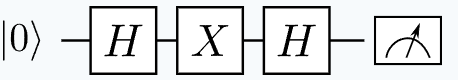

In [37]:
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)


# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)

def apply_hxh(state):
    if state == 1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)


    return qml.state()
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


### [It's Just a Phase](https://pennylane.ai/codebook/02-single-qubit-gates/02-its-just-a-phase/)

#### Codercise I.5.1 -- The Pauli Z gate

We apply the Pauli-$Z$ gate to $|+\rangle$ state:

In [38]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)

    qml.PauliZ(wires=0)

    # Return the state

    ##################

    # CREATE THE |+> STATE

    # APPLY PAULI Z

    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


#### Codercise I.5.2 -- The Pauli Z rotation

$RZ(\omega)|\psi\rangle = e^{-i \frac{\omega}{2}} \alpha |0\rangle + \beta e^{i \frac{\omega}{2}} |1 \rangle$ ~ $ \alpha|0\rangle + \beta|1\rangle$

In [39]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # Create the |+> state
    qml.Hadamard(wires=0)

    # Apply RZ with an angle of π
    qml.RZ(np.pi, wires=0)
    # RETURN THE STATE
    return qml.state()

print(fake_z())

[4.32978028e-17-0.70710678j 4.32978028e-17+0.70710678j]


#### Codercise I.5.3 -- The S and T gates

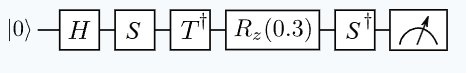

In [40]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    # Apply a series of rotation gates
    # Apply the Hadamard gate
    qml.Hadamard(wires=0)

    # Apply the S gate
    qml.S(wires=0)

    # Apply the T gate's adjoint
    qml.adjoint(qml.T)(wires=0)

    # Apply the Rz gate with an angle of 0.3
    qml.RZ(0.3, wires=0)

    # Apply the S† gate (conjugate transpose of the S gate)
    qml.adjoint(qml.S)(wires=0)



    # RETURN THE STATE

    return qml.state()

print(many_rotations())

[0.69916673-0.10566872j 0.56910461-0.41966647j]


### [From a Different Angle](https://pennylane.ai/codebook/02-single-qubit-gates/03-from-a-different-angle/)

#### Codercise I.6.1 -- Applying $RX$

In [41]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires=0)
    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


### Codercise I.6.2 -- Plotting $RX$

$$ R_X(\theta) = \begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2) \\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} $$

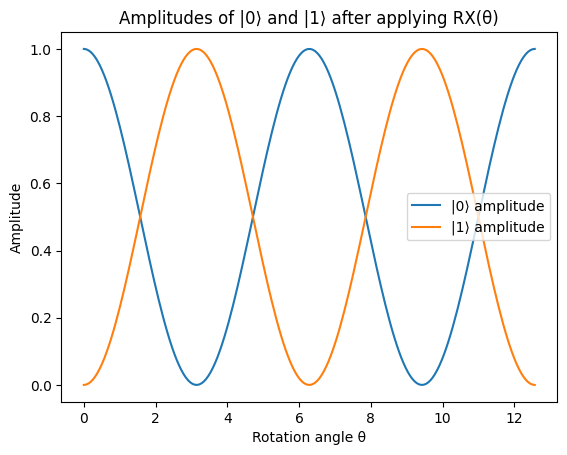

In [45]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    # Apply RX(theta) and return the state
    qml.RX(theta, wires=0)

    return qml.state()

# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

# Extract the amplitudes of |0⟩ and |1⟩
amplitudes_0 = np.abs(output_states[:, 0])**2
amplitudes_1 = np.abs(output_states[:, 1])**2

# Plot the amplitudes
plt.plot(angles, amplitudes_0, label='|0⟩ amplitude')
plt.plot(angles, amplitudes_1, label='|1⟩ amplitude')
plt.xlabel('Rotation angle θ')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Amplitudes of |0⟩ and |1⟩ after applying RX(θ)')
plt.show()


#### Codercise I.6.3 -- Plotting $RY$
$$ R_Y(\theta) = \begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} $$

In [47]:
!pip install plotter

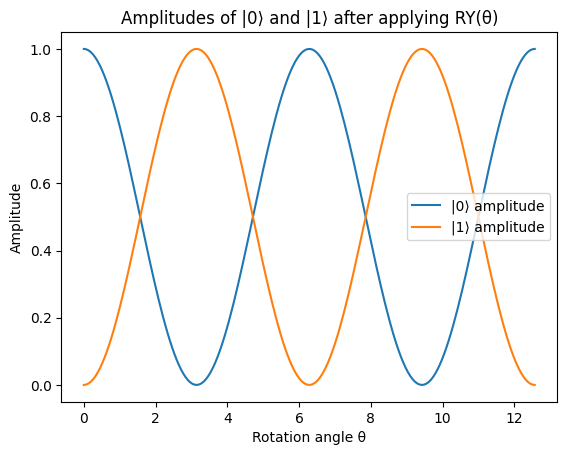

In [73]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires=0)

    return qml.state()


# # Code for plotting
# angles = np.linspace(0, 4 * np.pi, 200)
# output_states = np.array([apply_ry(t, 0) for t in angles])

# plot = plotter(angles, output_states)

# Extract the amplitudes of |0⟩ and |1⟩
amplitudes_0 = np.abs(output_states[:, 0])**2
amplitudes_1 = np.abs(output_states[:, 1])**2

# Plot the amplitudes
plt.plot(angles, amplitudes_0, label='|0⟩ amplitude')
plt.plot(angles, amplitudes_1, label='|1⟩ amplitude')
plt.xlabel('Rotation angle θ')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Amplitudes of |0⟩ and |1⟩ after applying RY(θ)')
plt.show()



### [Universal Gate Sets](https://pennylane.ai/codebook/02-single-qubit-gates/04-universal-gate-sets/)

#### Codercise I.7.1 -- Universality of Rotations

We need to find the set of angles `phi, theta, omega` such that


    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)

they act the same as a Hadamard (up to a global phase)



In [74]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()




To find the angles $\phi$, $\theta$, and $\omega$ such that the sequence of gates $ \text{RZ}(\phi) $, $ \text{RX}(\theta) $, and $ \text{RZ}(\omega) $ acts the same as a Hadamard gate (up to a global phase), we can use the following decomposition.


The matrix representation of the Hadamard gate $H$
$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$


The matrix representation of the $ \text{RZ}(\phi) $, $ \text{RX}(\theta) $, and $ \text{RZ}(\omega) $ gates

$$ RZ(\phi) = \begin{pmatrix} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2} \end{pmatrix} $$

$$ RX(\theta) = \begin{pmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{pmatrix} $$

$$ RZ(\omega) = \begin{pmatrix} e^{-i\omega/2} & 0 \\ 0 & e^{i\omega/2} \end{pmatrix} $$


To find the angles that match the Hadamard gate, we need
 multiply these matrices and compare the result to the Hadamard's matrix.


$ RZ(\phi) \cdot RX(\theta) $ = \begin{pmatrix} e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2} \end{pmatrix} \begin{pmatrix} \cos(\theta/2) & -i\sin(\theta/2) \\ -i\sin(\theta/2) & \cos(\theta/2) \end{pmatrix}

= \begin{pmatrix} e^{-i\phi/2}\cos(\theta/2) & -ie^{-i\phi/2}\sin(\theta/2) \\ -ie^{i\phi/2}\sin(\theta/2) & e^{i\phi/2}\cos(\theta/2) \end{pmatrix}


$$ \left( RZ(\phi) \cdot RX(\theta) \right) \cdot RZ(\omega) = \begin{pmatrix} e^{-i\phi/2}\cos(\theta/2) & -ie^{-i\phi/2}\sin(\theta/2) \\ -ie^{i\phi/2}\sin(\theta/2) & e^{i\phi/2}\cos(\theta/2) \end{pmatrix} \begin{pmatrix} e^{-i\omega/2} & 0 \\ 0 & e^{i\omega/2} \end{pmatrix} $$

$$ = \begin{pmatrix} e^{-i(\phi+\omega)/2}\cos(\theta/2) & -ie^{-i(\phi-\omega)/2}\sin(\theta/2) \\ -ie^{i(\phi-\omega)/2}\sin(\theta/2) & e^{i(\phi+\omega)/2}\cos(\theta/2) \end{pmatrix} $$


To match the Hadamard gate, so we set

$$ \phi = \frac{\pi}{2}, \quad \theta = \frac{\pi}{2}, \quad \omega = \frac{\pi}{2} $$

Substituting these values,

$$ RZ\left(\frac{\pi}{2}\right) \cdot RX\left(\frac{\pi}{2}\right) \cdot RZ\left(\frac{\pi}{2}\right) = \begin{pmatrix} e^{-i\pi/2}\cos(\pi/4) & -ie^{-i\pi/2}\sin(\pi/4) \\ -ie^{i\pi/2}\sin(\pi/4) & e^{i\pi/2}\cos(\pi/4) \end{pmatrix} $$

$$ = \frac{1}{\sqrt{2}} \begin{pmatrix} e^{-i\pi/2} & -ie^{-i\pi/2} \\ -ie^{i\pi/2} & e^{i\pi/2} \end{pmatrix} $$


This matches the Hadamard gate up to a global phase.

#### Codercise I.7.2 -- Synthesizing a circuit
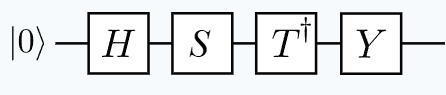

In [75]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(3*np.pi/4, wires=0)
    qml.RX(np.pi, wires=0)
    qml.RZ(np.pi, wires=0)
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX

    return qml.state()


To implement the given circuit using only $ RZ $ and $ RX $ gates, we need to decompose each gate in the sequence (Hadamard $ H $, Phase $ S $, T-dagger $ T^\dagger $, and Pauli-$ Y $) into equivalent rotations around the Z and X axes.

 $ H = RZ(\pi/2) \cdot RX(\pi/2)
 \cdot RZ(\pi/2) $

$ S = RZ(\pi/2) $

$T^\dagger = RZ(-\pi/4) $
$ Y = RX(\pi) \cdot RZ(\pi) $

Combining these decompositions, we get the following gate operation--

$$ H \cdot S \cdot T^\dagger \cdot Y = (RZ(\pi/2) \cdot RX(\pi/2) \cdot RZ(\pi/2)) \cdot RZ(\pi/2) \cdot RZ(-\pi/4) \cdot (RX(\pi) \cdot RZ(\pi)) $$

We can combine consecutive $ RZ $ gates to simplify, because applying two rotations of the same type is equivalent to rotating by the total angle

$RZ(\pi/2) \cdot RX(\pi/2) \cdot RZ(\pi/2) \cdot RZ(\pi/2) \cdot RZ(-\pi/4) \cdot RX(\pi) \cdot RZ(\pi) $

$ = RZ(\pi/2) \cdot RX(\pi/2) \cdot RZ(\pi) \cdot RZ(-\pi/4) \cdot RX(\pi) \cdot RZ(\pi) $

$ = RZ(\pi/2) \cdot RX(\pi/2) \cdot RZ(3\pi/4) \cdot RX(\pi) \cdot RZ(\pi) $

#### Codercise I.7.3 -- Universality of H and T

$$ U = \frac{1}{\sqrt{2}^3} ̇  
 \begin{pmatrix} 1 + e^{i\pi/4} + i(1 - e^{i\pi/4})  & 1 - e^{i\pi/4} + i(1 + e^{i\pi/4})\\ 1 + e^{i\pi/4} - i(1 - e^{i\pi/4}) & 1 - e^{i\pi/4} + i(1 + e^{i\pi/4}) \end{pmatrix} $$

In [77]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()


We know that the Hadamard is its own inverse, so we cannot have consecutive Hadamard gates. The common denominator of all terms hints that we must have three Hadamards. We apply consecutive Ts.

### [Prepare Yourself](https://pennylane.ai/codebook/02-single-qubit-gates/05-prepare-yourself/)

#### Codercise I.8.1 -- State Preparation

In [78]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    # Apply the Hadamard gate to create a superposition state
    qml.Hadamard(wires=0)
    # Apply the phase shift to the |1> component
    qml.PhaseShift(5*np.pi/4, wires=0)
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE

    return qml.state()



Hadamard Gate $ H $:

$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $

$ H|0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $

The Phase Shift gate $ RZ(\theta) $ applies a phase shift to the $|1\rangle$ part,

$ RZ(\theta)$ = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix}

 For $\theta = 5\pi/4$, the gate is: $RZ(5\pi/4) = \begin{pmatrix} 1 & 0 \\ 0 & e^{i5\pi/4} \end{pmatrix} $

 Applying this to the superposition state, $ RZ(5\pi/4) \left( \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \right) = \frac{1}{\sqrt{2}} |0\rangle + \frac{e^{i5\pi/4}}{\sqrt{2}} |1\rangle $


 we therefore get the intended state.


### Codercise I.8.2 -- State Preparation Revisited

In [79]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    qml.RX(np.pi/3, wires=0)

    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE

    return qml.state()




Applying $ \text{RX}(\pi/3) $
for $\theta = \pi/3$:

$ \text{RX}(\pi/3) = \begin{pmatrix} \cos(\pi/6) & -i\sin(\pi/6) \\ -i\sin(\pi/6) & \cos(\pi/6) \end{pmatrix} $


$ \cos(\pi/6) = \frac{\sqrt{3}}{2}, \quad \sin(\pi/6) = \frac{1}{2} $


$ \text{RX}(\pi/3) = \begin{pmatrix} \frac{\sqrt{3}}{2} & -i\frac{1}{2} \\ -i\frac{1}{2} & \frac{\sqrt{3}}{2} \end{pmatrix} $

The initial state of the qubit is:
$ |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $

Applying $ \text{RX}(\pi/3) $ to $|0\rangle$,

$ \text{RX}(\pi/3) |0\rangle = \begin{pmatrix} \frac{\sqrt{3}}{2} & -i\frac{1}{2} \\ -i\frac{1}{2} & \frac{\sqrt{3}}{2} \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} \frac{\sqrt{3}}{2} \ -i\frac{1}{2} \end{pmatrix} $

This results in our given state
$ |\psi\rangle = \frac{\sqrt{3}}{2} |0\rangle - \frac{i}{2} |1\rangle $

#### Codercise I.8.3 -- State preparation wth Mottonen's method

We learn about automatic templates in Pennylane that do state prep on their own

```
def my_circuit():
    qml.MyTemplate(parameters, wires)
```

 `MottonenStatePreparation`prepares any normalized qubit state vector up to a global phase -- like how we manually did above.

In [80]:
import pennylane as qml
from pennylane import numpy as np

# Define the state vector
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

# Create a device
dev = qml.device("default.qubit", wires=1)

# Construct a QNode that uses qml.MottonenStatePreparation
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state, wires=0)
    return qml.state()

# Verify the result
state = prepare_state(v)
print(state)
print()
print(qml.draw(prepare_state, expansion_strategy="device")(v))


[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


### [Measurements](https://pennylane.ai/codebook/02-single-qubit-gates/06-measurements/)

#### Codercise I.9.1 -- Measuring Superposition

`return qml.probs(wires=...)` measures the qubits we want to measure.

The `qml.probs` function returns the probabilities of measuring each computational basis state $|00⟩, |01⟩, |10⟩, |11⟩$ giving out an array of probabilities corresponding to these computational basis states.

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


#### Codercise I.9.2 -- Y basis rotation

In [87]:
##################
# YOUR CODE HERE #
##################


# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RY(2 * np.arctan(np.sqrt(3)), wires=0)
    qml.RZ(np.pi / 2, wires=0)
    pass


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.RY(-np.pi / 2, wires=0)
    qml.RZ(-np.pi / 2, wires=0)
    pass


#### Codercise I.9.3 -- Measurement in the Y basis

In [88]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE
    prepare_psi()
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    # Perform the adjoint rotation back to the computational basis
    qml.adjoint(y_basis_rotation)()
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires=0)


print(measure_in_y_basis())


[0.9330127 0.0669873]


### [What Did You Expect?](https://pennylane.ai/codebook/02-single-qubit-gates/07-what-did-you-expect/)

#### Codercise I.10.1 -- Measurement of the `PauliY` observable

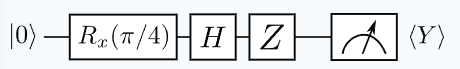

In [81]:
import pennylane as qml
from pennylane import numpy as np

# Define a device with 1 qubit
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit():
    # Apply Rx gate with angle π/4
    qml.RX(np.pi / 4, wires=0)
    # Apply Hadamard gate
    qml.Hadamard(0)
    # Apply Pauli-Z gate
    qml.PauliZ(0)
    # Measure the PauliY observable
    return qml.expval(qml.PauliY(0))

# Execute the circuit
result = circuit()
print(f"Expectation value of PauliY: {result}")


Expectation value of PauliY: -0.7071067811865471


#### Codercise I.10.2 -- Setting up the number of experiment shots

In [83]:
import pennylane as qml
from pennylane import numpy as np

# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

# Define the circuit from the previous exercise
def create_circuit():
    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi / 4, wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(0))
    return circuit

for shots in shot_values:
    # Initialize a device with the current number of shots
    dev = qml.device("default.qubit", wires=1, shots=shots)

    # Create the QNode
    circuit = create_circuit()

    # Run the circuit and store the result
    result = circuit()
    shot_results.append(result)

print(qml.math.unwrap(shot_results))


[-0.78, -0.704, -0.7192, -0.70502, -0.706582]


#### Codercise I.10.3 -- Evaluating the samples

In [84]:
import pennylane as qml
from pennylane import numpy as np

# Define the device with 100000 shots
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    # Return the measurement samples of the PauliY observable
    return qml.sample(qml.PauliY(0))

def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """
    # Compute the expectation value as the mean of the samples
    estimated_expval = np.mean(samples)
    return estimated_expval

# Run the circuit to get the samples
samples = circuit()

# Compute the expectation value from the samples
print(compute_expval_from_samples(samples))


-0.70536


We can access samples using `qml.sample`

#### Codercise I.10.4 -- The variance of sample measurements

We can tinker with the number of shots to see how the expectation value's accuracy changes.

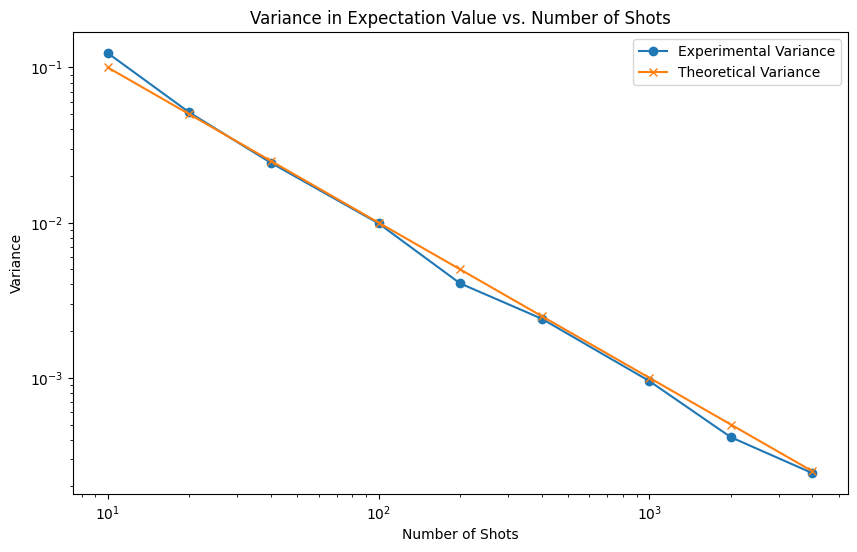

In [85]:
import pennylane as qml
from pennylane import numpy as np

def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    # Create a device with the given number of shots
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # Decorate the circuit below to create a QNode
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # Run the QNode n_trials times and collect the results
    results = [circuit() for _ in range(n_trials)]

    # Return the variance of the results
    return np.var(results)

def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    # Estimate the variance based on the number of shots
    # The variance of the expectation value scales inversely with the number of shots
    estimated_variance = 1 / n_shots
    return estimated_variance

# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(shot_vals, results_experiment, 'o-', label='Experimental Variance')
plt.plot(shot_vals, results_scaling, 'x-', label='Theoretical Variance')
plt.xlabel('Number of Shots')
plt.ylabel('Variance')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Variance in Expectation Value vs. Number of Shots')
plt.show()


## ***Circuits with Many Qubits***

### [Multi-Qubit Systems](https://pennylane.ai/codebook/03-circuits-many-qubits/01-multi-qubit-systems/)

#### Codercise I.11.1 – Preparing Basis State

Pennylane's qubit ordering convention is from left to right. For example, a state $|1010\rangle$ means that the first, third qubits (wires 0, 2) are in state $|1\rangle$, while the second and fourth qubits are in state $|0\rangle$.

 Let us draw the circuit.

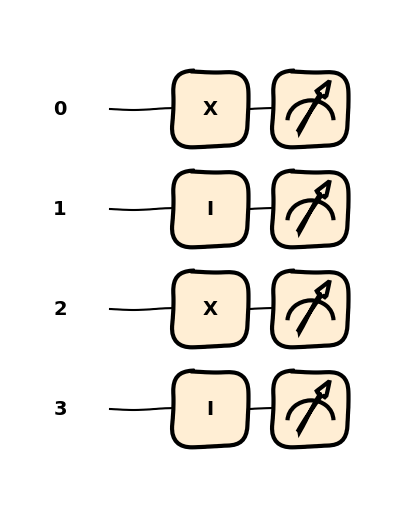

State vector: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

num_wires = 4
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    qml.Identity(wires=1)
    qml.PauliX(wires=2)
    qml.Identity(wires=3)
    return qml.state()

# Draw the circuit
fig, ax = qml.draw_mpl(circuit, style="sketch")()
plt.show()

# Execute the circuit
result = circuit()
print("State vector:", result)


**Qubit ordering conventions of some quantum computing SDKS**:

*Top to bottom in circuit diagrams, with the first qubit at the top* - Braket (Amazon)

*Left to right in circuit diagrams, with the first qubit on the left* - Qiskit (IBM Quantum),   Q# (Microsoft Quantum Development Kit), PyQuil (Rigetti), Cirq (Google), Strawberry Fields (Xanadu)

In this codercise, we code up a circuit in PennyLane that accepts an integer value, then prepares and returns the corresponding computational basis state vector  (Assuming a 3-qubit device). We try four integers and see how the state vector changes. We can either manipulate the individual qubits based on the bit values or use a built-in state preparation template from the [PennyLane template library](https://pennylane.readthedocs.io/en/stable/introduction/templates.html).

In [ ]:
import pennylane as qml
import numpy as np

num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def make_basis_state_manual(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id> by manipulating individual qubits."""
    binary_string = format(basis_id, f'0{num_wires}b')
    for i, bit in enumerate(binary_string):
        if bit == '1':
            qml.PauliX(wires=i)
    return qml.state()

@qml.qnode(dev)
def make_basis_state_template(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id> using a built-in state preparation template."""
    binary_string = format(basis_id, f'0{num_wires}b')
    basis_state = [int(bit) for bit in binary_string]
    qml.BasisState(np.array(basis_state), wires=range(num_wires))
    return qml.state()

# Examples
for basis_id in [0, 1, 5, 7]:
    print(f"Basis ID: {basis_id}, Output state (manual) = {make_basis_state_manual(basis_id)}")
    print(f"Basis ID: {basis_id}, Output state (template) = {make_basis_state_template(basis_id)}\n")


Basis ID: 0, Output state (manual) = [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Basis ID: 0, Output state (template) = [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

Basis ID: 1, Output state (manual) = [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Basis ID: 1, Output state (template) = [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

Basis ID: 5, Output state (manual) = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Basis ID: 5, Output state (template) = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]

Basis ID: 7, Output state (manual) = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Basis ID: 7, Output state (template) = [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]



#### Codercise I.11.2 – Separable Operations

We have to use PennyLane to create the state $| + 1 \rangle = | + \rangle \otimes | 1 \rangle$ and then return two measurements:
* the expectation value of $Y$ on the first qubit
* the expectation value of $Z$  on the second qubit


The Hadamard gate `qml.Hadamard` is applied to the first qubit to create the state $|+\rangle$ and Pauli-X gate `qml.PauliX` to the second qubit to create the state $|1\rangle$. The expectation value of the Pauli-Y operator on the first qubit is measured using `qml.expval(qml.PauliY(wires=0))` and that of the Pauli-Z operator on the second qubit using `qml.expval(qml.PauliZ(wires=1)`

[tensor(0., requires_grad=True), tensor(-1., requires_grad=True)]


Matplotlib is building the font cache; this may take a moment.


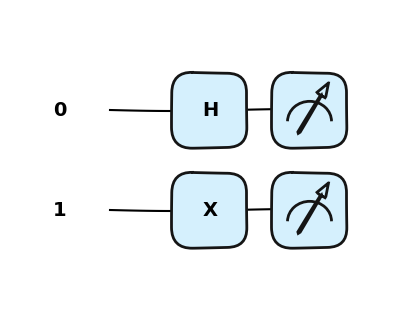

Expectation value of Y on the first qubit: 0j
Expectation value of Z on the second qubit: 0j


In [ ]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    # Create the state |+> on the first qubit
    qml.Hadamard(wires=0)
    # Create the state |1> on the second qubit
    qml.PauliX(wires=1)


    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return [qml.expval(qml.PauliY(wires=0)), qml.expval(qml.PauliZ(wires=1))]


print(two_qubit_circuit())

# Draw the circuit
fig, ax = qml.draw_mpl(two_qubit_circuit, style="pennylane_sketch")()
plt.show()

# Execute the circuit
result = circuit()
print("Expectation value of Y on the first qubit:", result[0])
print("Expectation value of Z on the second qubit:", result[1])


#### Codercise I.11.3 – Expectation value of two-qubit observable

We use PennyLane to create the state $|  -  \rangle = | 1 \rangle \otimes | - \rangle$  Then, we measure the expectation value of the two-qubit observable  $Z \otimes X$. Let us measure the expectation values of three more two-qubit obvservables as well.

In [ ]:
import pennylane as qml
import numpy as np

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    # Create the state |1> on the first qubit
    qml.PauliX(wires=0)
    # Create the state |-> on the second qubit
    qml.PauliX(wires=1)
    qml.Hadamard(wires=1)

    return [
        qml.expval(qml.PauliZ(wires=0) @ qml.PauliX(wires=1)),
        qml.expval(qml.PauliX(wires=0) @ qml.PauliY(wires=1)),
        qml.expval(qml.PauliY(wires=0) @ qml.PauliZ(wires=1)),
        qml.expval(qml.PauliX(wires=0) @ qml.PauliZ(wires=1))
    ]

# Execute the circuit
result = circuit()
print("Expectation value of Z ⊗ X:", result[0])
print("Expectation value of X ⊗ Y:", result[1])
print("Expectation value of Y ⊗ Z:", result[2])
print("Expectation value of X ⊗ Z:", result[3])


Expectation value of Z ⊗ X: 0.9999999999999996
Expectation value of X ⊗ Y: 0.0
Expectation value of Y ⊗ Z: 0.0
Expectation value of X ⊗ Z: 0.0


The Pauli-X gate `qml.PauliX` is applied to the first qubit to create the state $|1\rangle$. We apply the Pauli-X gate `qml.PauliX` followed by the Hadamard gate `qml.Hadamard` to the second qubit to create the $|-\rangle$ state.

We then measure the expectation value of the two-qubit observable $Z \otimes X$ using `qml.expval(qml.PauliZ(wires=0) @ qml.PauliX(wires=1)` and measure the expectation values of $X \otimes Y$, $Y \otimes Z$ and $X \otimes Z$. Why are the others `0.0`?

The state $| - \rangle = | 1 \rangle \otimes | - \rangle$ can be written

$$ | − \rangle = $ ∣1 \rangle \otimes \frac{1}{\sqrt{2}} ​(| 0 \rangle = 1 \rangle )$$ and the expectation value of an observable $O$ for a state $|\psi\rangle$ is given by: $⟨ψ∣O∣ψ⟩$
For example
$X \otimes Y$ = \begin{pmatrix}
 0 & -1 & 0  & 0  \\
 i & 0 & 0 & 0 \\
 0 & 0  & 0  & -i  \\
 0 & 0  & i & 0 \\
\end{pmatrix}

so the expectation value becomes 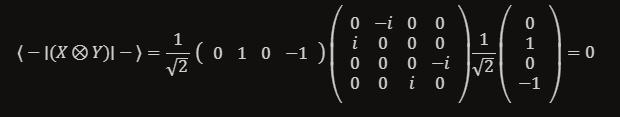


#### Codercise I.11.4 – Double Trouble

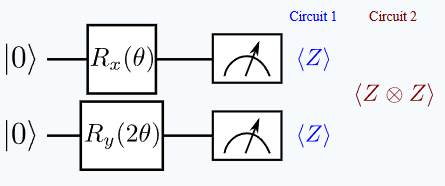

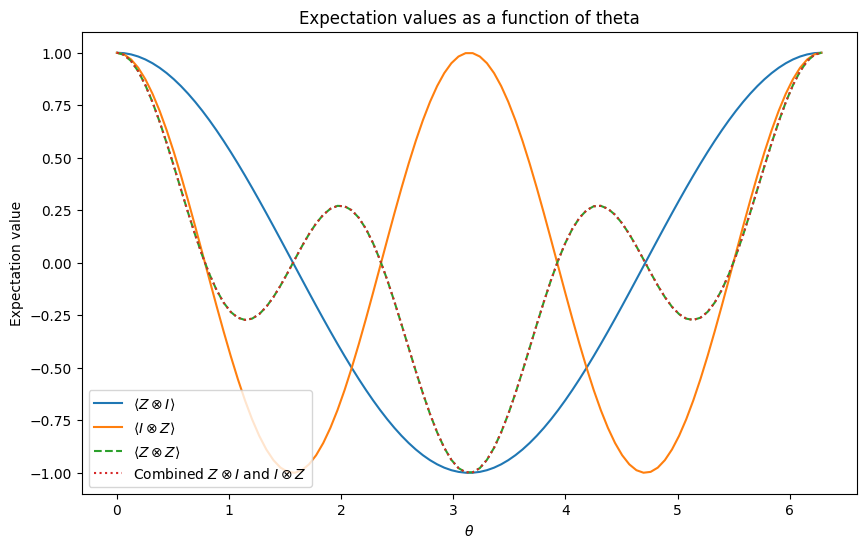

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the device
dev = qml.device("default.qubit", wires=2)

# Define the first circuit
@qml.qnode(dev)
def circuit_1(theta):
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, wires=1)
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

# Define the second circuit
@qml.qnode(dev)
def circuit_2(theta):
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, wires=1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

# Define the combination function
def zi_iz_combination(ZI_results, IZ_results):
    combined_results = ZI_results * IZ_results
    return combined_results

# Define the range of theta values
theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plt.figure(figsize=(10, 6))
plt.plot(theta, ZI_results, label=r'$\langle Z \otimes I \rangle$')
plt.plot(theta, IZ_results, label=r'$\langle I \otimes Z \rangle$')
plt.plot(theta, ZZ_results, label=r'$\langle Z \otimes Z \rangle$', linestyle='--')
plt.plot(theta, combined_results, label=r'Combined $Z \otimes I$ and $I \otimes Z$', linestyle=':')
plt.xlabel(r'$\theta$')
plt.ylabel('Expectation value')
plt.legend()
plt.title('Expectation values as a function of theta')
plt.show()


The expectation value of $Z \otimes Z $ can be derived from the product of the expectation values of $ Z \otimes I $ and $I \otimes Z $: $⟨Z⊗Z⟩=⟨Z⊗I⟩ \cdot ⟨I⊗Z⟩$


This relationship holds because the measurements on the two qubits are independent, and the combined measurement $ Z \otimes Z $ is essentially the product of the individual measurements.

### [All Tied Up](https://pennylane.ai/codebook/03-circuits-many-qubits/02-all-tied-up/)

#### Codercise I.12.1 -- Entangling Operations

In [ ]:
import pennylane as qml
from pennylane import numpy as np

num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    # Apply the CNOT gate
    qml.CNOT(wires=[0, 1])

    return qml.probs(wires=[0, 1])

# Define the basis states and their corresponding labels
basis_states = {
    0: "00",
    1: "01",
    2: "10",
    3: "11"
}

# Initialize the truth table dictionary
cnot_truth_table = {}

# Run the circuit for each basis state and fill in the truth table
for basis_id, label in basis_states.items():
    result_probs = apply_cnot(basis_id)
    # Find the basis state with the highest probability
    result_state = np.argmax(result_probs)
    result_bits = np.binary_repr(result_state, width=num_wires)
    cnot_truth_table[label] = result_bits

# Print the truth table
print(cnot_truth_table)

# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))
print(apply_cnot(1))


{'00': '00', '01': '01', '10': '11', '11': '10'}
[1. 0. 0. 0.]
[0. 1. 0. 0.]


What if we swapped the control and target qubits and applied the CNOT backwards?

In [ ]:
import pennylane as qml
from pennylane import numpy as np

num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def apply_cnot_backwards(basis_id):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    # Apply the CNOT gate with swapped control and target
    qml.CNOT(wires=[1, 0])

    return qml.probs(wires=[0, 1])

# Define the basis states and their corresponding labels
basis_states = {
    0: "00",
    1: "01",
    2: "10",
    3: "11"
}

# Initialize the truth table dictionary
cnot_backwards_truth_table = {}

# Run the circuit for each basis state and fill in the truth table
for basis_id, label in basis_states.items():
    result_probs = apply_cnot_backwards(basis_id)
    # Find the basis state with the highest probability
    result_state = np.argmax(result_probs)
    result_bits = np.binary_repr(result_state, width=num_wires)
    cnot_backwards_truth_table[label] = result_bits

# Print the truth table
print(cnot_backwards_truth_table)


{'00': '00', '01': '11', '10': '10', '11': '01'}


 The standard CNOT gate with qubit 0 as the control and qubit 1 as the target is:

$CNOT |a b \rangle = | a (b \oplus a) \rangle$ (first bit + second bit modulo 2)

$$
\text{CNOT}_{0 \rightarrow 1} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$


When we swap the control and target qubits, the CNOT gate acts differently. The new gate, with qubit 1 as the control and qubit 0 as the target becomes, with a little permutation --

$$
\text{CNOT}_{1 \rightarrow 0} = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$$

1. **State $|00\rangle$**:
   $$
   \text{CNOT}_{1 \rightarrow 0} |00\rangle = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0
   \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = |00\rangle
   $$

2. **State $|01\rangle$**:
   $$
   \text{CNOT}_{1 \rightarrow 0} |01\rangle = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0
   \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = |11\rangle
   $$

3. **State $|10\rangle$**:
   $$
   \text{CNOT}_{1 \rightarrow 0} |10\rangle = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0
   \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = |10\rangle
   $$

4. **State $|11\rangle$**:
   $$
   \text{CNOT}_{1 \rightarrow 0} |11\rangle = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0
   \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = |01\rangle
   $$

 **Truth Table**

Based on the above calculations, the truth table for the CNOT gate with swapped control and target qubits is:

| Input | Output |
|-------|--------|
| 00    | 00     |
| 01    | 11     |
| 10    | 10     |
| 11    | 01     |


#### Codercise I.12.2 -- Separable or entangled
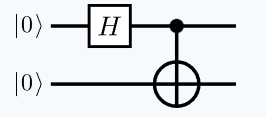


In [ ]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


The initial state of the two qubits is $|00\rangle$ and when the Hadamard gate applied to the first qubit, the state becomes
$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$
Consequently, the state after the Hadamard gate becomes
$$
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)
$$

Applying the CNOT gate to the state $$\frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$ makes it go to
$$
\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

To show that the state is entangled, we need to demonstrate that it cannot be written as a product state. Suppose the state could be written as a product state:
$$
|\psi\rangle = (a|0\rangle + b|1\rangle) \otimes (c|0\rangle + d|1\rangle)
$$
Expanding this product, we get:
$$
|\psi\rangle = ac|00\rangle + ad|01\rangle + bc|10\rangle + bd|11\rangle
$$
For our state $$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) = ac|00\rangle + bd|11\rangle
$$
Comparing the coefficients, we see that $ad = 0$ and $bc = 0$. This implies that either $a = 0$ or $d = 0$ and either $b = 0$ or $c = 0$. However, this would mean that the state is either $|00\rangle$ or $|11\rangle$, which contradicts! Therefore, the state cannot be written as a product state and is entangled.

#### Codercise I.12.3 -- Controlled Rotations

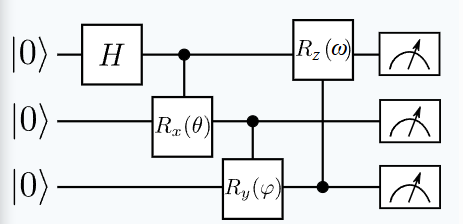

In [ ]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0, 1])
    qml.CRY(phi, wires=[1, 2])
    qml.CRZ(omega, wires=[2, 0])

    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    return qml.probs(wires=[0, 1, 2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


1. **RX Gate**:
   The RX gate applied to the first qubit rotates the state around the x-axis by an angle $\theta$:
   $$
   RX(\theta) = \exp\left(-i \frac{\theta}{2} X \right) = \begin{pmatrix}
   \cos(\theta/2) & -i\sin(\theta/2) \\
   -i\sin(\theta/2) & \cos(\theta/2)
   \end{pmatrix}
   $$

2. **CRY Gate**:
   The controlled-RY gate applies a rotation around the y-axis by an angle $\phi$ to the target qubit (second qubit) if the control qubit (first qubit) is in the state $|1\rangle$:
   $$
   CRY(\phi) = \begin{pmatrix}
   I & 0 \\
   0 & RY(\phi)
   \end{pmatrix}
   $$
   where
   $$
   RY(\phi) = \begin{pmatrix}
   \cos(\phi/2) & -\sin(\phi/2) \\
   \sin(\phi/2) & \cos(\phi/2)
   \end{pmatrix}
   $$

3. **CRZ Gate**:
   The controlled-RZ gate applies a rotation around the z-axis by an angle $\omega$ to the target qubit (third qubit) if the control qubit (second qubit) is in the state $|1\rangle$:
   $$
   CRZ(\omega) = \begin{pmatrix}
   I & 0 \\
   0 & RZ(\omega)
   \end{pmatrix}
   $$
   where
   $$
   RZ(\omega) = \begin{pmatrix}
   e^{-i\omega/2} & 0 \\
   0 & e^{i\omega/2}
   \end{pmatrix}
   $$


### [We've Got It Under Control](https://pennylane.ai/codebook/03-circuits-many-qubits/03-weve-got-it-under-control/)

#### Codercise I.13.1 -- The imposter $CZ$

In [ ]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4

def prepare_states(phi, theta, omega):
    qml.RX(phi, wires=0)
    qml.RY(theta, wires=1)
    qml.RZ(omega, wires=0)

@qml.qnode(dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # Implement the regular CZ gate
    qml.CZ(wires=[0, 1])
    return qml.state()

@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    # Implement CZ using only H and CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=1)
    return qml.state()

print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


True CZ output state [-0.04343853-0.33432911j -0.09706327-0.74705738j  0.22872685+0.0297179j
 -0.51108945-0.06640456j]
Imposter CZ output state [-0.04343853-0.33432911j -0.09706327-0.74705738j  0.22872685+0.0297179j
 -0.51108945-0.06640456j]


Here we do two implementations of the controlled-Z $CZ$ gate:
1. The true CZ gate using the `qml.CZ` operation.
2. The imposter CZ gate using only Hadamard and CNOT gates.

The initial state of the two qubits:
- $ RX(\phi) $ on the first qubit.
- $ RY(\theta) $ on the second qubit.
- $ RZ(\omega) $ on the first qubit.

The true CZ gate is implemented directly using the `qml.CZ` operation:
$$
CZ = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1
\end{pmatrix}
$$

And now for the imposter $CZ$ using Hadamard and CNOT gates in a sequence of operations:
1. Apply a Hadamard gate to the second qubit:
   $$
   H = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 1 \\
   1 & -1
   \end{pmatrix}
   $$

2. Apply a CNOT gate with the first qubit as control and the second qubit as target:
   $$
   CNOT = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0
   \end{pmatrix}
   $$

3. Apply another Hadamard gate to the second qubit.

The combination of these operations effectively implements the CZ gate:
$$
CZ = H \cdot CNOT \cdot H
$$

To verify the equivalence of the true CZ gate and the imposter CZ gate, we compare the output states of both implementations.

$$
   (H \otimes I) = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 1 \\
   1 & -1
   \end{pmatrix} \otimes I = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 0 & 1 & 0 \\
   0 & 1 & 0 & 1 \\
   1 & 0 & -1 & 0 \\
   0 & 1 & 0 & -1
   \end{pmatrix}
   $$


   $$
   (H \otimes I) \cdot CNOT = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 0 & 1 & 0 \\
   0 & 1 & 0 & 1 \\
   1 & 0 & -1 & 0 \\
   0 & 1 & 0 & -1
   \end{pmatrix} \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0
   \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 0 & 0 & 1 \\
   0 & 1 & 1 & 0 \\
   1 & 0 & 0 & -1 \\
   0 & 1 & -1 & 0
   \end{pmatrix}
   $$
   
   $$
   (H \otimes I) \cdot CNOT \cdot (H \otimes I) = \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 0 & 0 & 1 \\
   0 & 1 & 1 & 0 \\
   1 & 0 & 0 & -1 \\
   0 & 1 & -1 & 0
   \end{pmatrix} \cdot \frac{1}{\sqrt{2}} \begin{pmatrix}
   1 & 1 & 1 & 1 \\
   1 & -1 & 1 & -1 \\
   1 & 1 & -1 & -1 \\
   1 & -1 & -1 & 1
   \end{pmatrix} = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 1 & 0 \\
   0 & 0 & 0 & -1
   \end{pmatrix}
   $$

#### Codercise I.13.2 -- The SWAP gate

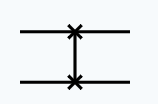

In [ ]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.0, 2.0, 3.0
def prepare_state(phi, theta, omega):
    # Apply the rotation gate to the first qubit
    qml.Rot(phi, theta, omega, wires=0)
    # Apply the rotation gate to the second qubit
    qml.Rot(phi, theta, omega, wires=1)
    return qml.state()


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0, 1])
    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[0, 1])
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


Regular SWAP state = [0.03354074-0.4729721j  0.25838584-0.01832339j 0.05223661-0.73661041j
 0.4024121 -0.02853699j]
CNOT SWAP state = [0.03354074-0.4729721j  0.25838584-0.01832339j 0.05223661-0.73661041j
 0.4024121 -0.02853699j]


The $SWAP$ gate exchanges the states of two qubits and is represented by
$$
SWAP = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

It can be implemented using three CNOT gates sort of like a "rotation" itself.
1. Apply a CNOT gate with the first qubit as control and the second qubit as target.
2. Then a CNOT gate with the second qubit as control and the first qubit as target.
3. Finally a CNOT gate with the first qubit as control and the second qubit as target.

**First CNOT Gate**:
   $$
   CNOT_{01} = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0
   \end{pmatrix}
   $$

**Second CNOT Gate**:
   $$
   CNOT_{10} = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0
   \end{pmatrix}
   $$

**Third CNOT Gate**:
   $$
   CNOT_{01} = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0
   \end{pmatrix}
   $$

So together,
$$
   CNOT_{01} \cdot CNOT_{10} \cdot CNOT_{01} = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1
   \end{pmatrix} \cdot \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0
   \end{pmatrix} \cdot \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1 \\
   0 & 0 & 1 & 0
   \end{pmatrix} = \begin{pmatrix}
   1 & 0 & 0 & 0 \\
   0 & 0 & 1 & 0 \\
   0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 1
   \end{pmatrix}
   $$

This final matrix is exactly the matrix representation of the SWAP gate!


#### Codercise I.13.3 - The Toffoli Gate

In [ ]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    qml.Toffoli(wires=[0, 1, 2])
    qml.Toffoli(wires=[0, 2, 1])
    qml.Toffoli(wires=[0, 1, 2])
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j         -0.01871399+0.16580926j  0.13510603-0.3475132j
  0.13510603-0.3475132j  -0.49030265+0.67358909j]
[ 0.        +0.j          0.        +0.j          0.        +0.j
  0.        +0.j         -0.01871399+0.16580926j  0.13510603-0.3475132j
  0.13510603-0.3475132j  -0.49030265+0.67358909j]



The controlled-SWAP gate swaps the states of the second and third qubits if the first qubit is in the state $|1\rangle$.
$$
\text{Fredkin} = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
$$

The Toffoli gate (controlled-controlled-NOT):
$$
\text{Toffoli} = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{pmatrix}
$$


The controlled-SWAP gate can be implemented using three Toffoli gates in the following sequence:
1. Toffoli gate with the first qubit as control and the second and third qubits as targets.
2. Toffoli gate with the first qubit as control and the third and second qubits as targets.
3. Toffoli gate with the first qubit as control and the second and third qubits as targets.



   $$
   Toffoli_{012} \cdot Toffoli_{021} \cdot Toffoli_{012} = \begin{pmatrix}
   1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
   0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
   0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
   0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
   0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
   0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
   \end{pmatrix} $$

### Codercise I.13.4 -- Mixed Controlled Gates



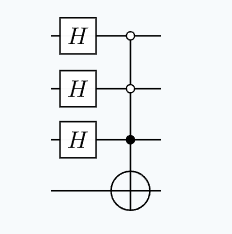

In [3]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def four_qubit_mcx():
    # Apply Hadamard gates to the first three qubits (control qubits)
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)

    # Apply MultiControlledX gate on the fourth qubit, controlled on the first 3 qubits being in the state |001>
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values='001')

    return qml.state()

print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/usr/local/lib/python3.10/dist-packages/pennylane/ops/op_math/controlled_ops.py:1071: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pennylane/ops/op_math/controlled_ops.py:1077: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


The  initial state of the qubits is $ |0000\rangle $, applying Hadamard gates to the first three qubits results in the state:
$$
H \otimes H \otimes H \otimes I |0000\rangle = \frac{1}{2\sqrt{2}} \left( |000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle \right) \otimes |0\rangle
$$

The `MultiControlledX` gate (controlled on the first three qubits being in the state $ |001\rangle $) flips the fourth qubit if the first three qubits are in the state $ |001\rangle $.

The state after applying the MultiControlledX gate is:
$$
\frac{1}{2\sqrt{2}} \left( |0000\rangle + |0011\rangle + |0100\rangle + |0110\rangle + |1000\rangle + |1010\rangle + |1100\rangle + |1110\rangle \right)
$$

The target qubit (fourth qubit) is flipped only when the first three qubits are in the state $ |001\rangle $. In all other cases, the target qubit remains unchanged.

Controlling on 0 is important for quantum algos like Quantum Phase Estimation (QPE), where it is used the inverse Quantum Fourier Transform (QFT) step to apply controlled rotations; in error correction codes like the Shor code or the Steane code.


#### Codercise I.13.5 -- The $3$-controlled NOT

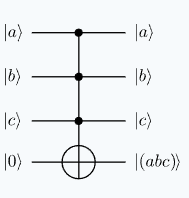

In [17]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)



@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    # Step 1: Apply Toffoli (CCNOT) targeting auxiliary with controls at 0 and 1
    qml.Toffoli(wires=[0, 1, 3])

    # Step 2: Apply Toffoli (CCNOT) targeting target with controls at auxiliary (3) and control (2)
    qml.Toffoli(wires=[2, 3, 4])

    # Step 3: Uncompute - Apply Toffoli again to reset auxiliary to its initial state
    qml.Toffoli(wires=[0, 1, 3])

    ##################

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS

    return qml.state()


print(four_qubit_mcx_only_tofs())


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]



$$ | \psi \rangle = | a \rangle \otimes | b \rangle \otimes | c \rangle \otimes | 0 \rangle \otimes | t \rangle $$
where $ | a \rangle, | b \rangle, | c \rangle $ are the control qubits, $ | 0 \rangle $ is the auxiliary qubit, and $ | t \rangle $ is the target qubit.

$Toffoli_{0, 1, 3} \rightarrow$
$$ | a \rangle \otimes | b \rangle \otimes | c \rangle \otimes | a \cdot b \rangle \otimes | t \rangle $$

$Toffoli_{2, 3, 4} \rightarrow$

$$ | a \rangle \otimes | b \rangle \otimes | c \rangle \otimes | a \cdot b \rangle \otimes | t \oplus (a \cdot b \cdot c) \rangle $$

**Reset ancilla:**

$Toffoli_{0, 1, 3} \rightarrow$
$$ | a \rangle \otimes | b \rangle \otimes | c \rangle \otimes | 0 \rangle \otimes | t \oplus (a \cdot b \cdot c) \rangle $$

The final state of the system becomes,
$$ | \psi' \rangle = | a \rangle \otimes | b \rangle \otimes | c \rangle \otimes | 0 \rangle \otimes | t \oplus (a \cdot b \cdot c) \rangle $$

This shows that the target qubit $ | t \rangle $ is flipped if and only if all three control qubits $ | a \rangle, | b \rangle, | c \rangle $ are in the state $ |1\rangle $.

### [Multi-Qubit Gate Challenge](https://pennylane.ai/codebook/03-circuits-many-qubits/04-multi-qubit-challenge/)

#### Codercise I.14.1 -- The Bell States

In [21]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])

    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=1)
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=0)
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])






    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)

    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")


|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


The Bell states are maximally entangled quantum states of two qubits. They are defined as follows:

- $$|\psi_+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$
- $$|\psi_-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$$
- $$|\phi_+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$$
- $$|\phi_-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$$



To prepare $|\psi_+\rangle$, we apply a Hadamard gate to the first qubit followed by a CNOT gate with the first qubit as the control and the second qubit as the target.

$$|\psi_+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$


   $$|00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

   $$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$
   $$H \otimes I = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1 \end{pmatrix}$$
   $$H \otimes I |00\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle)$$


   $$CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$
   $$CNOT \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$



To prepare $|\psi_-\rangle$, we apply a Hadamard gate to the first qubit, a CNOT gate, and then a Pauli-Z gate to the second qubit.
  $$|\psi_-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$$


   $$|00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

   $$H \otimes I |00\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle)$$

   $$CNOT \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$


   $$Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$
   $$I \otimes Z = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}$$
   $$I \otimes Z \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$$



To prepare $|\phi_+\rangle$, we apply a Hadamard gate to the first qubit, a CNOT gate, and then a Pauli-X gate to the first qubit.

$$|\phi_+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$$


   $$|00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$


   $$H \otimes I |00\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle)$$


   $$CNOT \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$$


   $$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
   $$X \otimes I = \begin{pmatrix} 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$
   $$X \otimes I \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$$



To prepare $|\phi_-\rangle$, we apply Pauli-X gates to both qubits, a Hadamard gate to the first qubit, and then a CNOT gate.

 $$|\phi_-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$$



   $$|00\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

   $$X \otimes I |00\rangle = |10\rangle$$


   $$I \otimes X |10\rangle = |11\rangle$$


   $$H \otimes I |11\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |11\rangle)$$


   $$CNOT \frac{1}{\sqrt{2}} (|01\rangle - |11\rangle) = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$$

#### Codercise I.14.2 -- Quantum Muliplexer

In [35]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [1, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    # qml.CZ(wires=[0,2])
    # qml.CNOT(wires=[1,2])
    qml.PauliX(wires=0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=0)



    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.Hadamard(wires=2)
    qml.PauliX(wires=1)

    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    # qml.ctrl(qml.PhaseShift(-np.pi/2, wires=2), control=[0,1])
    qml.adjoint(qml.S)(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.S(wires=2)

    return qml.state()


print(apply_control_sequence(state))


[0.+0.j         0.+0.j         0.+0.j         0.+0.j
 0.+0.j         0.+0.j         0.+0.70710678j 0.+0.70710678j]


# **Task 2: The Variational Classifier**

### How Can A Quantum Circuit be Interpreted as a Machine Learning Model?

A model, mathematically speaking, is a *function*: a map from inputs to outputs. Hence, in a broad sense, one could say machine learning models are *functions, algorithms or rules that replicate the attributes of a dataset*.

Let ${X}$ be the input domain and ${Y}$ the output domain for a problem we want to solve. A machine learning model in this case is a function
$$f : X → Y, f(x) = y$$
where,  $x ∈ X , y ∈ Y$.

In the probabilistic case, machine learning models are represented by *probability distributions* — assuming the same definitions for ${X}$ and ${Y}$, $$p_θ : X [⊗Y] → [0, 1]$$

In both the deterministic and probabilitic cases, there is dependence on a non-empty set of trainable parameters $θ$.

Moving on to our interpretation of a variational quantum circuit as a *deterministic* machine learning model:

First of all, let our quantum circuit be $Q(x,θ)$, which depends on both our input $x$ and parameters $θ$. We can apply this quantum circuit to the initial state $$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\ket{0} = \ket{0...0},$$ and consider the expectation value after a measurement $M$ the output of our model. $M$ is a Hermitian operator and gives rise to a quantum observable.

$Q(x,θ)\ket{0}$ prepares a quantum state. Let that be $\ket{\psi(x,θ)}$. Our variational quantum model is then a function $$f_\theta(x) = \langle \psi(x, \theta) | M | \psi(x, \theta) \rangle$$

Quantum circuit $Q(x,θ)$ can be structured however suitable. It usually consists of data embedding blocks $S(x)$ and parametrized blocks $W(\theta)$ stacked on top of each other. Both $S(x)$ and $W(\theta)$ consist of quantum gate operations, that are dependent on parameters / data features and unitaries.
<insert image>

$M$, the measurement is a Hermitian operator. When dealing with a Hermitian operator, there exists a basis consisting of its orthonormal eigenvectors (the digaonal basis) such that the operator can be represented by a diagonal matrix (the diagonal elements correspond to its eigenvalues). So,
$$
M \leftrightarrow
\begin{bmatrix}
\omega_1 & 0 & 0 & \dots & 0 \\
0 & \omega_2 & 0 & \dots & 0 \\
0 & 0 & \omega_3 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & \omega_n
\end{bmatrix}
\
$$

where ω₁, ω₂, …, ωₙ are the eigenvalues of the $M$ in the eigenbasis. Representing this in the Dirac notation with $\ket{\omega_i}$ as eigenvectors, $\langle \omega_i|$ the conjugate transpose associated to i<sup>th</sup> eigenvector:
$$
\
M = \sum_{i=1}^{n} \omega_i |\omega_i\rangle\langle\omega_i|
\
$$

We can write
$Q(x,θ)\ket{0}$ = $\ket{\psi(x,θ)}$. Then, our model becomes


$$
\
f_\theta(x) = \sum_{i=1}^{n} \omega_i | \langle \omega_i | \psi(x, \theta) \rangle|^2 = \sum_{i=1}^{n} \omega_i \,p(\omega_i)$$

where $p(\omega_i) = | \langle \omega_i | \psi(x, \theta) \rangle|^2$ is the probability that we measure outcome $\omega_i$. However, most algorithms, all that is required is a computational basis measurement that determines whether the individual qubits are in state 0 or 1. Performing separate computation basis measurements on multiple qubits is equivalent to drawing a sample of a binary string of length n, n being the number of qubits. The expectation value in a quantum computer is estimated by running the algorithm *s* times to sample *S* bits in $[-1, 1]$. *S* is the number of shots, i.e, the number of times we repeat the measurement.

Why the range $[-1,1]$?

Because computational basis measurements are carried out through the Pauli-Z observable: $\sigma_z =  |0\rangle\langle 0| -  |1\rangle\langle 1|
\$. The eigen values are +1 and -1.

In the physical sense, one can think of this as measuring the spin of a particle along the z-axis, the outcome will be either +1 (spin-up) or -1 (spin-down). The expectation value of $\sigma_z$ gives the average spin orientation along the z-axis.

Each time we run the algorithm, we sample the eigenvalue $\omega^s  ∈ {\omega_i}$. Averaging the result implies, $\hat{f} = \frac{1}{S} \sum_{s=1}^S \: \omega^s $

Now, we're ready to interpret a rudimentary **single-qubit variational quantum circuit** as a *deterministic* **quantum classifier**. This circuit maps a scalar input $x \in \mathbb{R}$ to a scalar output. By computing the model function explicitly, $f_\theta(x)$, which is associated with our quantum circuit, we can witness something interesting: the variational quantum model is just a specific kind of function!

### Implementing a Variational Classifier to Learn The Parity Function

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

We import PennyLane, NumPy, and the *NesterovMomentumOptimizer* class from the PennyLane optimization module.

The *NesterovMomentumOptimizer* is an optimization algorithm used for training machine learning models.

In optimization, we aim to find the minimum (or maximum) of a given objective function. Gradient descent is a common technique that iteratively updates the parameters (weights) of a model to minimize the objective function, where the gradient (derivative) of the objective function provides the direction of steepest ascent (or descent). *Why momentum?* Momentum serves as an enhancement to standard gradient descent by introducing inertia or accumulated velocity. The inertia term represents the accumulated momentum from previous steps. It helps the optimization process “remember” its past direction.  The idea here is to mimic the behavior of a moving object with momentum -- say a ball rolling down a hill. Momentum allows the ball to build up speed as it descends, helping it overcome small obstacles. Using momentum for computing gradients smooths out oscillations and avoids local minima. It also helps escape flat regions (plateaus) in the objective landscape.

The Nesterov momentum update rule is as follows: $$ a(t+1) = m a(t) + \eta \nabla f(x(t) - m a(t)) $$
here, $a(t)$ is the accumulated momentum at time step $(t)$, $\eta$ is the step size (learning rate), $\nabla f(x(t) - m a(t))$ is the gradient of the objective function evaluated at the shifted position $x(t) - m a(t)$, and finally, $m$ is the momentum term (usually between 0 and 1).

Coming back to our ball example: the inertia term, corresponding to the ball's accumulated velocity by virtue of its descending the hill, allows the ball to keep moving in the same direction, even if the gradient changes abruptly (local minima). The gradient contribution term, $\eta \nabla f(x(t)) \,$, guides the optimization toward the steepest descent. Here, it corresponds to the slope of the hill at the current position.
If the slope is steep (large gradient), the ball adjusts its direction more aggressively.
If the slope is gentle (small gradient), the ball adjusts more gently. The new position is calculated by subtracting the momentum-adjusted gradient from the current position.
The update rule ensures that the ball moves in the direction of the gradient while considering its accumulated momentum. Our ball combines its inertia (momentum) with the current slope to determine its next position and adjusts its velocity based on both.

Standard momentum accelerates the ball by adding the accumulated momentum to the gradient direction. Nesterov momentum, however, “looks ahead” by calculating the gradient at a point shifted by the current momentum. It then adjusts the accumulated momentum based on this “look-ahead” gradient.
This anticipatory behavior helps avoid overshooting the minimum and helps algorithms converge efficiently, escaping local minima. In quantum machine learning, Nesterov momentum can enhance training efficiency for variational quantum circuits.

In [ ]:
dev = qml.device("default.qubit") #The quantum device

In [ ]:
def state_preparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3])

The data inputs $x$ have to be encoded into the circuit. The `qml.BasisState(x, wires=[0, 1, 2, 3])` operation prepares a single computational basis state. It sets the quantum state to the basis state specified by the binary array x. For example, if `x = np.array([0, 1, 0, 1])`, it prepares the state $|0101\rangle$.


In [ ]:
def layer(layer_weights):
    for wire in range(4):
        qml.Rot(*layer_weights[wire], wires=wire)

    for wires in ([0, 1], [1, 2], [2, 3], [3, 0]):
        qml.CNOT(wires)

`def layer(layer_weights)` defines a Python function called `layer` that takes a single argument `layer_weights`. In the function, the for loop `for wire in range(4): qml.Rot(*layer_weights[wire], wires=wire)` iterates over the four wires (qubits) in the quantum circuit, and applies a single-qubit rotation gate called `qml.Rot` for each wire.

The `qml.Rot` gate is parametrized by three angles: $\theta_1, \theta_2, \theta_3$, and represents an arbitrary single-qubit rotation. The matrix representation of this gate is:
$$ R(\theta_1, \theta_2, \theta_3) = \begin{bmatrix} e^{-i(\theta_1+\theta_3)/2} \cos(\theta_2/2) & -e^{-i(\theta_1-\theta_3)/2} \sin(\theta_2/2) \\ e^{i(\theta_1-\theta_3)/2} \sin(\theta_2/2) & e^{i(\theta_1+\theta_3)/2} \cos(\theta_2/2) \end{bmatrix} $$
where, $RZ(\theta_3)$ and $RY(\theta_2)$ are rotations around the Z-axis and Y-axis, respectively. The `qml.Rot` gate physically corresponds to adjusting the quantum state of a qubit — which means, varying the angles, we can manipulate the qubit’s position on the Bloch sphere. The rotations around the Z-axis $(\theta_3)$ and Y-axis $(\theta_2)$ therefore change the qubit’s phase and tilt.

Then we entangle our qubits: `for wires in ([0, 1], [1, 2], [2, 3], [3, 0]): qml.CNOT(wires)`  iterates over pairs of neighboring wires and for each pair, it applies a two-qubit controlled-NOT (CNOT) gate. The control qubit $|c\rangle$ determines whether to flip the target qubit $|t\rangle$ based on its state: it only flips if $|c\rangle$ is $|1\rangle$ .

So for each wire, we apply the general single-qubit rotation gate (Rot) with angles $\theta_1$, $\theta_2$, and $\theta_3$: $ |q_i\rangle \rightarrow \text{Rot}(\theta_1, \theta_2, \theta_3)|q_i\rangle \quad \text{for } i = 0, 1, 2, 3 $

We apply the CNOT gate between neighboring qubits:

`CNOT(0, 1)`: $|q_0, q_1\rangle \rightarrow |q_0, q_0 \oplus q_1\rangle$

`CNOT(1, 2)`: $|q_1, q_2\rangle \rightarrow |q_1, q_1 \oplus q_2\rangle$

`CNOT(2, 3)`: $|q_2, q_3\rangle \rightarrow |q_2, q_2 \oplus q_3\rangle$

`CNOT(3, 0)`: $|q_3, q_0\rangle \rightarrow |q_3, q_3 \oplus q_0\rangle$

For simplicity, the `qml.Rot` matrix can also be written this way:
$$Rot(\theta_1, \theta_2, \theta_3)= \begin{pmatrix}
e^{-i\theta_1/2} & 0 \\
0 & e^{i\theta_1/2}
\end{pmatrix}
\begin{pmatrix}
\cos(\theta_2/2) & -\sin(\theta_2/2) \\
\sin(\theta_2/2) & \cos(\theta_2/2)
\end{pmatrix}  
\begin{pmatrix}
e^{-i\theta_3/2} & 0 \\
0 & e^{i\theta_3/2} \end{pmatrix}$$ and the `CNOT` gate matrix is:
$\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix} \otimes \ldots \otimes I $
where $CNOT_{ij}$ acts on qubits $i$ and $j$. The matrix representation of the entire circuit can be obtained by multiplying the matrices corresponding to each gate operation (but no, it is too tedious to do it here! So we have plugged in values for the layer weights to just see what it could look like:)

```
import numpy as np

# Define rotation matrices
def Rz(theta):
    return np.array([
        [np.exp(-1j * theta / 2), 0],
        [0, np.exp(1j * theta / 2)]
    ])

def Ry(theta):
    return np.array([
        [np.cos(theta / 2), -np.sin(theta / 2)],
        [np.sin(theta / 2), np.cos(theta / 2)]
    ])

def Rot(theta1, theta2, theta3):
    return Rz(theta1) @ Ry(theta2) @ Rz(theta3)

# Define tensor product for 4 qubits
def kron_n(*args):
    result = args[0]
    for mat in args[1:]:
        result = np.kron(result, mat)
    return result

# Define CNOT gate matrix
def CNOT(control, target, num_qubits):
    identity = np.eye(2)
    not_gate = np.array([
        [0, 1],
        [1, 0]
    ])

    cnot = np.eye(2**num_qubits)
    for i in range(2**num_qubits):
        binary = f"{i:0{num_qubits}b}"
        if binary[control] == '1':
            target_index = int(binary[:target] + ('1' if binary[target] == '0' else '0') + binary[target+1:], 2)
            cnot[i, i] = 0
            cnot[i, target_index] = 1
    return cnot

# Identity matrix for single qubit
I = np.eye(2)

# Define the layer function
def layer(layer_weights):
    num_qubits = len(layer_weights)
    circuit_matrix = np.eye(2**num_qubits)

    # Apply Rot gates to each qubit
    for wire in range(num_qubits):
        Rot_matrix = Rot(*layer_weights[wire])
        full_matrix = kron_n(*(Rot_matrix if i == wire else I for i in range(num_qubits)))
        circuit_matrix = full_matrix @ circuit_matrix

    # Apply CNOT gates
    CNOT_pairs = [
        [0, 1], [1, 2], [2, 3], [3, 0]
    ]

    for control, target in CNOT_pairs:
        cnot_matrix = CNOT(control, target, num_qubits)
        circuit_matrix = cnot_matrix @ circuit_matrix

    return circuit_matrix

# Example layer weights
layer_weights = [
    [np.pi/2, np.pi/3, np.pi/4],
    [np.pi/5, np.pi/6, np.pi/7],
    [np.pi/8, np.pi/9, np.pi/10],
    [np.pi/11, np.pi/12, np.pi/13]
]

# Calculate the circuit matrix
circuit_matrix = layer(layer_weights)

# Print the final circuit matrix
np.set_printoptions(precision=3, suppress=True)
print(circuit_matrix)
```

We now have both our data embedding $S(x)$ and parametrized $W(\theta)$ blocks. We can now formulate our variational quantum circuit:

In [ ]:
@qml.qnode(dev)
def circuit(weights, x):
    state_preparation(x)

    for layer_weights in weights:
        layer(layer_weights)

    return qml.expval(qml.PauliZ(0))

`@qml.qnode(dev)` defines a quantum node (or quantum function). The `@qml.qnode(dev)` decorator specifies that the following Python function will be treated as a quantum circuit. `def circuit(weights, x):` defines the circuit fucntion that takes two arguments: weights (a list of layer weights) and x (the input value. Next, the `state_preparation` operation is applied to the quantum state, and prepares the initial tate of the quantum circuit based on the input value `x`. Then, for each set of layer_weights, we apply the layer function (which represents a layer of single-qubit rotations), acting further on the quantum state. Finally, `return qml.expval(qml.PauliZ(0)` returns the expectation value of the Pauli-$Z$ operator measured on the first qubit (wire 0), acting as a measurement observable.

Let us stop here and process this for a moment. If we denote the quantum state after applying the variational circuit as $|\Psi(\boldsymbol{\theta}, x)\rangle$, where $\boldsymbol{\theta}$ represents the parameters and $x$ the input data, the expectation value of an observable $\hat{O}$ is
$$ \langle \hat{O} \rangle = \langle \Psi(\boldsymbol{\theta}, x) | \hat{O} | \Psi(\boldsymbol{\theta}, x) \rangle $$

Now, only two out of the three parameters in a quantum circuit are typically relevant, while the third one doesn’t significantly affect the model. To illustrate this, we have to interpret the action of the `qml.Rot` gate physically:

Each qubit’s state as a point on the surface of a sphere, the *Bloch sphere*, which represents all of its possible quantum states. The north pole of the Bloch sphere corresponds to the state $|0\rangle$, and the south pole $|1\rangle$. When we apply a rotation gate, involving rotations around the $X, Y,$ and $Z$ axes of the Bloch sphere, these things happen:

$RZ$ i.e. $\theta_3$ introduces a phase shift to the quantum state.

$RY$ i.e. $\theta_2$ tilts the state on the Bloch sphere.

However, the phase shift from $RZ$ doesn’t significantly affect the observable result because physically, it corresponds to a global phase that doesn’t impact relative probabilities or interference patterns.

So when we measure, the expectation value depends mainly on the combination of $\theta_1$ and $\theta_2$'s sinusoidal terms. And these rotation angles are trainable parameters.

Now, the measurement returns a real value in the range $[−1, 1]$ — the range being attributed to the two eigenvalues −1, 1 of
the Pauli-$Z$ measurement.

So, **no matter what other gates we apply in the circuit**, the final expression depends on two rotation angles (parameters) and is always real-valued between $[-1, 1]$.

**Any** function, that can be learned by a quantum model is in concordance with this! It seems like quantum properties (entanglement, superposition, interference) "magically" give rise to a restricted trigonomoetric function – sinusoidal, between $[-1, 1]$.

Now we have realized that a variational quantum
model is just a specific kind of function family.




In [ ]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

The `variational_classifier` takes three arguments: a list of trainable `weights` (angles) for the quantum circuit; a classical `bias` parameter (a scalar value) and `x` input. It then returns the sum of two terms: output of the quantum circuit (computed using the `circuit` function with given weights and input `x` + the trainable bias parameter. Essentially what we have done is, add oru classical bias term (which troduces a classical shift or offset to the final prediction)  to the expectation value of an observable. The overall output of the `variational_classifier` combines both the quantum information and the classical bias. By combining quantum and classical components, the variational classifier aims to learn a model that captures both quantum effects and classical bias, allowing fine-tuning of the overall prediction based on classical information.

In [ ]:
def square_loss(labels, predictions):
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

Now we define a function called `square_loss` taking two arguments:
`labels`: the target labels (ground truth) for the supervised learning task, and
`predictions`: the model’s predicted values for the same data points. The line `return np.mean((labels - qml.math.stack(predictions)) ** 2)`  computes the square loss (mean squared error) between the target labels and the model predictions. This serves as our **cost function**. Square loss is defined as the average of the squared differences between the true labels and the predicted values:

$Square Loss = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $
where $N$ is the total number of data points, $y_i$ represents the true label for the $i$<sup>th</sup> data point and $\hat{y}_i$ represents the corresponding predicted value. $Square Loss$ penalizes large errors (deviations) between the predicted values and the actual labels and squaring the differences ensures that both positive and negative errors contribute equally to the loss.

In [ ]:
def accuracy(labels, predictions):
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

The `accuracy` function computes the accuracy of a classifier by comparing its predictions to the true labels. For each data point, we compare the absolute difference between the true label $(l)$ and the predicted value $(p)$. If this difference is very small (within a tolerance of $1 \times 10^{-5})$, we count it as a correct prediction. We compute accuracy as the ratio of correct predictions to the total number of data points, quantifying how well the classifier’s predictions align with the ground truth.

In [ ]:
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

The `cost` function defines the cost (loss) function for learning tasks, which depends on the data (features and labels) we consider during each iteration of our optimization routine.

To recapitulate, the `variational_classifier` computes predictions based on the given weights, bias, and input features $(X)$ $⇒$ `square_loss` measures the difference between these predictions and the true labels $(Y)$, and `cost` aggregates these losses across all data points. Minimizing cost is the goal: it encourages the model to adjust its parameters (weights and bias) to improve predictions.

In [ ]:
data = np.loadtxt("/content/parity_train.txt", dtype=int)
X = np.array(data[:, :-1])
Y = np.array(data[:, -1])
Y = Y * 2 - 1  # shift label from {0, 1} to {-1, 1}

for x,y in zip(X, Y):
    print(f"x = {x}, y = {y}")

x = [0 0 0 1], y = 1
x = [0 0 1 0], y = 1
x = [0 1 0 0], y = 1
x = [0 1 0 1], y = -1
x = [0 1 1 0], y = -1
x = [0 1 1 1], y = 1
x = [1 0 0 0], y = 1
x = [1 0 0 1], y = -1
x = [1 0 1 1], y = 1
x = [1 1 1 1], y = -1


We read data from a file named “parity_train.txt” and store it in a NumPy array called `data`. The parity dataset contains rows of data, where each row represents an input feature vector followed by a label (either $0$ or $1$). The input features are extracted into an array `X` by excluding the last column, and the labels are extracted into an array `Y` from the last column.
The labels are then transformed from $ (0, 1)$ to $(-1, 1)$.The transformation from $(0, 1)$ to $(-1, 1)$ ensures that the labels are centered around zero (useful for optimization). We print the input feature vector `x` and the corresponding label `y` for good practice.

In [ ]:
np.random.seed(0)
num_qubits = 4
num_layers = 2
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)
print("Weights:", weights_init)
print("Bias: ", bias_init)

Weights: [[[ 0.01764052  0.00400157  0.00978738]
  [ 0.02240893  0.01867558 -0.00977278]
  [ 0.00950088 -0.00151357 -0.00103219]
  [ 0.00410599  0.00144044  0.01454274]]

 [[ 0.00761038  0.00121675  0.00443863]
  [ 0.00333674  0.01494079 -0.00205158]
  [ 0.00313068 -0.00854096 -0.0255299 ]
  [ 0.00653619  0.00864436 -0.00742165]]]
Bias:  0.0


`np.random.seed(0)` sets the random seed to a fixed value (0), which ensures that any random processes (such as weight initialization) yield the same results across different runs.The number of qubits (4) in the quantum circuit is initialized into a variable `num_qubits`. Next, we represent the number of layers (repetitions) of gates in the variational quantum circuit by `num_layers = 2`. Then we put in the weights– they are drawn from a normal distribution with mean 0 and standard deviation 1 (scaled by 0.01). The shape of the weights array is `(num_layers, num_qubits, 3)`, the last dimension `(3)` corresponds to the three angles (parameters) for each qubit rotation. The weights adjust the quantum state by applying rotations to the qubits. The `requires_grad=True` flag indicates that we shall train these weights (they will be updated during optimization). Next, `bias_init` sets the bias to a constant 0.0 (again, the bias is also trainable). The bias term is a constant classical offset added to the model’s predictions.

In [ ]:
opt = NesterovMomentumOptimizer(0.5)
batch_size = 5

We then initialize an optimizer instance using the Nesterov momentum optimization algorithm, and set the  learning rate (step size) to 0.5.


Let us dive deeper into why `NesterovMomentumOptimizer` is chosen to emulate the **parity function**.

The parity function is a classic problem where the output is the parity (even or odd) of the number of 1's in a binary input vector. For an input vector $x ∈ \left\{ 0, 1\right\}^n$, $$f(x) = \left ( \sum_{i=1}^{n} x_i \right ) mod \:2$$ In our variational clasifier, we want to find a set of parameters
$𝜃$ that minimize our cost function $L(\theta)$. For convenience, let us denote our quantum circuit's output a $Q_{\theta}(x)$. The cost function becomes, $$L(\theta) = \frac{1}{N} \sum_{i=1}^{N} (Q_{\theta}(x^i) - f(x^i))^2$$

Let us consider a 4-bit input $x = 1101$:
the number of 1s in $x$ is $3$ (odd), so $P(1101)$ = $1$. One changing just one bit though, $x’ = 1111$: the number of 1s in $x’$ is 4 (even), so $P(1111) = 0)$. We can observe how a small change in input leads to a drastic change in output (from $1$ to $0$).

This abrupt switch demonstrates non-linearity. When implemented on a quantum circuit, the parity function’s cost landscape becomes intricate. The quantum gates and entanglement introduce non-trivial interactions among qubits and parameters. Even small changes in parameters can cause significant variations in the output. So the optimization landscape for learning the parity function is highly non-convex – mathematically, it can be seen as having many local minima and saddle points. Finding optimal $\theta$ involves navigating this complex, non-convex landscape.

In the standard momentum method, the update rule for the parameters $\theta$ at time iteration $t$ is:
$$v_{t+1} = \beta v_t + \eta \nabla L(\theta_t)$$ and
$$\theta_{t+1} = \theta_t - v_{t+1}$$

Here $v_{t+1}$ is the velocity, $\beta$ the momentum coefficient, $\eta$ the learning rate, and $ \nabla L(\theta_t)$ is the gradient of the loss function $L$ evaluated at $\theta_{t}$. In Nesterov momentum, the gradient is evaluated at the approximate future position of the parameters $\theta$:
$$v_{t+1} = \beta v_t + \eta \nabla L(\theta_t - \beta v_t)$$

A note about the *Hessian matrix*:

For a function of multiple variables $e.g., (f(x, y, z, \ldots))$, the Hessian matrix contains the second partial derivatives with respect to each variable.
It is defined as:

$$ H_f = \begin{bmatrix} \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} & \frac{\partial^2 f}{\partial x \partial z} & \ldots \ \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} & \frac{\partial^2 f}{\partial y \partial z} & \ldots \ \frac{\partial^2 f}{\partial z \partial x} & \frac{\partial^2 f}{\partial z \partial y} & \frac{\partial^2 f}{\partial z^2} & \ldots \ \vdots & \vdots & \vdots & \ddots \end{bmatrix} $$ with each entry representing a second partial derivative of $f$ with respect to the corresponding variables.

What the Hessian matrix does, is give information about the curvature of the cost function’s surface around a specific point. If all eigenvalues of $H_f$ are positive, the point is a local minimum, if  negative, it’s a local maximum, and if there are both positive and negative eigenvalues, it’s a saddle point.

Coming back to our Nesterov Momentum Update Rule, the cost function $L(\theta)$ is scalar-valued because it quantifies the discrepancy between $Q_\theta(x_i)$ and $f(x_i)$, i.e., quantum circuit’s output and the parity function values. $\nabla^2 L(\theta_t)$ is the Hessian matrix of the cost function evaluated at $\theta_t$. Matrix form:

$$ H_f = \begin{bmatrix} \frac{\partial^2 L}{\partial \theta_1^2} & \frac{\partial^2 L}{\partial \theta_1 \partial \theta_2} & \ldots \ \frac{\partial^2 L}{\partial \theta_2 \partial \theta_1} & \frac{\partial^2 L}{\partial \theta_2^2} & \ldots \ \vdots & \vdots & \ddots \end{bmatrix} $$

each term is the second partial derivative of $L$ with respect to the corresponding parameters $\theta_i$.

Hence, from our update rule, we effectively have $$\nabla L(\theta_t - \beta v_t) ≈ \nabla L(\theta_t) - \beta v_t · \nabla^2 L(\theta_t)$$
where $\nabla^2 L(\theta_t)$ is the Hessian Matrix,  representing the second-order derivatives of the cost function. This approximation provides a *look-ahead gradient*, which smooths the parameter updates by anticipating future positions. This helps navigate our rugged optimization landscape.

Nesterov momentum also accelerates convergence because the look-ahead gradient provides a more accurate direction for the parameter updates. To see this for ourselves, let's consider the effective step taken in Nesterov momentum:
$$Δ\theta_{t+1} = -v_{t+1} = -\beta v_t - \eta \nabla L(\theta_t - \beta v_t)$$

Expanding using Taylor series,
$$Δ\theta_{t+1} ≈ -\beta v_t - \eta (\nabla L(\theta_t) - \beta v_t · \nabla^2 L(\theta_t))$$

There's more precise step direction because we use the information of the present gradient along with the anticipated future gradient!

Nesterov Momentum also handles high dimensional spaces better. Let's recall that the Hessian Matrix $\nabla^2L(\theta)$ captures the curvature of the cost function. In high-dimensional spaces, some directions might have high curvature (steep slopes), while others might have low curvature (flat regions).Nesterov momentum effectively uses second-order information without explicitly computing the Hessian. Our update rule
$$v_{t+1} = \beta v_t + \eta(\nabla L(\theta_t) - \beta v_t · \nabla^2L(\theta_t))$$ implicitly incorporates the curvature information, which helps in navigating the parameter space more efficiently.

So there, we have seen that Nesterov momentum navigates our non-convex parity function optimization landscape by smoothing the gradient updates and providing a more accurate step direction, thus overcoming sharp changes, escaping plateaus, and avoiding oscillations near saddle points.

In [ ]:
weights = weights_init
bias = bias_init
for it in range(100):

    # Update the weights by one optimizer step, using only a limited batch of data
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias = opt.step(cost, weights, bias, X=X_batch, Y=Y_batch)

    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]

    current_cost = cost(weights, bias, X, Y)
    acc = accuracy(Y, predictions)

    print(f"Iter: {it+1:4d} | Cost: {current_cost:0.7f} | Accuracy: {acc:0.7f}")

Iter:    1 | Cost: 2.3147651 | Accuracy: 0.5000000
Iter:    2 | Cost: 1.9664866 | Accuracy: 0.5000000
Iter:    3 | Cost: 1.9208589 | Accuracy: 0.5000000
Iter:    4 | Cost: 2.6276126 | Accuracy: 0.5000000
Iter:    5 | Cost: 0.9323119 | Accuracy: 0.6000000
Iter:    6 | Cost: 1.1903549 | Accuracy: 0.5000000
Iter:    7 | Cost: 2.0508989 | Accuracy: 0.4000000
Iter:    8 | Cost: 1.1275531 | Accuracy: 0.6000000
Iter:    9 | Cost: 1.1659803 | Accuracy: 0.6000000
Iter:   10 | Cost: 1.1349618 | Accuracy: 0.6000000
Iter:   11 | Cost: 0.9994063 | Accuracy: 0.6000000
Iter:   12 | Cost: 1.0812559 | Accuracy: 0.6000000
Iter:   13 | Cost: 1.2863155 | Accuracy: 0.6000000
Iter:   14 | Cost: 2.2658259 | Accuracy: 0.4000000
Iter:   15 | Cost: 1.1323724 | Accuracy: 0.6000000
Iter:   16 | Cost: 1.3439737 | Accuracy: 0.8000000
Iter:   17 | Cost: 2.0076168 | Accuracy: 0.6000000
Iter:   18 | Cost: 1.2685760 | Accuracy: 0.5000000
Iter:   19 | Cost: 1.6762475 | Accuracy: 0.5000000
Iter:   20 | Cost: 1.1868237 | 

We first initialize the model's `weights` and `bias`. These parameters will be updated during training to minimize the cost function. Following that, a loop is run for 100 iterations (epochs). In each iteration, a random batch of data points (inputs and labels) is taken; the model’s parameters (weights and bias) are updated using an optimizer step, and them the accuracy of the model is computed based on predictions. `batch_index = np.random.randint(0, len(X), (batch_size,))` randomly selects indices for a batch of data points from the entire dataset, and `X_batch = X[batch_index] and Y_batch = Y[batch_index]` extract the input features (X) and corresponding labels (Y) for the selected batch.

Now comes the optimizer step: `weights, bias = opt.step(cost, weights, bias, X=X_batch, Y=Y_batch)` adjusts the parameters based on the gradient of the cost function with respect to these parameter.

We then compute predictions for all data points using the trained model with `predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]`

The `variational_classifier` function takes the model’s parameters and an input feature vector (x) and produces an output. The `np.sign` function converts these outputs into binary predictions (either $-1$ or $1$) based on their sign. `current_cost = cost(weights, bias, X, Y)` computes the current cost (error) of the model using the entire dataset Then we use `acc = accuracy(Y, predictions)` to compute accuracy by comparing its predictions with the true labels `(Y)`, evaluating how well the model performs on the given data.

The training loop simulates fine-tuning the system to achieve better accuracy.




From the output, we can see that our variational classifier is able to classify training set bit strings pretty well!

Ours is a machine learning problem. More than the most optimized parameters, we are more focused on how well our model generalizes: from limited data to unseen data. Overfitting occurs when a machine learning model learns the training data too well, capturing noise and fluctuations rather than the underlying pattern. The overfit model seems to "memorize" specific examples from the training set, making it less effective at generalizing to unseen data. We have to strike a balance. The art in machine learning and quantum machine learning lies in making a model that finds a “good” minimum during optimization: one that captures essential patterns without fitting noise, or generalizes well to new data.

In [ ]:
data = np.loadtxt("/content/parity_train.txt", dtype=int)
X_test = np.array(data[:, :-1])
Y_test = np.array(data[:, -1])
Y_test = Y_test * 2 - 1  # shift label from {0, 1} to {-1, 1}

predictions_test = [np.sign(variational_classifier(weights, bias, x)) for x in X_test]

for x,y,p in zip(X_test, Y_test, predictions_test):
    print(f"x = {x}, y = {y}, pred={p}")

acc_test = accuracy(Y_test, predictions_test)
print("Accuracy on unseen data:", acc_test)

x = [0 0 0 1], y = 1, pred=1.0
x = [0 0 1 0], y = 1, pred=1.0
x = [0 1 0 0], y = 1, pred=1.0
x = [0 1 0 1], y = -1, pred=-1.0
x = [0 1 1 0], y = -1, pred=-1.0
x = [0 1 1 1], y = 1, pred=1.0
x = [1 0 0 0], y = 1, pred=1.0
x = [1 0 0 1], y = -1, pred=-1.0
x = [1 0 1 1], y = 1, pred=1.0
x = [1 1 1 1], y = -1, pred=-1.0
Accuracy on unseen data: 1.0


We load the test data from a file named `“parity_test.txt."` in which each row represents an example, where the last column is the label.

`X_test = np.array(data[:, :-1])` extracts the input features (bitstrings) from the loaded data,
`Y_test = np.array(data[:, -1])` extracts the labels (0 or 1) from the last column of the data, and
`Y_test = Y_test * 2 - 1` shifts the labels from {0, 1} to {-1, 1} for compatibility with the sign function.

We then compute predictions for each test input using the trained variational classifier `predictions_test = [np.sign(variational_classifier(weights, bias, x)) for x in X_test]`. The `np.sign` function converts the continuous output of the classifier into binary predictions (-1 or 1) based on their sign.

We then print out the input, true label and predicted label for each test example. Then we have `acc_test = accuracy(Y_test, predictions_test)`computing our accuracy, the proportion of correctly classified examples by compares the true labels `Y_test` with the predicted labels `predictions_test`.

Again, from the output we see that our variational classifier has learnt to predict unseen examples also pretty well.

Recalling our quantum circuit, our encoding strategy creates quantum states from data such that states have zero overlap (we account for this with our application of the CNOT and Rotation gates). So states from the test set have zero overlap with states from the training set.

Despite the zero overlap, the variational circuit learns functional relationships that maps inputs to outputs according to the training label. But the classifier chooses to label according to what it has learned – the parity function.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Classical Neural Network Classifier
clf = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', max_iter=1000, random_state=42)
# Train classical neural network
clf.fit(X, Y)
# Test accuracy on unseen data and print
classical_predictions = clf.predict(X_test)
classical_accuracy = np.mean(classical_predictions == Y_test)
print(f"Classical Accuracy: {classical_accuracy:.4f}")


Classical Accuracy: 0.8000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


We have shown a comparison with the Classical Neural Network Classifier.

## Iris Dataset Classification

We can implement the Variational Classifier on the Iris Dataset.

The data points are real-valued 2D vectors, we will add latent dimensions for the following reasons:

1.  The Iris dataset consists of 4 features (sepal length, sepal width, petal length, petal width). By adding latent dimensions, we can extract richer features within the data that might not be apparent in the original 2D space, enabling better classification by our variational model.

2. Encoding inputs into 2 qubits with additional latent dimensions allows for more flexible state preparation. This can lead to better utilization of quantum gates and operations and make our quantum model more expressive.

3. As the complexity of the data increases, having additional latent dimensions can make the encoding process more scalable.

4. Models with latent dimensions can generalize better to unseen data. By capturing more aspects of the data distribution, the model can make more accurate predictions on new inputs.

In [ ]:
def get_angles(x):
    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(np.linalg.norm(x[2:]) / np.linalg.norm(x))

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])


def state_preparation(a):
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)

As opposed to the previous bistring representation, where each bit directly corresponds to a basis state (e.g.,
$|0⟩$ or $|1⟩$), this time we have vector inputs. Each input vector $ \mathbf{x} $  must be translated into a set of angles. These angles are used to perform rotations on the qubits, encoding the vector into the quantum state. The angles are computed using trigonometric functions (e.g., arcsine) to ensure the values are normalized and suitable for quantum operations. For simplicity, we work with data from the positive subspace. Ignoring signs means we can avoid additional rotations around the Z-axis, which would otherwise be necessary to account for negative values.

Here we want to transform a given vector $|a\rangle$ into another vector $|b\rangle$ using a unitary matrix $U$ such that $U|a\rangle = |b\rangle$. This can be reduced to finding a matrix $V$ that maps any vector to a fixed vector $|r\rangle$.

Let’s start with a 2-dimensional vector: $ \mathbf{x} = [x_0, x_1] $

We add two latent dimensions to the vector, resulting in a 4-dimensional vector: $ \mathbf{x}_{\text{latent}} = [x_0, x_1, x_2, x_3] = | a ⟩$


Generally,  need to equalize phases: so we uniformly controlled Z-rotations $\Xi_z$ to make the vector real up to a global phase $\phi$. This results in $\Xi_z |a\rangle = e^{i\phi} |\hat{a}\rangle$. Then we perform uniformly controlled Y-rotations $\Xi_y$ to rotate the real state vector $|\hat{a}\rangle$ into the direction of the target vector $|b\rangle$.

But following our assumption, we are dealing with real numbers in just the positive subspace, so we can skip the phase equalization step! $|\hat{a}\rangle = |a\rangle$. We just need to  rotate $|a\rangle$ to $|b\rangle$ through the uniformly controlled Y-rotation $F_{1}^{2}(y, \beta)$. The rotation angles for the Y-rotations are  $ \beta = 2 \arcsin \left( \frac{|x_1|}{\sqrt{|x_0|^2 + |x_1|^2}} \right) $, here we add 1e-12 to avoid division by zero, so:

$ \beta_0 = 2 \arcsin \left( \frac{\sqrt{x_12}}{\sqrt{x_0^2 + x_1^2 + 1 \times 10^{-12}}} \right) $

$ \beta_1 = 2 \arcsin \left( \frac{\sqrt{x_32}}{\sqrt{x_2^2 + x_3^2 + 1 \times 10^{-12}}} \right) $

 $ \beta_2 = 2 \arcsin \left( \frac{|x_{2:}|}{|x|} \right) $


We apply rotations and CNOT gates to transform the initial state:

 `qml.RY(a[0], wires=0)` applies a Y-rotation with angle $\beta_2$  to the first qubit.

 `qml.CNOT(wires=[0, 1])` and `qml.RY(a[1], wires=1)` applies a CNOT gate followed by a Y-rotation with angle $-\beta_1 / 2$ to the second qubit.

`qml.CNOT(wires=[0, 1])` , `qml.RY(a[2], wires=1)` apply another CNOT gate followed by a Y-rotation with angle $\beta_1 / 2$ to the second qubit.

`qml.PauliX(wires=0)`, `qml.CNOT(wires=[0, 1])`, `qml.RY(a[3], wires=1)` apply a Pauli-X gate to the first qubit, a CNOT gate, and a Y-rotation with angle $-\beta_0 / 2$ to the second qubit.


`qml.CNOT(wires=[0, 1])`, `{qml.RY(a[4], wires=1)`, `qml.PauliX(wires=0)` apply a final CNOT gate, a Y-rotation with angle $\beta_0 / 2 $ to the second qubit, and a Pauli-X gate to the first qubit.


The angles $\beta_0, \beta_1, \beta_2$ represent the total rotations needed. However, in quantum circuits, especially when dealing with entangled states, we often need to apply rotations in a controlled manner, *i.e*, breaking down the total rotation into smaller steps that can be controlled by other qubits. Also, by decomposing the angles, we see to that intermediate states during the transformation are correctly aligned: this for maintaining the coherence and entanglement of the qubits when executed on real quantum hardware.

In [ ]:
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0], requires_grad=False)
ang = get_angles(x)


@qml.qnode(dev)
def test(angles):
    state_preparation(angles)

    return qml.state()


state = test(ang)

print("x               : ", np.round(x, 6))
print("angles          : ", np.round(ang, 6))
print("amplitude vector: ", np.round(np.real(state), 6))

`x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0], requires_grad=False)` defines the input vector `x`, *i.e*, $| a \rangle$  with four components. The `requires_grad=False `indicates that we are not computing gradients for this vector.

`ang = get_angles(x)` computes the  rotation angles based on the input vector `x` `get_angles` calculates the angles $\beta_0, \beta_1, \beta_2$ and returns an array of decomposed angles as we need.

We then define a quantum node `test` that  takes the angles as input, applies the `state_preparation` function, and returns the quantum state.

`state = test(ang)` runs the quantum circuit defined in the test QNode with the calculated angles and stores the resulting quantum state in the variable `state`.

We print out the input vector, angles and amplitude vector.

In [ ]:
def layer(layer_weights):
    for wire in range(2):
        qml.Rot(*layer_weights[wire], wires=wire)
    qml.CNOT(wires=[0, 1])


def cost(weights, bias, X, Y):
    # Transpose the batch of input data in order to make the indexing
    # in state_preparation work
    predictions = variational_classifier(weights, bias, X.T)
    return square_loss(Y, predictions)

We have done state prep -- now onto the cost function and the quantum layers.

The `layer` function applies a general rotation and a CNOT gate to each qubit. We have updated to using just 2 qubits.

The `cost` function calculates the loss between the predicted and actual values. It uses the variational classifier to make predictions based on the input data. It is updated to pass the full data batch into state preparation circuit.

`weights, bias` are the parameters of the variational classifier

`X, Y` are the input data and the corresponding labels

`X.T`: The input data is transposed to ensure the correct indexing in the state preparation function.

`variational_classifier` function uses the quantum circuit to make predictions based on the input data.

`square_loss` calculates the mean squared error between the predicted and actual values.

`qml.StatePrep` --  On state simulators like `default.qubit`, this command directly sets the quantum state of the qubits to the desired input state ` x` by replacing the current quantum state with the normalized version of `x`. Neat, because it bypasses the need to manually apply a series of quantum gates to prepare the state. This cannot be done on actual quantum hardware nevertheless, where we would have to decompose the state preparation into a series of basic gates (like RY, CNOT, etc.) to create the desired quantum state.

In [ ]:
data = np.loadtxt("variational_classifier/data/iris_classes1and2_scaled.txt")
X = data[:, 0:2]
print(f"First X sample (original)  : {X[0]}")

# pad the vectors to size 2^2=4 with constant values
padding = np.ones((len(X), 2)) * 0.1
X_pad = np.c_[X, padding]
print(f"First X sample (padded)    : {X_pad[0]}")

# normalize each input
normalization = np.sqrt(np.sum(X_pad**2, -1))
X_norm = (X_pad.T / normalization).T
print(f"First X sample (normalized): {X_norm[0]}")

# the angles for state preparation are the features
features = np.array([get_angles(x) for x in X_norm], requires_grad=False)
print(f"First features sample      : {features[0]}")

Y = data[:, -1]

We now load the **Iris dataset**, consisting of 150 samples from three species of Iris flowers *(Iris setosa, Iris versicolor, and Iris virginica)*. Each sample has four features: sepal length, sepal width, petal length, and petal width.

In preprocessing, we augment the data points with latent dimensions to ensure that the input vector can be properly encoded into the quantum state. We then normalize the data points,  because the amplitudes of a quantum state must sum to 1.


`data = np.loadtxt("variational_classifier/data/iris_classes1and2_scaled.txt")`

`X = data[:, 0:2]`
 loads the Iris datset and extracts the first two features (columns) into the variable `X` , then we print the first sample


`padding = np.ones((len(X), 2)) * 0.1`
`X_pad = np.c_[X, padding]`
 pads each data point in X with two additional dimensions, filled with the constant value 0.1, to match the size of the state vector in the quantum device (which is $2^2 = 4$), then we print the first padded sample


`normalization = np.sqrt(np.sum(X_pad**2, -1))`

`X_norm = (X_pad.T / normalization).T` We normalize each padded data point, and, as before print out the first normalized sample for good measure.

`features = np.array([get_angles(x) for x in X_norm], requires_grad=False)`:
We then translate the normalized data points into rotation angles using the `get_angles` function. These angles will be used to prepare the quantum state. We print out the first set of rotation angles.


`Y = data[:, -1]` extracts the labels (classes) from the last column of the dataset.


In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0][Y == 1], X[:, 1][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X[:, 0][Y == -1], X[:, 1][Y == -1], c="r", marker="o", ec="k")
plt.title("Original data")
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(X_norm[:, dim1][Y == 1], X_norm[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(X_norm[:, dim1][Y == -1], X_norm[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Padded and normalised data (dims {dim1} and {dim2})")
plt.show()

plt.figure()
dim1 = 0
dim2 = 3
plt.scatter(features[:, dim1][Y == 1], features[:, dim2][Y == 1], c="b", marker="o", ec="k")
plt.scatter(features[:, dim1][Y == -1], features[:, dim2][Y == -1], c="r", marker="o", ec="k")
plt.title(f"Feature vectors (dims {dim1} and {dim2})")
plt.show()


Our features are the angles. We can tinker with the dimensions and see how they separate the classes.


We plot the original data.



*   `X[:, 0][Y == 1]`: Selects the first feature of data points belonging to class 1.
*   `X[:, 1][Y == 1]`: Selects the second feature of data points belonging to class 1.
*   `X[:, 0][Y == -1]`: Selects the first feature of data points belonging to class -1.
*   `X[:, 1][Y == -1]`: Selects the second feature of data points belonging to class -1.


We plot the padded and normalized data as well:

*   `dim1 and dim2` Indicate the dimensions to be plotted
* `X_norm[:, dim1][Y == 1]`: Selects the dim1 feature of normalized data points belonging to class 1.
* `X_norm[:, dim2][Y == 1]`: Selects the dim2 feature of normalized data points belonging to class 1.
* `X_norm[:, dim1][Y == -1]`: Selects the dim1 feature of normalized data points belonging to class -1.
* `X_norm[:, dim2][Y == -1]`: Selects the dim2 feature of normalized data points belonging to class -1.


The feature vectors are plotted after translating the normalized data points into rotation angles.

*Why are some features informative and some not so much?*

The ability of different dimensions to separate classes well or not depends on the underlying structure and distribution of the data in those dimensions. Some features (dimensions) contain more information relevant to distinguishing between classes. For example, in the Iris dataset, **petal length** and **petal width** are often more informative for distinguishing between species than sepal length and sepal width. Also, in some dimensions, the data points from different classes might form distinct clusters that are easily separable -- values in these dimensions are significantly different for different classes, while in some dimensions, data points from different classes might overlap.


In [ ]:
np.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

`np.random.seed(0)` sets the seed for the NumPy random number generator to 0. Setting a seed ensures that the random numbers generated are reproducible. Every time we run the code, we will get the same sequence of random numbers.

`num_data = len(Y)` calculates the total number of data points by finding the length of the label array `Y`.

`num_train = int(0.75 * num_data)` calculates the number of training samples, which is 75% of the total number of data points. The remaining 25% will be used for validation.

`index = np.random.permutation(range(num_data))` generates a random permutation of indices from `0` to `num_data - 1` used to randomly shuffle the data points.

`feats_train = features[index[:num_train]]`

`Y_train = Y[index[:num_train]]`

`feats_val = features[index[num_train:]]`

`Y_val = Y[index[num_train:]]` splits the features and labels into training and validation sets based on the random permutation of indices.


`X_train = X[index[:num_train]]`

`X_val = X[index[num_train:]]`
We then store the original data points (before feature transformation) for the training and validation sets, to enable plotting and visualizing the data.

We have generalized from the data samples. Generalization is our model’s ability to perform well on new, unseen data, rather than just the data it was trained on. A model that generalizes well can make accurate predictions on any relevant dataset, not just the one it learned from.

By splitting the data into training and validation sets, we can monitor the model’s generalization performance:

Training performance indicates how well the model is learning from the training data and validation performance indicates how well the model is likely to perform on new, unseen data.

In [ ]:
num_qubits = 2
num_layers = 6

weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

opt = NesterovMomentumOptimizer(0.01)
batch_size = 5

# train the variational classifier
weights = weights_init
bias = bias_init
for it in range(60):
    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, feats_train_batch, Y_train_batch)

    # Compute predictions on train and validation set
    predictions_train = np.sign(variational_classifier(weights, bias, feats_train.T))
    predictions_val = np.sign(variational_classifier(weights, bias, feats_val.T))

    # Compute accuracy on train and validation set
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    if (it + 1) % 2 == 0:
        _cost = cost(weights, bias, features, Y)
        print(
            f"Iter: {it + 1:5d} | Cost: {_cost:0.7f} | "
            f"Acc train: {acc_train:0.7f} | Acc validation: {acc_val:0.7f}"
        )

We initialize the parameters for the variational quantum classifier --

`weights_init` are nitial weights for the quantum gates, drawn from a normal distribution and scaled by 0.01.
`bias_init` is Initial bias, set to 0.

We set up the Nesterov Momentum Optimizer as before, with a learning rate of 0.01 and define the batch size for training.

Then we training loop over 60 iterations:

`batch_index = np.random.randint(0, num_train, (batch_size,))` randomly selects indices from the training data, `feats_train_batch = feats_train[batch_index]` selects the features corresponding to the randomly chosen indices, `Y_train_batch = Y_train[batch_index]` selects the labels corresponding to the randomly chosen indices.

Then we have the optimizer step,
`weights, bias, _, _ = opt.step(cost, weights, bias, feats_train_batch, Y_train_batch)` which updates the weights and bias using the Nesterov Momentum Optimizer in order to minimize the cost function.

We then compute  the predictions for the training and validation sets using the updated weights and bias using `variational_classifier` function. `np.sign` converts the output of the classifier to binary class labels (-1 or 1).

`acc_train` and `acc_val` calculate the accuracy of the predictions on the training and validation sets.

 Every 2 iterations, the code logs the current cost and accuracy. `cost` computes the cost function for the entire dataset.

 We batch select randomly and update the model parameters to reduce overfitting and computational cost.




In [ ]:
plt.figure()
cm = plt.cm.RdBu

# make data for decision regions
xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 30), np.linspace(0.0, 1.5, 30))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

# preprocess grid points like data inputs above
padding = 0.1 * np.ones((len(X_grid), 2))
X_grid = np.c_[X_grid, padding]  # pad each input
normalization = np.sqrt(np.sum(X_grid**2, -1))
X_grid = (X_grid.T / normalization).T  # normalize each input
features_grid = np.array([get_angles(x) for x in X_grid])  # angles are new features
predictions_grid = variational_classifier(weights, bias, features_grid.T)
Z = np.reshape(predictions_grid, xx.shape)

# plot decision regions
levels = np.arange(-1, 1.1, 0.1)
cnt = plt.contourf(xx, yy, Z, levels=levels, cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[-1, 0, 1])

# plot data
for color, label in zip(["b", "r"], [1, -1]):
    plot_x = X_train[:, 0][Y_train == label]
    plot_y = X_train[:, 1][Y_train == label]
    plt.scatter(plot_x, plot_y, c=color, marker="o", ec="k", label=f"class {label} train")
    plot_x = (X_val[:, 0][Y_val == label],)
    plot_y = (X_val[:, 1][Y_val == label],)
    plt.scatter(plot_x, plot_y, c=color, marker="^", ec="k", label=f"class {label} validation")

plt.legend()
plt.show()

`plt.figure()`

`cm = plt.cm.RdBu`

initializes a new figure for plotting and sets the colormap to `RdBu` (Red-Blue)

`xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 30), np.linspace(0.0, 1.5, 30))`

`X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]`

creates a grid of points over the range `[0.0, 1.5]` for both x and y axes, with 30 points in each direction. The grid points are flattened and combined into a list of 2D points as decision regions.

`padding = 0.1 * np.ones((len(X_grid), 2))`
`X_grid = np.c_[X_grid, padding] `
adds two constant values (0.1) to each grid point to match the size of the state vector.

 `normalization = np.sqrt(np.sum(X_grid**2, -1))`
 `X_grid = (X_grid.T / normalization).T` ensures that the sum of the squares of the components of each grid point equals 1.

`features_grid = np.array([get_angles(x) for x in X_grid]) ` translates the normalized grid points into rotation angles using the get_angles function.


`predictions_grid = variational_classifier(weights, bias, features_grid.T)` uses the variational classifier to make predictions for each grid point.

`Z = np.reshape(predictions_grid, xx.shape)` reshapes the predictions to match the shape of the grid.

We then plot the decision regions as contour plots, then plot the data points.




# **Task 3: Quanvolutional Neural Networks**

### Classical Convolution vs Quantum Convolution

In terms of deep learning, an image convolution is essentially an element-wise multiplication of two matrices followed by a sum. *Neural Networks* use a sequence of hidden layers to transform the input (a single vector). A sequence of hidden layers is used by neural networks to alter an input—a single vector. A group of neurons makes up each hidden layer; each neuron in a single layer functions entirely independently and does not share any connections with any other neurons in the previous layer. The last fully-connected layer is referred to as the "output layer" and it represents the class scores in classification settings. But regular neural networks don't scale well to full images. For example, if we had an image of size, `200 x 200 x 3`, we'd need neurons that have `200*200*3 = 120,000` weights! And we'd want to have several such neurons -- the parameters add up quick. Full connectivity of neural nets can be wasteful and the huge number of parameters has an overfitting risk.

What *convolutional neural networks* do is take advantage of the fact that our input consists of images. The layers of a ConvNet have neurons arranged in 3 dimensions: width, height, depth. For example, if our activation volume had dimensions `32 x 32 x 3`, using a ConvNet, neurons in a layer will only be connected to a small region of the layer before it, instead of all of the neurons being fully-connected. Also, at the end of a ConvNet, we reduce the full image into a single vector of class scores, arranged along the depth dimension.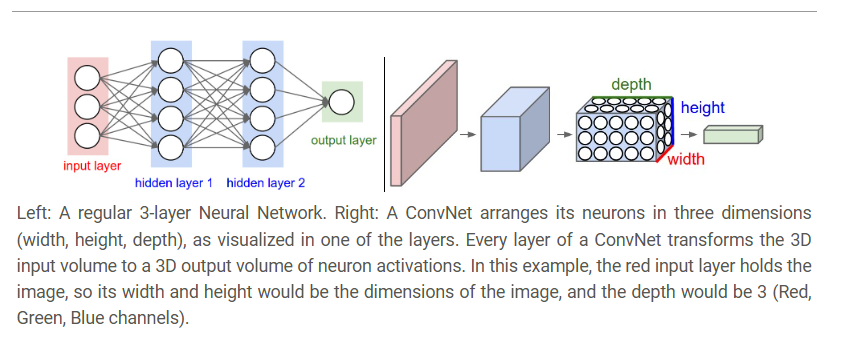

*Image Credit*: https://cs231n.github.io/convolutional-networks/

The core operation in a convolutional layer is the convolution operation, which involves a filter (or kernel) sliding over the input data.

Convolution is denoted by the $\star$ operator. Let $I$ be the input image, $K$ the convolutional kernel, and $O$ the output feature map. For a 2D convolution, the output at position $(i, j)$ is given by:

$$O(i, j) = (I \star K)(i, j) = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} I(i+m, j+n) K(m, n)$$

where $M$ and $N$ are the dimesnsions of the kernel $K$, $I(i+m, j+n)$ is the pixel value of the input image at position / coordinate $(i+m, j+n)$, and $K(m, n)$ s the weight of the kernel at that position.

The image is 2D because it has a width (# of columns) and height (# of rows), but it also has a depth -- the number of *channels*. A standard RGB image has a depth of 3 -- one channel for each of the Red, Green, Blue channels. A *kernel* can be visualized as a small `N X N` matrix that slides across, from left-to-right and
top-to-bottom, of an image, applying a mathematical operation, say convolution at each coordinate $(x,y)$.  At each pixel in the input image, the neighborhood of the image
is *convolved* with the kernel and the output is stored. Different kernels have different operations, *e.g.*, Laplacian kernels for edge detection, Guassian smoothing for blurring -- they are specifically designed to perform a particular function.

After the convolution operation, an activation function $σ$ is applied element-wise to introduce non-linearity:

$$O'(i, j) = \sigma(O(i, j))$$

Common activation functions include the Rectified Linear Unit (ReLU): $σ(x) = max(0, x)$ which is widely used because of how simple and effective it is.

Why introduce non-linearity? Linear transformations (such as matrix multiplications and convolutions) can only model linear relationships between input and output, first of all, nonlinear activation functions enable the network to learn complex mappings. Second, activation functions break the symmetry among neurons in the same layer -- without non-linearity, all neurons would compute the same weighted sum of inputs, leading to redundancy. There's the universal approximation theorem which states that a feedforward neural network with a single hidden layer and a non-linear activation function can approximate any continuous function. Then finally, gradient-based optimization relies on non-linearity to update weights during training.

The **Convolutional Layer** consists of two operations: Convolution and Activation Function. Then, the **Pooling Layer**.

Pooling layers reduce the spatial dimensions of the input, making the computation more efficient and providing some degree of translation invariance. The most common type is max pooling:

$$P(i, j) = max_{(m,n) \in R(i, j)}  O'(m, n)$$

where $P(i, j)$ is the output of the pooling operation and $R(i, j)$ is the pooling region centered at $(i, j)$ usually a square region like 2x2 or 3x3.

Then comes the **Fully Connected Layer**, which performs the high-level reasoning. The fully connected layers of a NeuralNet take the flattened feature map from the final pooling layer as input and produce the final output. Here's how we define the fully connected operation:
Let $x$ be the flattened input vector and $W$ be the weight matrix,

$$y = Wx + b$$

where $y$ is the output, $b$ is the bias vector.

The parameters (weights and biases) of the CNN are learned through backpropagation. The three layers we have mentioned above make up the *forward pass*, which essentially computes the output of the network for a given input. The next step is to compute the loss (error) between the predicted output $ŷ$ and the true label $y$. This can be done through, say, mean-squared error:

$$ L = \frac {1}{2} \sum_{i=1}^N (\hat y_{i} - y_i)^2 $$

In the *backward pass*, we compute the gradient of the loss function with respect to each parameter using the chain rule of calculus. This involves calculating gradients layer by layer from the output layer back to the input layer.

For the fully connected layer, let $δ$ be the gradient of the loss with respect to the output $\hat y$:

$$\delta^{(L)} = \frac {∂L}{∂\hat y}$$

The gradient with respect to the weights $W$:

$$\frac {∂L}{∂W} = δ^{(L)}x^T$$

The transpose operation is for dimensions consistency, ensuring that the resulting gradient has the same shape as
$𝑊$.

Gradient with respect to the biases $b$:

$$\frac {∂L}{∂b} = δ^{(L)}$$

For the previous layer's activations,

$$δ^{(L-1)} = (W^T δ^{(L)}) ⊙ \sigma'(x)$$
where $⊙$ denotes element-wise multiplication and $\sigma'$ is the derivative of the activation function.

For calculating the gradient for the convolutional layer, let $\delta_l$ be be the gradient of the loss with respect to the output of the convolutional layer at a layer, say $l$:
$$\delta_l = \frac{∂L}{∂O_l}$$

The gradient with respect to the kernel $K$ is calculated by summing over the gradients of the output with respect to each element in the kernel, weighted by the corresponding input region

$$ \frac{∂L}{∂K} = \sigma_{i, j} \delta_l(i, j) · I_{l-1}(i:i + M, j: j + N)$$

where $I_{l-1}$ is the input to the convolutional layer, $\delta_l(i, j)$ is the gradient of the loss with respect to the output of the convolutional layer at position $(i, j$, and $I_{l-1}(i:i + M, j: j + N)$ represents the patch of the input that corresponds to the receptive field of the kernel at position $(i, j$. The receptive field defines the spatial extent over which a kernel operates.

Onto maxpooling: during backpropagation, we compute gradients with respect to the output of the max pooling layer.
The gradient is then propagated back to the previous layer (usually a convolutional layer or another pooling layer). Max pooling essentially reduces the spatial dimensions of feature maps while retaining important features. Why is this important? Because by propagating the gradient only through the maximum value, max pooling ensures that the most significant activations contribute to learning -- making making the network robust to small translations or distortions in the input.  

$$δ_{pool}(i,j) =\begin{cases} \delta_{next}(i', j') & if (i, j) = \; arg \; max  \;R(i, j)  \\ 0 & otherwise \end{cases}$$

Once the gradients are computed, we update the parameters using gradient descent or its variants.

Traditional image processing operations need us to manually define our kernels for each task. Using deep learning we can instead learn these types of filters which are then stacked on top of each other, this leads to learning higher-level features based on lower-level inputs.


**Quantum Neural Networks (QNNs)** enhance the capabilities of classical ConvNets by incorporating quantum computation. In a QNN, a new type of layer called the “quantum convolutional” (or *quanvolutional*) layer is introduced. These quanvolutional layers consist of N quantum filters that operate similarly to classical convolutional layers, producing feature maps by locally transforming input data. However, the key distinction lies in how quanvolutional filters extract features: they use random quantum circuits to transform spatially-local subsections of the input data, rather than performing simple element-wise matrix multiplication like classical convolutional filters.

Let us consider a single quanvolutional filter. In the first step, the quanvolutional filter applies a random quantum circuit $q$ to spatially-local subsections $u_x$ of input images from the dataset $u$. Each $u_x$ is a 2D matrix of size $n \times n$ with $n > 1$.

These subsections $u_x$ are classical data. They are mapped to a quantum state $i_x$:
$$i_x = e(u_x)$$

For example, if $u_x$ is a $2 \times 2$ image patch with pixel values $[u_{11}, u_{12}; u_{21}, u_{22}]$ the encoding function $e$ might prepare a quantum state by applying rotations to qubits initialized in the ground state:

$$| ψ(u_x) ⟩ = R_y(u_{11})R_y(u_{12})R_y(u_{21})R_y(u_{22}) ^{⊗4}$$

The quantum state
$𝜓(𝑢_𝑥)$ is prepared by applying $𝑅𝑦$ rotations (by an angle determined by the pixel value $u_{ij}$ to qubits initialized in the ground state (denoted as $∣0⟩^{⊗4}$).

Now, we introduce the random quantum circuit $𝑞$. This circuit consists of various quantum gates applied sequentially, introducing quantum correlations and entanglement via Unitaries.
The purpose of $𝑞$ is to perform quantum operations on the input state $i_x$, transforming it into a new state. We can express this as: $$ o_x = q(i_x) = q(e(u_x))$$

The next step is to extract useful information from this quantum state. This process is known as state decoding. The output quantum state $o_x$ is measured, and the results are decoded into a scalar value $f_x$ using a decoding function $d$:

$$f_x = d(o_x) = d(q(e(u_x)))$$

A common approach for decoding involves measuring the expectation value of a specific quantum operator. For example, the decoding function could involve measuring the expectation value of a Pauli-Z operator: $f_x = \langle \psi'| Z | \psi' ⟩$

This entire process –- *encoding, quantum circuit application, and decoding* – is referred to as the **quanvolutional filter transformation** $Q$: $$f_x = Q(u_x, e, q, d)$$



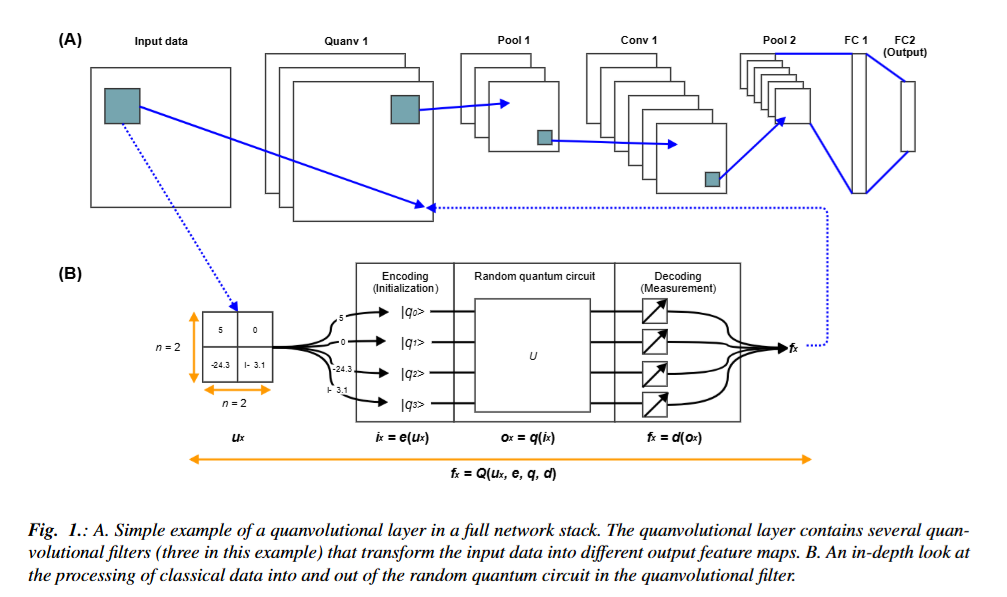
*Image credit: Henderson, M., Shakya, S., Pradhan, S., & Cook, T. (2020). Quanvolutional neural networks: powering image recognition with quantum circuits. Quantum Machine Intelligence/Quantum Machine Intelligence, 2(1). https://doi.org/10.1007/s42484-020-00012-y*







Classical Convolution Filters have polynomial ($O(n^2)$ ) complexity with respect to the input size (where 𝑛 represents the size of the input patch). This polynomial time complexity places classical convolution filters within the class of problems solvable efficiently by classical computers (i.e., in the complexity class P). The Quanvolutional Filter Transformation, however, is #P-hard (a class of problems that is more challenging than P). Despite this, the encoding 𝑒 and decoding 𝑑 steps can still be efficiently performed on classical devices.

### Implementing a Quanvolutional Neural Network

The following is what we're about to do:

1. **Embed the Input Image Region into a Quantum Circuit**:

First of all, let us assume the input image $I$ is of size $H \times W$.  Each pixel value can be represented as $I_{ij}$

Let's start with a small region of the input image, our sliding window, which is a $2 \times 2$ square. This region can be represented as a matrix of pixel values $\begin{bmatrix}
 a & b \\
 c & d \\
\end{bmatrix}$
These pixel values are then embedded into a quantum circuit. Typically, this involves preparing the qubits in the ground state $|0 \rangle$ and applying parametrized rotations based on the pixel values. For example, using the rotation gate $R_y$:
$$| \psi ⟩ = R_y(a) ⊗ R_y(b) ⊗ R_y(c) ⊗ R_y(d) \:|0 \rangle ^{⊗4}$$

2. **Perform a Quantum Computation with Unitary $U$**:

We apply a unitary operation $U$ to the initialized quantum state. $U$, representing the quantum gate operations, is generated by a variational quantum circuit or a random circuit -- the general form being, $| \psi' ⟩ = U | \psi ⟩$

3. **Measurement**

We then do a measurement to obtain classical expectation values. The measurement is usually performed in the computational basis, and the expectation value for a Pauli-$Z$ operator $σ_z$ on a qubit $i$ is, $\langle σ_z^i \rangle = \langle \psi' | σ_z^i | \psi' \rangle$

4.  **Map Expectation Values to Output Pixel Channels**:

Analogous to a classical convolution layer, each expectation value obtained from the measurement is mapped to a different channel of a single output pixel. For example, if we obtain four expectation values for our $2 \times 2$ input region, they can be structured into a multi-channel output pixel $[\langle σ_z^1 \rangle, \langle σ_z^2 \rangle, \langle σ_z^3 \rangle, \langle σ_z^4 \rangle]$

5. **Scan the Full Input Image**:

We repeat the above steps for every $2 \times 2$ region in the image by sliding the window from left to right and top to bottom. Mathematically, this means iterating over $i$ and $j$ such  that $0 \leq i \leq H - 2 \ and \ 0 \leq j \leq W - 2$

The output is a multi-channel image $O$ of size $(H - 1) \times (W - 1) \times 4$ where each pixel has 4 channels corresponding to the 4 expectation values obtained from the quantum measurement. The output object is hence a multi-channel image.

6. **Quantum Convolution Followed by Further Layers**

Additional hybrid processing in urther quantum layers or classical layers.


The primary difference from classical convolution is the potential complexity of quantum kernels. Quantum circuits can generate highly complex transformations (kernels) that could be classically intractable. Mathematically, this complexity arises from the ability of quantum circuits to create superpositions and entanglement, leading to transformations that cannot be efficiently simulated on classical computers. We're esssentially leveraging the inherent complexity of quantum circuits to generate powerful feature maps.







In [90]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [91]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset

SAVE_PATH = "../_static/demonstration_assets/quanvolution/"  # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

`n_epochs = 30` sets the number of optimization epochs for training. Each epoch involves forward and backward passes through the neural network to update its weights.

`n_layers = 1` specifies the number of random layers. In quantum neural networks, layers can represent quantum gates or other quantum operations. Having only one layer simplifies the architecture but may limit expressiveness.

`n_train = 50` sets the size of the training data. The choice of dataset size is crucial the model’s ability to learn patterns. Here, training dataset will contain 50 samples (data points). `n_test = 30` sets the test dataset size of 30 samples.

`PREPROCESS = True` controls whether quantum processing (such as encoding or transformation) is performed or data is loaded from a saved location.

`np.random.seed(0)`, `tf.random.set_seed(0)` set the random number generator seeds for NumPy and TensorFlow respectively. Fixing the seeds ensures reproducibility by making random processes deterministic.

In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)

`mnist_dataset = keras.datasets.mnist ` loads the MNIST dataset, which consists of handwritten digit images ($28 \times 28$ pixels) along with their corresponding labels `(0 to 9)`. using Keras.

We then split the dataset into training and test subsets `(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()`

`train_images = train_images[:n_train] and train_labels = train_labels[:n_train]` truncates the training data to the specified size. Only the first `n_train` samples are retained -- this leads to faster training. We do the same for for testing data as well to simplify evaluation.

`train_images = train_images / 255 and test_images = test_images / 255` normalizes pixel values to the range `[0, 1]`, ensuring consistent input ranges for neural networks, aiding convergence during training.

`train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)`, `test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)` add an extra dimension for convolution channels by modifying the shape of the image data (e.g., grayscale channel, red, blue, green). This allows our ConvNet to process multi-channel images effectively.






In [ ]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

We initialize a PennyLane `default.qubit` device for simulating a quantum system with 4 qubits.

`rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))` generates random parameters for the quantum circuit as an array containing random angles (between 0 and 2π) for each circuit layer. These angles correspond to the rotation gates applied during the quantum computation.

We as usual use the `@qml.qnode(dev)` decorator to define a quantum node (qnode) using the specified device (dev), which encapsulates the quantum circuit and allows us to compute gradients and expectation values.

The we have a loop `for j in range(4): qml.RY(np.pi * phi[j], wires=j)` that applies local RY rotations to **encode** classical input values. We have done **angle encoding** here.

Angle encoding implies classical information being encoded in the relative phase between quantum states using rotation gates. n this case, the classical data `phi[j]` is used to determine the rotation angle for the $RY$ gate, which is a a single-qubit rotation around the y-axis. The matrix form of the RY gate with angle θ is given by $ R_y(\theta) = \begin{pmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{pmatrix} $

For each qubit `j`, the angle of rotation is `π * phi[j]`, we can express this as $ R_y(\pi \cdot \phi[j]) = \begin{pmatrix} \cos(\pi \cdot \phi[j]/2) & -\sin(\pi \cdot \phi[j]/2) \\ \sin(\pi \cdot \phi[j]/2) & \cos(\pi \cdot \phi[j]/2) \end{pmatrix} $

If we consider a single qubit state $|ψ⟩$,  $|ψ(\phi[j/2)⟩ = R_y(\phi[j/2)|0⟩ + e
iϕR_y(\phi[j/2)|1⟩$


Following that, we apply a random quantum circuit `RandomLayers(rand_params, wires=list(range(4)))`. In classical convolutional neural networks, convolutional layers extract features from input data by applying filters -- similarly, in quanvolutional neural nets, random quantum circuits act as quantum filters that transform the input quantum state, extracting complex features that classical filters might miss. Moreover, random quantum circuits introduce non-classical correlations and entanglement, which can capture intricate patterns in the data, potentially providing a richer feature space for subsequent layers to process. This enhanced expressiveness can lead to better performance on tasks where classical methods struggle.

The parameters for these gates are drawn from a uniform distribution, ensuring randomness. The random circuit is a composition of unitary transformations (gates!) If we denote the unitary matrices of the gates as $ U_1, U_2, \ldots, U_k $, the overall transformation $U$ applied by the random circuit is: $ U = U_k \cdot U_{k-1} \cdot \ldots \cdot U_1 $. This composite unitary matrix transforms the input quantum state $ \left| \psi \right\rangle $ into a new state $ \left| \psi’ \right\rangle $: $ \left| \psi’ \right\rangle = U \left| \psi \right\rangle $ .


After application of the random circuit, we measure the expectation values of Pauli-Z operators. This computational basis measurement gives us classical output values.




In [ ]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((14, 14, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 28, 2):
        for k in range(0, 28, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

We now define a function named `quanv` that takes an image as input, to apply a quantum convolution operation to the input image. `out = np.zeros((14, 14, 4))` initializes an output array of zeros with shape (14, 14, 4) to store the results of the quantum convolution, with dimensions corresponding to the reduced image size and 4 channels. This array will hold the processed image data. The nested loop `for k in range(0, 28, 2)` combined with the outer loop, covers the entire image in 2x2 blocks, it iterates through the top-left pixel coordinates of 2x2 squares in the image.

`q_results = circuit([image[j, k, 0], image[j, k + 1, 0], image[j + 1, k, 0], image[j + 1, k + 1, 0]])` alludes to the `circuit` function being called with the pixel values of the 2x2 region as input, to do quantum operations and return expectation values. `out[j // 2, k // 2, c] = q_results[c]` assigns the expectation values to the corresponding channels `c` of the output pixel. There are 4 expectation values mapped to the 4 channels of the output pixel located at (j/2, k/2). This is where we're doing image processing so to speak, we are effectively reducing the image resolution by half. The process is similar to using a 2x2 kernel with a stride of 2 in classical CNNs to manage computational complexity and focus on just essential features.

We then return the quantum-processed image data in the `out` array, representing the image after applying the quantum convolution, ready for further processing after being simplified.

In [ ]:
if PREPROCESS == True:
    q_train_images = []
    print("Quantum pre-processing of train images:")
    for idx, img in enumerate(train_images):
        print(f"{idx + 1}/{n_train}        ", end="\r")
        q_train_images.append(quanv(img))
    q_train_images = np.asarray(q_train_images)

    q_test_images = []
    print("\nQuantum pre-processing of test images:")
    for idx, img in enumerate(test_images):
        print(f"{idx + 1}/{n_test}        ", end="\r")
        q_test_images.append(quanv(img))
    q_test_images = np.asarray(q_test_images)

    # Save pre-processed images
    np.save(SAVE_PATH + "q_train_images.npy", q_train_images)
    np.save(SAVE_PATH + "q_test_images.npy", q_test_images)


# Load pre-processed images
q_train_images = np.load(SAVE_PATH + "q_train_images.npy")
q_test_images = np.load(SAVE_PATH + "q_test_images.npy")

Quantum pre-processing of train images:

Quantum pre-processing of test images:


If `PREPROCESS` is True, the quantum convolution is applied to the images; otherwise, pre-processed images are loaded from disk. Then we initalize an empty list called `q_train_images = []` to hold the image results of the quantum convolution for the training dataset. We then iterate over each image in the training dataset with `idx` as the index and `img` as the image, apply the quantum convolution function `quanv` to process the image and return the transformed image, which is then added to the list.


`q_train_images = np.asarray(q_train_images)`  converts the list of quantum-processed training images to a NumPy array to be saved.

We do this for the test images as well, and print out the progress with `print("{}/{}        ".format(idx + 1, n_test), end="\r")`.  `q_test_images.append(quanv(img))` applies the quantum convolution function quanv to the image and appends the result to the list, then convert into a NumPy array.

We then save the processed training and test images to disk in a folder we specify, and can load them into memory whenever needed setting `PREPROCESS` = False.

Ok, one: why apply quantum convolution as pre-processing? Quantum computations can be resource-intensive and time-consuming. By applying the quantum convolution layer once to the entire dataset, we smartly avoid the need to repeatedly perform these computations during each training epoch. Also, pre-processing the images with the quantum convolution layer and saving the results allows us to use these pre-processed images directly in the classical model, significantly speeding up the training process.

By not training the quantum convolution layer, we treat it as a fixed transformation. This means the features extracted by the quantum layer remain consistent across all images, providing a stable input for the classical model.

Two: why aren't we training the quantum convolution layer? First, complexity and resources -- it is more practical to use the quantum layer as a pre-processing step rather than incorporating it into the training loop.  By using a hybrid approach, we leverage the strengths of both quantum and classical computation. The quantum convolution layer extracts complex features, while the classical model, which is easier to train and optimize, handles the learning and prediction tasks.
Also, training only the classical model simplifies the overall process, making it more manageable and efficient.


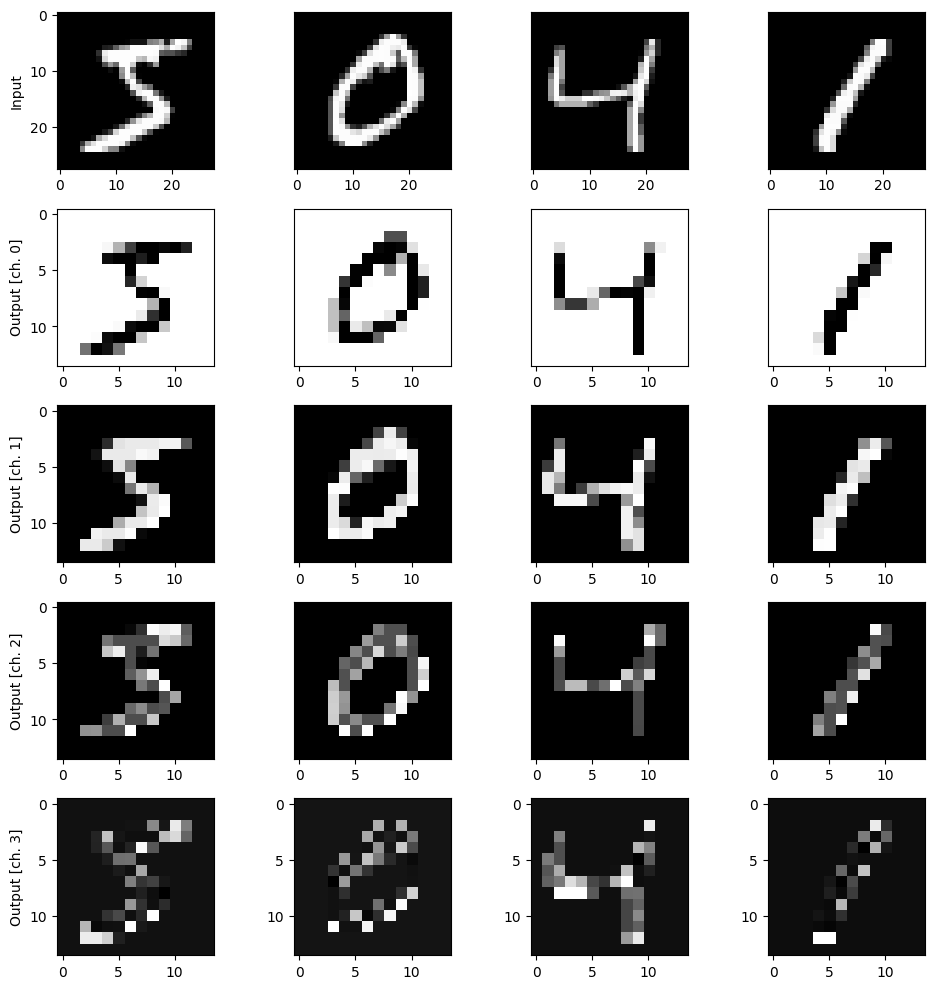

In [ ]:
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

We visualize 4 samples from the dataset. Each sample will have 4 output channels to visualize, corresponding to the 4 expectation values obtained from the quantum convolution. `fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))` creates a grid having `1 + n_channel`s rows and `n_samples` columns, with each subplot in it  having a figure size of 10x10.

`if k != 0: axes[0, k].yaxis.set_visible(False)` ensures only the first subplot in the first row has a visible y-axis label to improve visual clarity of the plot by reducing redundant labels. `axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")` shows the original input image for each sample in grayscale. We again perform these operations analoguously for y, and display the k-th quantum-processed image for the c-th channel with `axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")`

`plt.tight_layout()` to make subplots neatly arranged without overlapping, then we finally show the plot.  

There they are, the effects of quanvolution on a sample batch.

Things we can observe here --

1. The downsampling
2. There are small alterations to the pixel values. The quantum kernel applies complex transformations to them, attributing to quantum operations like rotations and entanglement, which modify the local pixel values. While these changes may alter the fine details, they are part of the feature extraction process.
3. Despite the local distortions and downsampling, the overall structure and shape of the image are maintained! The quantum convolution layer acts similarly to classical convolution layers, and preserves the spatial relationships and global features of the input image like the outline of digits in the MNIST data.


In [ ]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

We define a function `MyModel()` that initializes and returns a custom Keras model. This function sets up the architecture and compilation parameters for the neural network, preparing the model for training on preprocessed data.

 `model = keras.models.Sequential([` allows us to stack layers linearly, each layer’s output is the input to the next.

`keras.layers.Flatten()` is the flattening part, reshaping the input data from a multi-dimensional array to a 1D array (vector), making it suitable for the subsequent fully connected layer.

`keras.layers.Dense(10, activation="softmax")` performs a linear transformation followed by the `softmax` activation function. The output is a 10-dimensional vector representing the probabilities of each class. This is our fully connected (dense) layer, mapping the extracted features to the 10 digit classes in the MNIST dataset, enabling classification.

Each node in the layer computes a weighted sum of the inputs, followed by the softmax activation function: $ z_i = \sum_{j} w_{ij} x_j + b_i $ where $ z_i $ is the input to the softmax function for class $ i $, $ w_{ij} $ are the weights, $ x_j $ are the inputs, and $ b_i $ are the biases.

The softmax activation function converts the logits (raw output values) into probabilities. It is defined as  $ \sigma(z)i = \frac{e^{z_i}}{\sum{j} e^{z_j}} $ where $ \sigma(z)_i $ is the probability of class $ i $, and $ z_i $ are the logits. It sees to that the output values are between `0` and `1` and sum to $1$, representing a valid probability distribution.


That's all about the neural net architecture.

Now we need to compile the model, and prepare it for training by configuring the optimization and evaluation parameters.

We use the `Adam` (Adaptive Moment Estimation) optimization algorithm.

Side note on *Stochastic Gradient Descent*:

Stochastic Gradient Descent (SGD) is used to minimize an objective function, typically a loss function in machine learning. Unlike traditional gradient descent, which computes the gradient using the entire dataset (batch gradient descent), SGD updates the model parameters using only a single or a small subset of data points (mini-batch) at each iteration.


Let $ L(\theta) $ be the loss function we want to minimize, where
$ \theta $ represents the model parameters. In batch gradient descent, the update rule is: $$ \theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t) $$ where $ \eta $ is the learning rate, and $ \nabla_\theta L(\theta_t) $ is the gradient of the loss function with respect to $ \theta$.

In SGD, the update rule is: $$ \theta_{t+1} = \theta_t - \eta \nabla_\theta L_i(\theta_t) $$ where $ L_i(\theta_t) $ is the loss for a single data point $i$ (or a mini-batch), and $ \nabla_\theta L_i(\theta_t) $ is the corresponding gradient.

By using only a single data point or a mini-batch, SGD reduces the computational burden per iteration, making it suitable for large datasets. The updates in SGD are noisier compared to batch gradient descent -- this can help escape local minima and saddle points, potentially leading to better convergence.

Onto the Adam Optimizer. We can understand it better by looking at the steps:

1. Initialize the first moment vector $m_t$ and the second moment vector $v_t$ to zero; set the time step $t = 0$; define hyperparameters: $\alpha$ the learning rate, $\beta_1$ and $\beta_2$ exponential decay rates for the moment estimates, $ϵ$ a constant to prevent division by zero

2. At each time step $t$,

  $t ← t + 1$; compute gradients $t_t$ of the loss function with respect to the parameters $θ_t$;

  update biased first moment estimate $m_t = \beta_1 m _{t-1}+ (1 - \beta_1)g_t$

  update biased second moment estimate
  $v_t = \beta_2 m _{t-1}+ (1 - \beta_2)g_t^2$

  compute bias-corrected first moment estimate $\hat m_t = \frac{m_t}{1 - \beta_1^t}$

  compute bias-corrected second moment estimate $\hat v_t = \frac{v_t}{1 - \beta_2^t}$

  update parameters $\theta = \theta_{t-1} - \alpha \frac{\hat m_t}{\sqrt(\hat v_t) + ϵ}$


Adam optimizer combines the advantages of two other SGD algorithms -- `AdaGrad` and `RMSProp`: AdaGrad has adaptive learning rates for each parameter, updating based on previous gradients. Parameters with frequently occurring features get smaller updates, while infrequent features get larger updates: $$ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \nabla_\theta L(\theta_t) $$ where $ G_t $ is the sum of the squares of the past gradients, and $ \epsilon $ is a small constant to prevent division by zero.

RMSProp maintains an exponentially decaying average of the squared gradients, which helps in dealing with non-stationary landscapes. It's update rule is:  $ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla\theta L(\theta_t) $ where $ E[g^2]_t $ is the exponentially decaying average of past squared gradients. Adam combines the adaptive learning rates of AdaGrad and the exponential moving average of RMSProp.

We can see that the Adam optimizer adjusts the learning rate for each parameter individually, based on estimates of the first (mean) and second (uncentered variance) moments of the gradients. This adaptive learning rate makes Adam particularly effective for problems with sparse gradients and noisy data. The incorporation of both momentum (via the first moment) and scaling by the second moment helps in smoothing out the parameter updates, leading to more stable convergence and faster training.


Back to our model, the loss function is `sparse_categorical_crossentropy`, also knows as log loss. It essentially measures the performance of a classification model whose output is a probability value between 0 and 1 by quantifying  the difference between two probability distributions: the true labels and the predicted probabilities. For a classification problem with $n$ classes, the cross entropy loss for a single instance is defined as: $$L(y, \hat y) = - \sum_{i=1}^{n} y_i log(\hat y_i)$$ where $y$  is the true distribution (one-hot encoded vector of true labels), $\hat y$ is the predicted probability distribution (output of the softmax function). For a dataset of say, $m$ instances, the average cross-entropy loss is: $$L(y, \hat y) = - \frac{1}{m} \sum_{j=1}^{m} \sum_{i=1}^{n} y_{ij} \: log(\hat y_{ij})$$

When the predicted probability for the true class is high, the cross entropy loss is low, indicating a good prediction. Conversely, when the predicted probability for the true class is low, the loss is high, indicating a poor prediction. The cross entropy loss function encourages the model to output probabilities that are as close as possible to the true labels, guiding the model's classification performance well. In this context, it is particularly effective because it not only penalizes incorrect predictions but also emphasizes the confidence of the correct predictions. This leads to more robust training and better generalization.


 Next, in our model, the evalutation metric is `accuracy`, a straightforward measure.


In [ ]:
q_model = MyModel()

q_history = q_model.fit(
    q_train_images,
    train_labels,
    validation_data=(q_test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
13/13 - 1s - 94ms/step - accuracy: 0.0800 - loss: 2.9297 - val_accuracy: 0.2667 - val_loss: 2.4287
Epoch 2/30
13/13 - 0s - 6ms/step - accuracy: 0.1600 - loss: 2.0523 - val_accuracy: 0.1667 - val_loss: 2.2002
Epoch 3/30
13/13 - 0s - 5ms/step - accuracy: 0.3800 - loss: 1.7527 - val_accuracy: 0.3000 - val_loss: 2.0266
Epoch 4/30
13/13 - 0s - 5ms/step - accuracy: 0.6000 - loss: 1.4221 - val_accuracy: 0.4667 - val_loss: 1.8525
Epoch 5/30
13/13 - 0s - 6ms/step - accuracy: 0.8600 - loss: 1.1591 - val_accuracy: 0.5667 - val_loss: 1.7204
Epoch 6/30
13/13 - 0s - 11ms/step - accuracy: 0.9200 - loss: 0.9650 - val_accuracy: 0.5667 - val_loss: 1.6257
Epoch 7/30
13/13 - 0s - 14ms/step - accuracy: 0.9200 - loss: 0.8071 - val_accuracy: 0.5667 - val_loss: 1.5411
Epoch 8/30
13/13 - 0s - 10ms/step - accuracy: 0.9600 - loss: 0.6812 - val_accuracy: 0.6000 - val_loss: 1.4719
Epoch 9/30
13/13 - 0s - 9ms/step - accuracy: 0.9800 - loss: 0.5814 - val_accuracy: 0.6000 - val_loss: 1.4171
Epoch 10/30
13/

`q_model = MyModel()` creates an instance of the neural network model with the specified architecture and compilation parameters. The model is now ready to be trained on the pre-processed dataset.

With `q_history = q_model.fit(`, the model begins learning from the training data, updating its weights and biases to improve its predictions and minimize the loss function.  `q_train_images` array contains the preprocessed images, `train_labels` provide the ground truth for the model to learn from, `validation_data=(q_test_images, test_labels)` specify validation data: the `q_test_images` and their corresponding `test_labels` to monitor the model’s performance on unseen data, aiming to detect overfitting and assess generalization. `batch_size=4` -- Using a small batch size allows for more frequent updates, which can lead to faster convergence. Each `epoch` represents a complete pass through the training data, allowing the model to refine its parameters with each pass. The `verbose=2` setting provides detailed output for each epoch, including loss and accuracy metrics, giving us feedback on the training progress.

In [ ]:
c_model = MyModel()

c_history = c_model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/30
13/13 - 3s - 235ms/step - accuracy: 0.0800 - loss: 2.3670 - val_accuracy: 0.1000 - val_loss: 2.2814
Epoch 2/30
13/13 - 0s - 8ms/step - accuracy: 0.3000 - loss: 1.9729 - val_accuracy: 0.2667 - val_loss: 2.0951
Epoch 3/30
13/13 - 0s - 11ms/step - accuracy: 0.5600 - loss: 1.6900 - val_accuracy: 0.3667 - val_loss: 1.9395
Epoch 4/30
13/13 - 0s - 9ms/step - accuracy: 0.6600 - loss: 1.4520 - val_accuracy: 0.4333 - val_loss: 1.8076
Epoch 5/30
13/13 - 0s - 14ms/step - accuracy: 0.8600 - loss: 1.2511 - val_accuracy: 0.4667 - val_loss: 1.6974
Epoch 6/30
13/13 - 0s - 22ms/step - accuracy: 0.9000 - loss: 1.0831 - val_accuracy: 0.5333 - val_loss: 1.6068
Epoch 7/30
13/13 - 0s - 10ms/step - accuracy: 0.9400 - loss: 0.9431 - val_accuracy: 0.5333 - val_loss: 1.5326
Epoch 8/30
13/13 - 0s - 10ms/step - accuracy: 0.9600 - loss: 0.8264 - val_accuracy: 0.5333 - val_loss: 1.4711
Epoch 9/30
13/13 - 0s - 13ms/step - accuracy: 0.9800 - loss: 0.7286 - val_accuracy: 0.5667 - val_loss: 1.4197
Epoch 10/30

We compare *quanvolution* with classical neural nets by executing a classical instance.


<ipython-input-18-c3ef9ba498fb>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


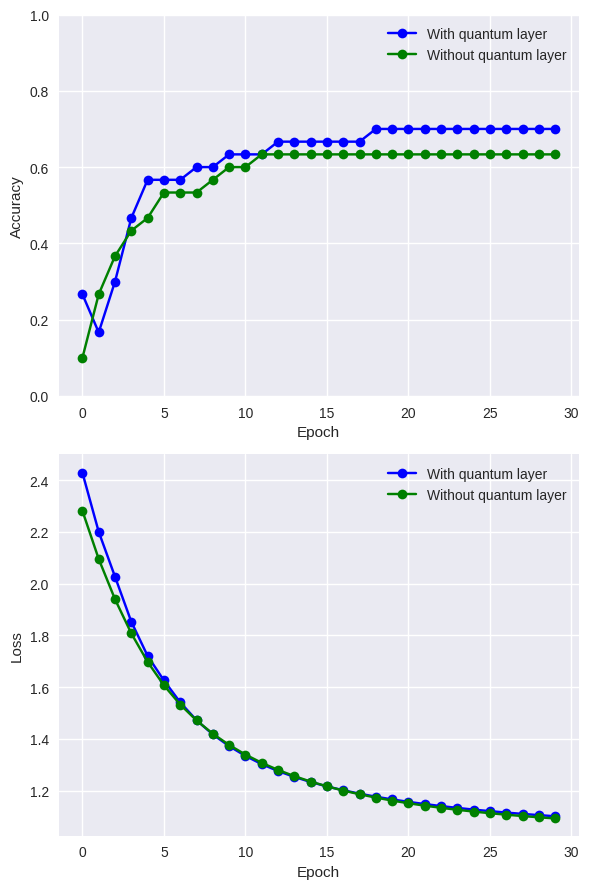

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()

Our code replicating [Henderson et al. (2019)](https://arxiv.org/abs/1904.04767) align with [Wilson et al. 2018](https://arxiv.org/abs/1806.08321) , showing that quantum transformations can enhance performance when feeding into a linear model. This supports our approach of using quantum convolution to preprocess images before feeding them into a classical neural network.

The quantum convolution layer improves the feature extraction process, leading to better performance in the classification task.

While quantum features can enhance performance, they do not show a clear advantage over all classical models. Then what do we have to do for a *quantum advantage*?  That's where the potential of our approach lies --we can use it for specific datasets with transformations that are classically intractable to simulate at scale.  



# **Task 4: QML Model Learning the Sine Function** 

We develop a quantum machine learning model in PennyLane to learn the sine function from $[0, 2 \pi]$ with `100` discretization points as labels.

First, we try out a simple variational model using **1 qubit**. We compare the performance of the model with the following cost functions: 

1. Mean Squared Error 
2. Huber Loss
3. Quantile Loss
4. Log cos-h

With this toy variational model we aim to show the fluctuations in accuracy and the need for better models which can learn with high accuracy and speed.


Optimizing with Mean Squared Error...
Step 0, Loss: 0.7798, Accuracy: 0.0100
Step 10, Loss: 0.0651, Accuracy: 0.0200
Step 20, Loss: 0.0358, Accuracy: 0.0200
Step 30, Loss: 0.0188, Accuracy: 0.0400
Target loss of 0.0001 reached at step 37
Step 40, Loss: 0.0026, Accuracy: 0.0900
Step 50, Loss: 0.0027, Accuracy: 0.0900
Step 60, Loss: 0.0006, Accuracy: 0.1800
Step 70, Loss: 0.0002, Accuracy: 0.3800
Step 80, Loss: 0.0002, Accuracy: 0.3600
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimizing with Huber Loss...
Step 0, Loss: 0.3834, Accuracy: 0.0100
Step 10, Loss: 0.0311, Accuracy: 0.0100
Step 20, Loss: 0.0191, Accuracy: 0.0200
Step 30, Loss: 0.0084, Accuracy: 0.0400
Target loss of 0.0001 reached at step 36
Step 40, Loss: 0.0017, Accuracy: 0.0700
Step 50, Loss: 0.0011, Accuracy: 0.0900
Step 60, Loss: 0.0004, Accuracy: 0.1600
Step 70, Loss: 0.0000, Accuracy: 0.5800
Step 80, Loss: 0.0001, Accuracy: 0.3500
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimizing with Quantile Loss...
Step 0, Loss: 0.398

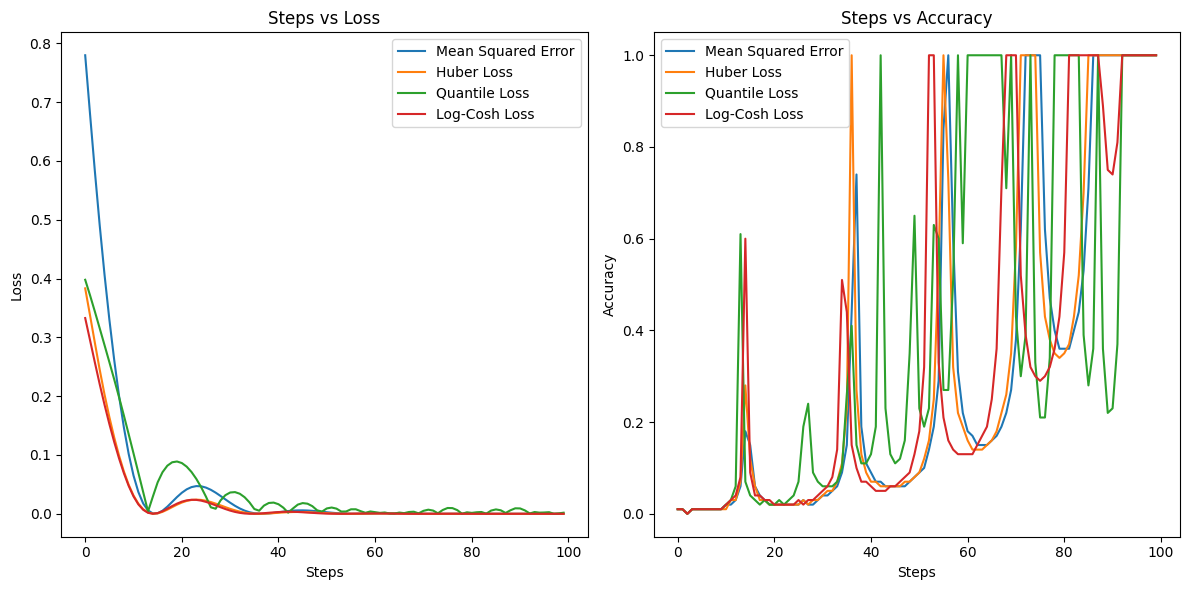

Runtime: 0:08:37.796298


Matplotlib is building the font cache; this may take a moment.


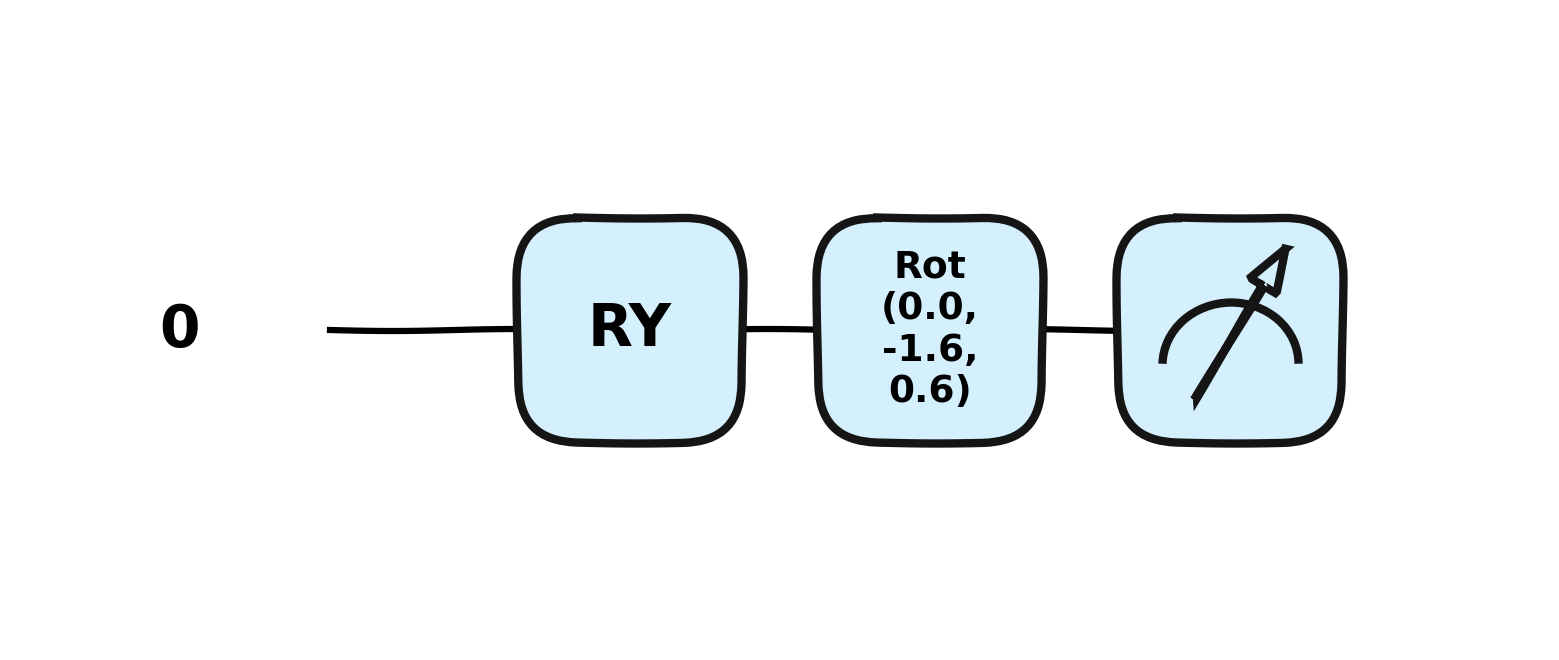

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import time
from datetime import timedelta
import matplotlib.pyplot as plt

start_time = time.time()

# Define the device
dev = qml.device("default.qubit", wires=1)

# Number of discretization points, training data
N = 100
x_values = np.linspace(0, 2 * np.pi, N)
y_values = np.sin(x_values)

# Quantum circuit for encoding and processing
@qml.qnode(dev)
def quantum_circuit(params, x):
    qml.RY(x, wires=0) 
    qml.Rot(params[0], params[1], params[2], wires=0)
    return qml.expval(qml.PauliZ(0))

# Cost functions
def mean_squared_error(params):
    predictions = np.array([quantum_circuit(params, x) for x in x_values])
    return np.mean((predictions - y_values)**2)

def huber_loss(params, delta=1.0):
    predictions = np.array([quantum_circuit(params, x) for x in x_values])
    residual = np.abs(predictions - y_values)
    return np.mean(np.where(residual <= delta, 0.5 * residual**2, delta * (residual - 0.5 * delta)))

def quantile_loss(params, quantile=0.5):
    predictions = np.array([quantum_circuit(params, x) for x in x_values])
    residual = predictions - y_values
    return np.mean(np.maximum(quantile * residual, (quantile - 1) * residual))


def log_cosh_loss(params):
    predictions = np.array([quantum_circuit(params, x) for x in x_values])
    return np.mean(np.log(np.cosh(predictions - y_values)))

# Accuracy function
def accuracy(params, tolerance=0.01):
    predictions = np.array([quantum_circuit(params, x) for x in x_values])
    correct_predictions = np.sum(np.abs(predictions - y_values) < tolerance)
    return correct_predictions / len(y_values)

# Optimization
def optimize(cost_fn, steps=100, tolerance=0.01, target_loss=0.0001):
    np.random.seed(42)
    init_params = np.random.randn(3, requires_grad=True)
    opt = qml.AdamOptimizer(0.1)
    params = init_params
    losses = []
    accuracies = []
    target_reached = False

    for i in range(steps):
        params = opt.step(cost_fn, params)
        loss = cost_fn(params)
        acc = accuracy(params, tolerance)
        losses.append(loss)
        accuracies.append(acc)
        if i % 10 == 0:
            print(f"Step {i}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
        if loss <= target_loss and not target_reached:
            print(f"Target loss of {target_loss} reached at step {i}")
            target_reached = True

    return params, losses, accuracies

# Run optimization for each cost function
cost_functions = {
    "Mean Squared Error": mean_squared_error,
    "Huber Loss": huber_loss,
    "Quantile Loss": quantile_loss,
    "Log-Cosh Loss": log_cosh_loss
}

results = {}
for name, cost_fn in cost_functions.items():
    print(f"Optimizing with {name}...")
    params, losses, accuracies = optimize(cost_fn)
    results[name] = {"losses": losses, "accuracies": accuracies}

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot steps vs loss
plt.subplot(1, 2, 1)
for name, result in results.items():
    plt.plot(result["losses"], label=name)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Steps vs Loss')
plt.legend()

# Plot steps vs accuracy
plt.subplot(1, 2, 2)
for name, result in results.items():
    plt.plot(result["accuracies"], label=name)
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Steps vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Runtime
runtime = time.time() - start_time
print("Runtime:", timedelta(seconds=runtime))


# Visualize the circuit
plt.style.use('pennylane.drawer.plot')
qnode = qml.QNode(quantum_circuit, dev)
qml.draw_mpl(qnode, decimals=1, style="pennylane_sketch")(params, x_values)
plt.show()


With our sights set on a quest to find a better-performing model we look to analyze the learning abilities of the following models:
1) The closed Ising chain 
2) The closed Ising chain with additional Heisenberg XXX interaction between alternate qubits in the chain.

We are looking to implement such a hybrid model to compare the performance of the Ising chain to a model where the number of interactions between the qubits is increased. In a nutshell, we aim to show how the increasing complexity of spin chains affects the performance of the quantum machine learning model.
Below we implement the model using Mean Absolute Error.


Running Ising model with 2 qubits
Step 0, Loss: 1.0894, Accuracy: 0.0000
Step 10, Loss: 0.0144, Accuracy: 0.0400
Step 20, Loss: 0.0137, Accuracy: 0.0400
Step 30, Loss: 0.0100, Accuracy: 0.0500
Step 40, Loss: 0.0018, Accuracy: 0.1100
Step 50, Loss: 0.0004, Accuracy: 0.2200
Loss reached 0.0001 at step 52
Step 60, Loss: 0.0002, Accuracy: 0.3700
Step 70, Loss: 0.0001, Accuracy: 0.8000
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 2.01325759 -0.1382643   1.68581677  1.52302986]
 [ 1.35753419 -0.23413696  2.6400955   0.76743473]
 [-0.21147284  0.54256004 -0.46341769 -0.46572975]]
Final loss: 0.0000
Mean Absolute Error: 0.6266191160944501
Runtime: 0:04:28.020057


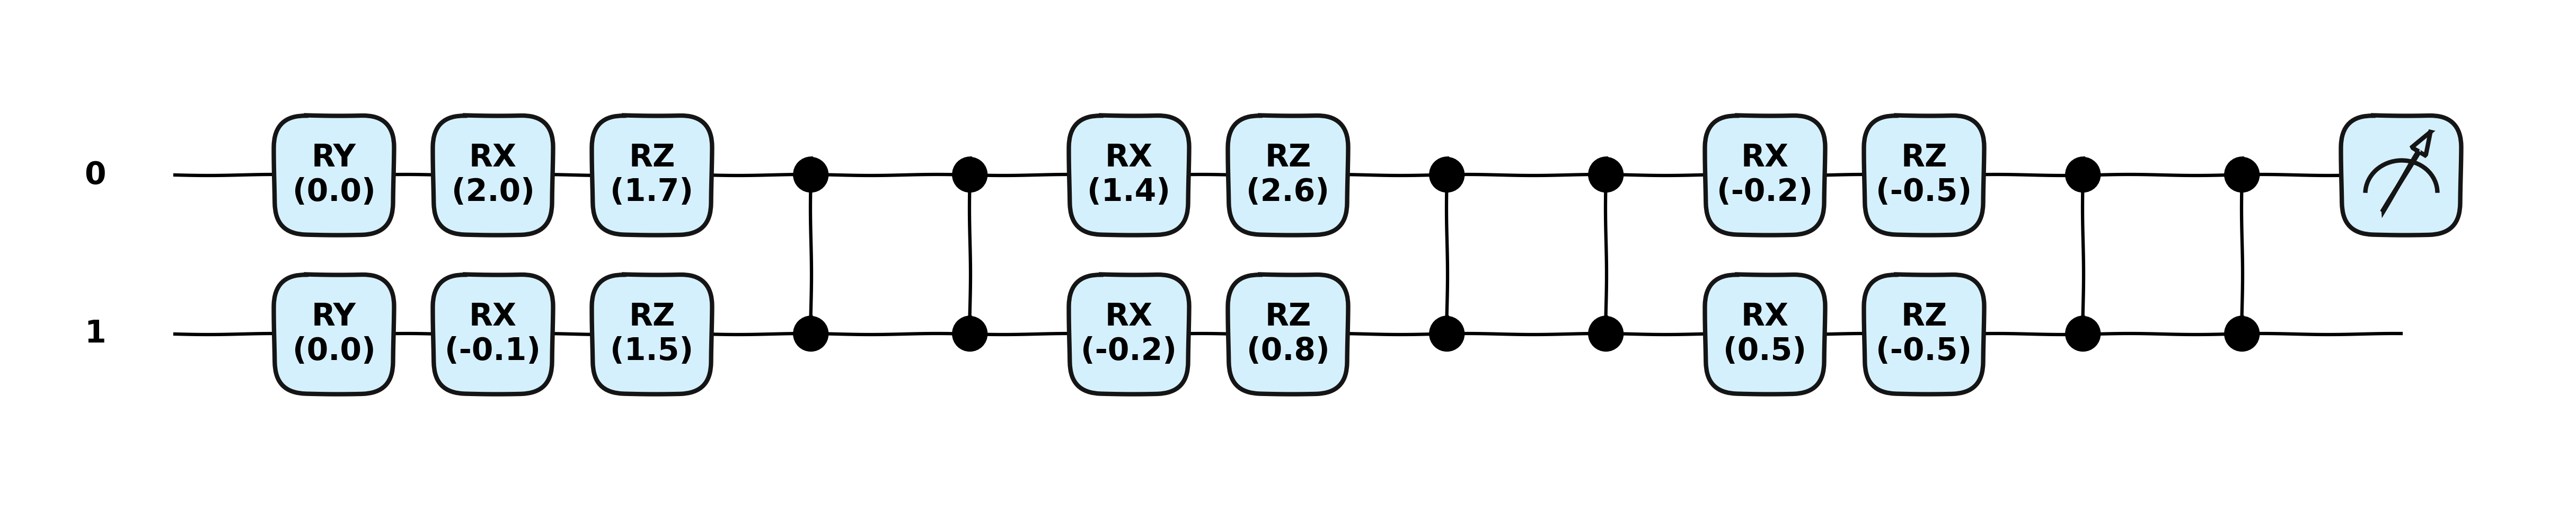


Running Ising model with 3 qubits
Step 0, Loss: 0.3038, Accuracy: 0.0200
Step 10, Loss: 0.0144, Accuracy: 0.0400
Step 20, Loss: 0.0045, Accuracy: 0.0200
Step 30, Loss: 0.0006, Accuracy: 0.0900
Step 40, Loss: 0.0002, Accuracy: 0.4600
Loss reached 0.0001 at step 44
Step 50, Loss: 0.0000, Accuracy: 0.8600
Step 60, Loss: 0.0000, Accuracy: 1.0000
Step 70, Loss: 0.0000, Accuracy: 1.0000
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 1.73818459 -1.15678502 -0.65452654  1.61391386 -1.83784763  0.68685491]
 [-0.05141669  0.00958246  0.03837897 -0.05847851 -0.46341769 -0.46572975]
 [ 1.66150858 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733]]
Final loss: 0.0000
Mean Absolute Error: 0.6246939955891886
Runtime: 0:10:47.132692


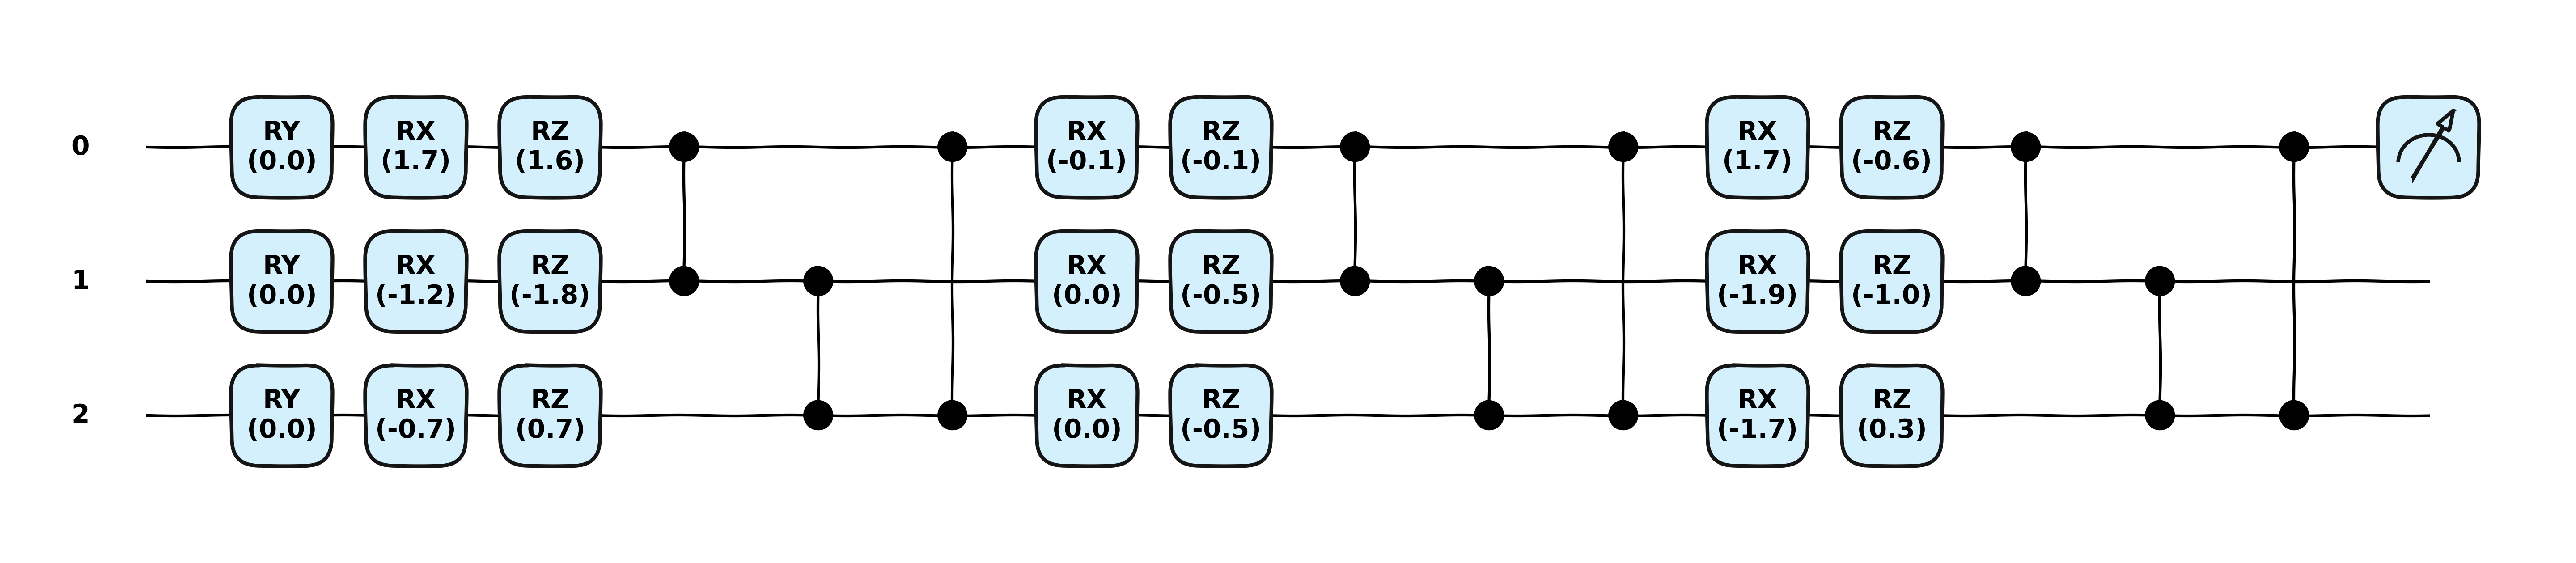


Running Ising model with 4 qubits
Step 0, Loss: 0.3839, Accuracy: 0.0000
Step 10, Loss: 0.0354, Accuracy: 0.0100
Step 20, Loss: 0.0069, Accuracy: 0.0500
Step 30, Loss: 0.0019, Accuracy: 0.1100
Step 40, Loss: 0.0006, Accuracy: 0.3700
Step 50, Loss: 0.0002, Accuracy: 0.1700
Step 60, Loss: 0.0001, Accuracy: 0.6500
Loss reached 0.0001 at step 60
Step 70, Loss: 0.0000, Accuracy: 0.7900
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[-0.19701764 -1.36855235 -0.40264201  1.14242294 -0.86148624 -0.49149703
   1.57921282 -0.53543438]
 [ 0.078852   -0.07354977 -0.46341769  0.03380101 -0.6438953  -1.91328024
  -1.72491783 -0.56228753]
 [-1.56774499  0.31424733 -0.90802408 -1.4123037   1.46564877 -0.2257763
   0.0675282  -1.42474819]]
Final loss: 0.0000
Mean Absolute Error: 0.6247931723285685
Runtime: 0:18:44.566356


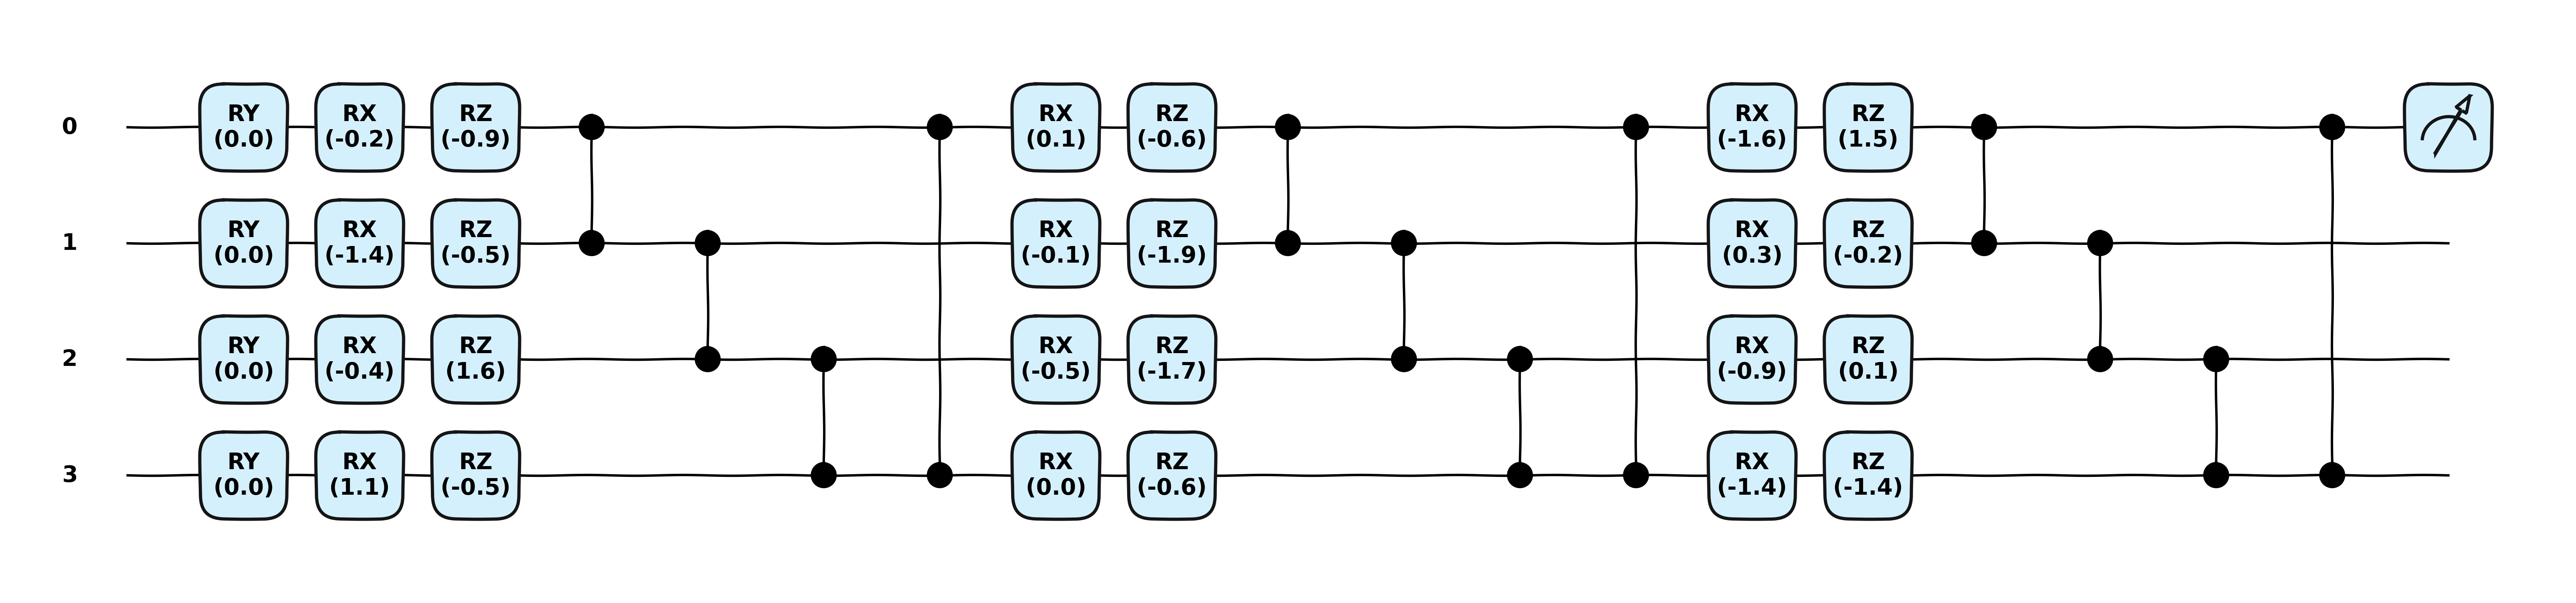


Running Ising model with 5 qubits
Step 0, Loss: 0.3172, Accuracy: 0.0100
Step 10, Loss: 0.0052, Accuracy: 0.1200
Step 20, Loss: 0.0003, Accuracy: 0.5500
Step 30, Loss: 0.0009, Accuracy: 0.0600
Step 40, Loss: 0.0002, Accuracy: 0.5500
Step 50, Loss: 0.0001, Accuracy: 0.6900
Loss reached 0.0001 at step 57
Step 60, Loss: 0.0001, Accuracy: 0.7200
Step 70, Loss: 0.0000, Accuracy: 0.8800
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 1.72819097e+00  5.95093552e-01 -3.28862637e-01 -1.58807820e-01
  -3.35775399e-04 -4.00697621e-01  3.26754749e+00  7.67434729e-01
  -4.69474386e-01 -1.44185912e+00]
 [ 5.23846551e-02 -2.90817189e-02  2.41962272e-01 -1.91328024e+00
  -3.25529586e+00 -1.16830407e+00 -1.01283112e+00  3.14247333e-01
  -9.08024075e-01 -1.41230370e+00]
 [ 1.56610046e+00 -2.25776301e-01  6.75282047e-02 -1.42474819e+00
  -5.44382724e-01  1.10922590e-01 -1.15099358e+00  3.75698018e-01
  -6.00638690e-01 -2.91693750e-01]]
Final loss:

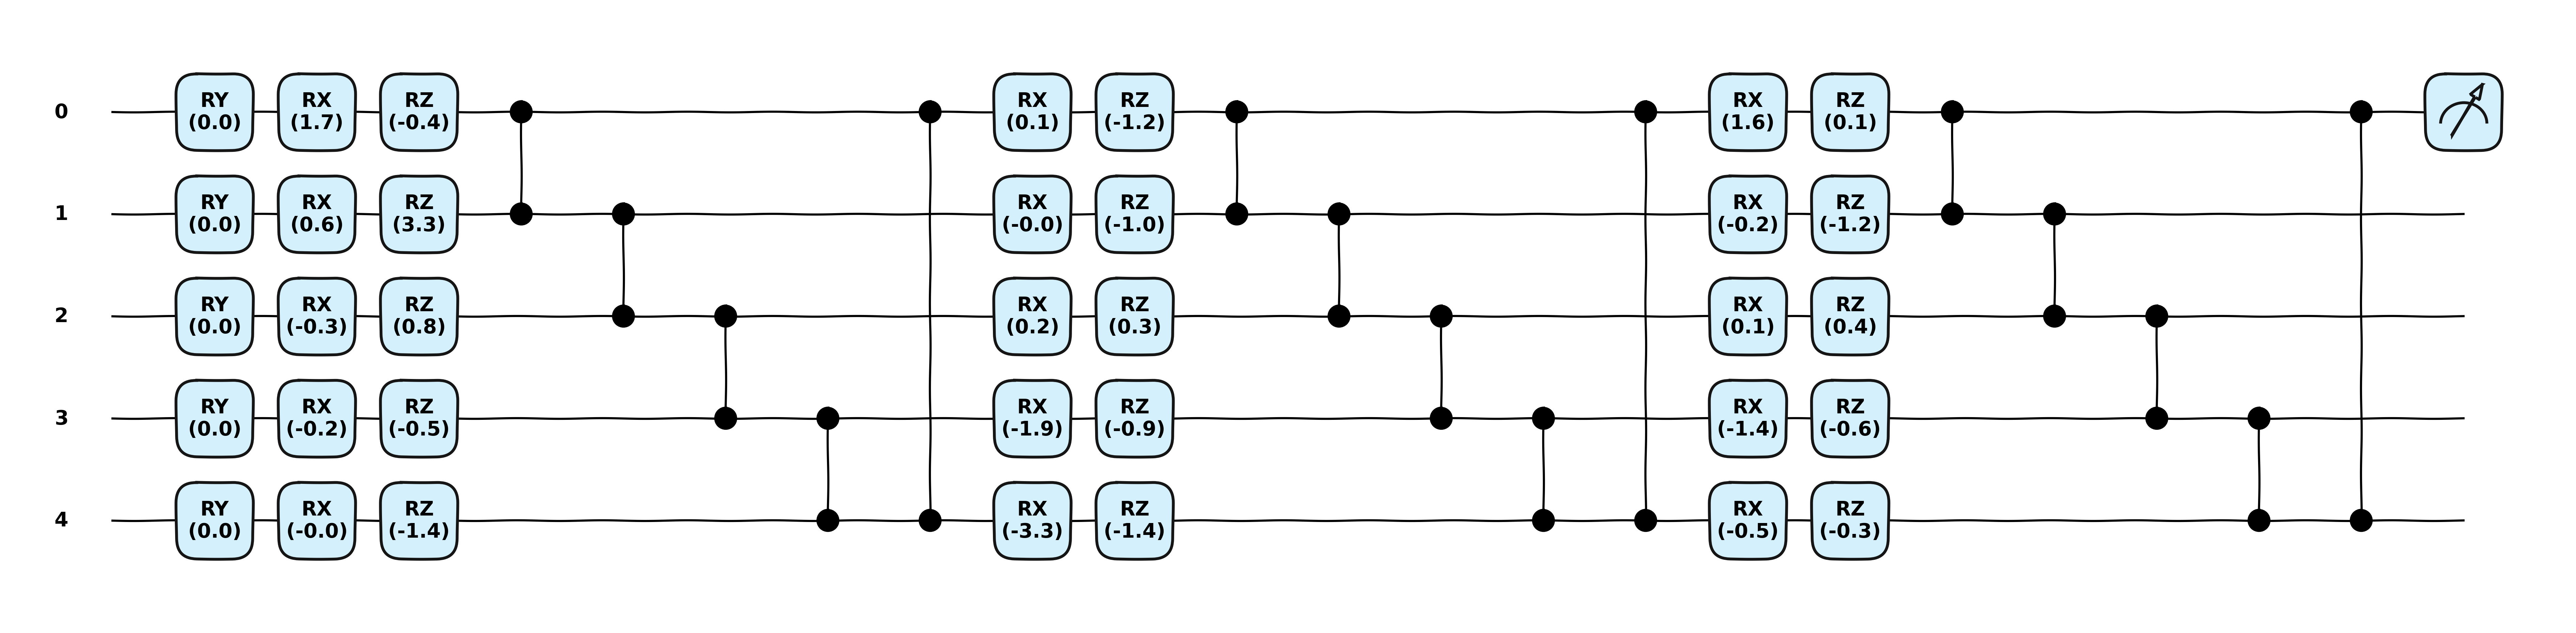


Running Heisenberg-Ising model with 2 qubits
Step 0, Loss: 0.7238, Accuracy: 0.0000
Step 10, Loss: 0.0329, Accuracy: 0.0300
Step 20, Loss: 0.0106, Accuracy: 0.0400
Step 30, Loss: 0.0027, Accuracy: 0.1500
Step 40, Loss: 0.0003, Accuracy: 0.3800
Step 50, Loss: 0.0004, Accuracy: 0.3000
Step 60, Loss: 0.0001, Accuracy: 0.5600
Loss reached 0.0001 at step 61
Step 70, Loss: 0.0001, Accuracy: 0.8300
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 1.36692965  0.62869366  0.07161408  3.2491385   0.14833063 -0.60612256]
 [ 1.20722722  1.17371511 -0.39008338  1.57522976 -0.26173904 -0.46572975]
 [ 0.24196227 -0.65407962 -1.72491783  0.05889059 -1.01283112  0.31424733]]
Final loss: 0.0000
Mean Absolute Error): 0.6258732481741951
Runtime: 0:06:54.888663


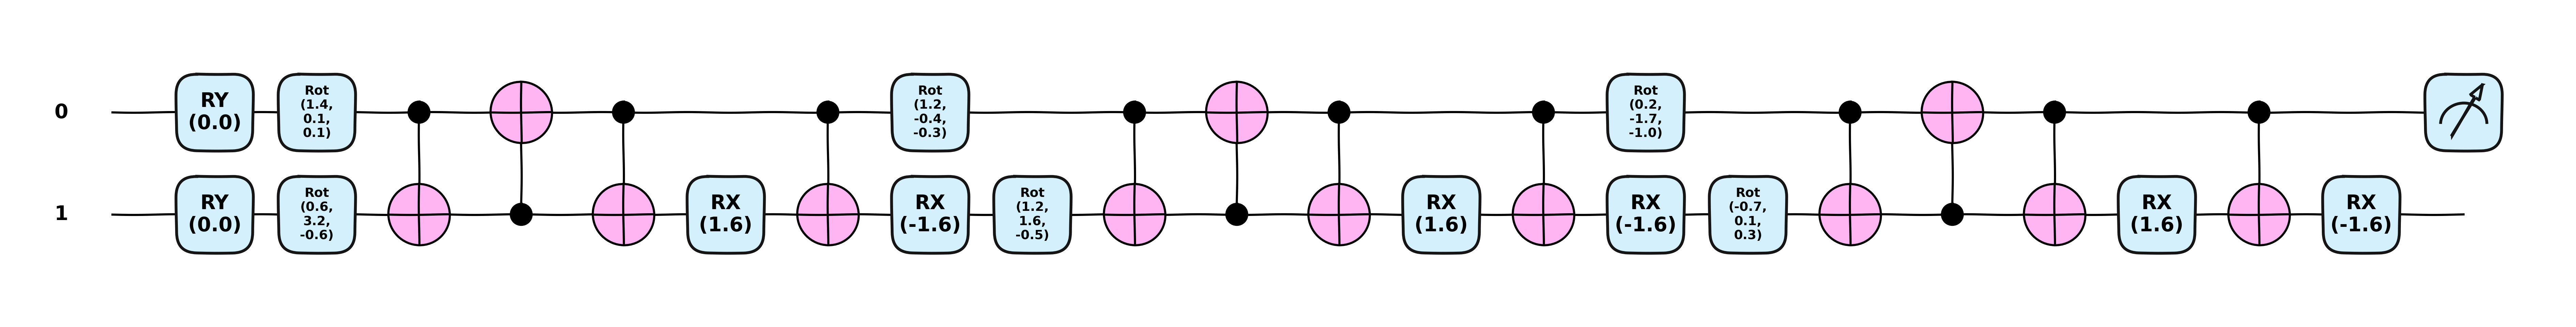


Running Heisenberg-Ising model with 3 qubits
Step 0, Loss: 0.2848, Accuracy: 0.0200
Step 10, Loss: 0.0457, Accuracy: 0.0200
Step 20, Loss: 0.0098, Accuracy: 0.0800
Step 30, Loss: 0.0033, Accuracy: 0.0300
Step 40, Loss: 0.0016, Accuracy: 0.2700
Step 50, Loss: 0.0010, Accuracy: 0.3600
Step 60, Loss: 0.0007, Accuracy: 0.3300
Step 70, Loss: 0.0005, Accuracy: 0.3500
Step 80, Loss: 0.0003, Accuracy: 0.4400
Step 90, Loss: 0.0002, Accuracy: 0.5600
Loss reached 0.0001 at step 99
Optimized parameters: [[ 0.72179476  0.47696942  1.25170669  1.05112373  0.05263643  0.14347269
   2.04029332  1.48119238  0.26893632]
 [ 0.13475713 -0.11183933  0.15601535 -0.14178564 -1.33497671 -1.36522983
  -1.1862485  -1.0615225   0.34888362]
 [-0.90802408 -3.3405385   1.95261687 -0.2257763  -0.36413043 -1.49827141
  -0.54438272  0.11092259 -1.15099358]]
Final loss: 0.0001
Mean Absolute Error): 0.6217003844891114
Runtime: 0:17:14.349952


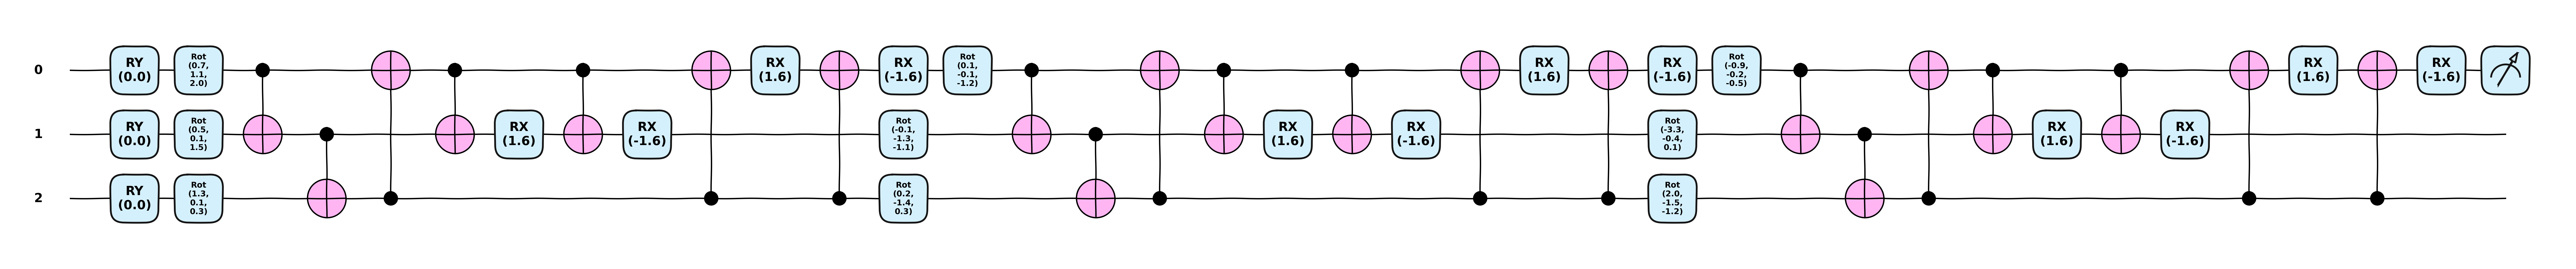


Running Heisenberg-Ising model with 4 qubits
Step 0, Loss: 0.3449, Accuracy: 0.0000
Step 10, Loss: 0.0595, Accuracy: 0.0200
Step 20, Loss: 0.0245, Accuracy: 0.0200
Step 30, Loss: 0.0081, Accuracy: 0.0300
Step 40, Loss: 0.0018, Accuracy: 0.0500
Step 50, Loss: 0.0005, Accuracy: 0.2600
Step 60, Loss: 0.0003, Accuracy: 0.4000
Loss reached 0.0001 at step 68
Step 70, Loss: 0.0001, Accuracy: 0.7800
Step 80, Loss: 0.0000, Accuracy: 0.8300
Step 90, Loss: 0.0000, Accuracy: 0.8600
Optimized parameters: [[ 1.45383948 -1.45171029 -0.76365266  1.52794728 -0.56435351 -0.96051791
   1.11818604  2.4930426   0.10617989 -0.07712335  1.12119534  0.04018936]
 [-0.93844625 -1.99939927 -1.43763461 -1.57006599 -0.93096856 -0.1750677
  -0.06974925 -1.4816513   1.41864664  0.71651087 -0.16424516 -1.53968643]
 [-0.54438272  1.49118428 -2.22018652 -0.45420485 -0.60063869 -1.01924925
  -0.83055556  1.5301033  -0.01349722 -1.05771093  0.82254491 -1.22084365]]
Final loss: 0.0000
Mean Absolute Error): 0.623367181888

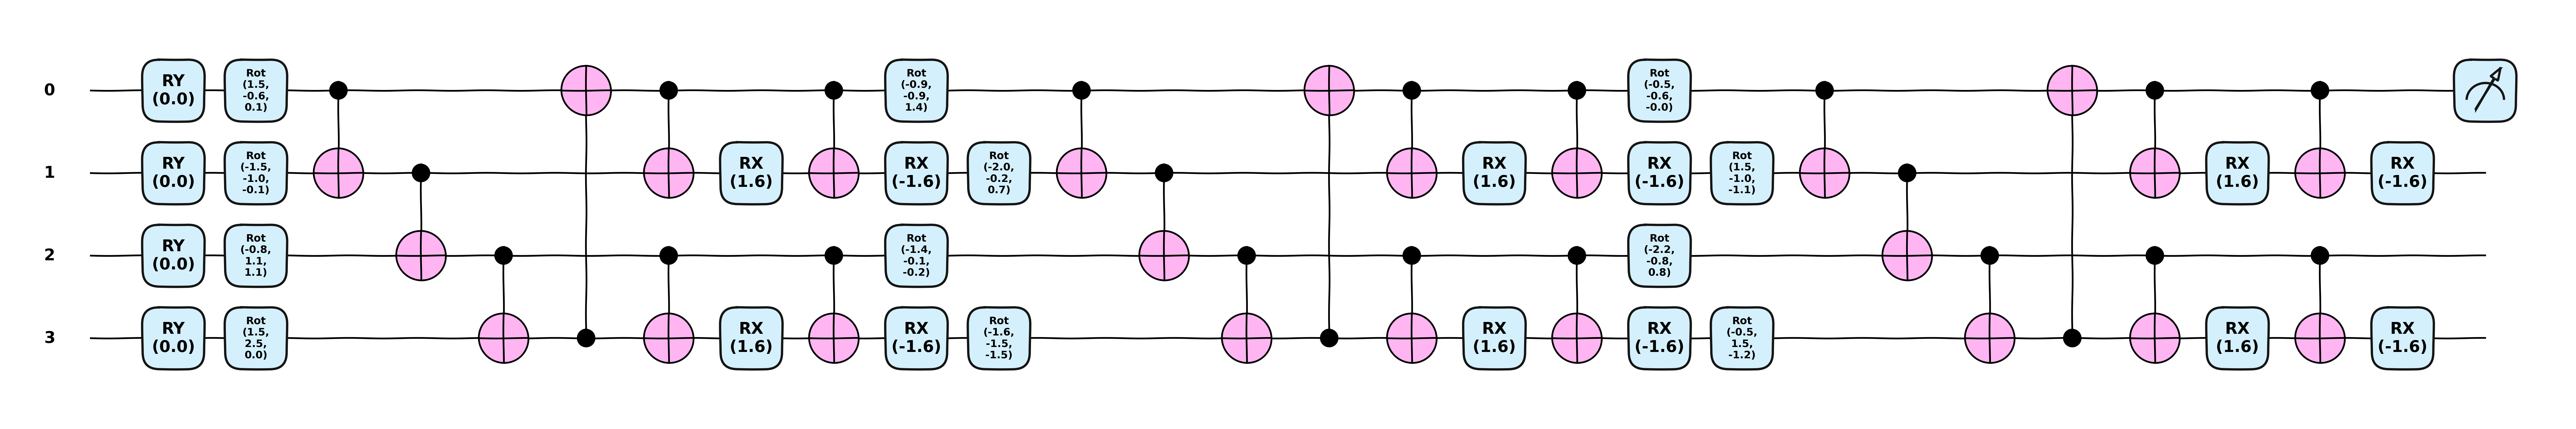


Running Heisenberg-Ising model with 5 qubits
Step 0, Loss: 0.2500, Accuracy: 0.0000
Step 10, Loss: 0.0207, Accuracy: 0.0300
Step 20, Loss: 0.0100, Accuracy: 0.0600
Step 30, Loss: 0.0019, Accuracy: 0.2000
Step 40, Loss: 0.0004, Accuracy: 0.4700
Step 50, Loss: 0.0002, Accuracy: 0.5200
Loss reached 0.0001 at step 58
Step 60, Loss: 0.0001, Accuracy: 0.7100
Step 70, Loss: 0.0001, Accuracy: 0.7700
Step 80, Loss: 0.0000, Accuracy: 0.8800
Step 90, Loss: 0.0000, Accuracy: 0.9100
Optimized parameters: [[ 0.42119959 -0.72467257  1.68961456  1.52914588 -0.86345398 -0.1898358
   3.10229356  0.20850481 -2.27455226  0.80478643 -0.34691504 -0.7529014
   0.48642596 -2.49773025 -2.29131642]
 [-0.01534208 -0.05202605  1.01922997  0.05889468 -1.56234068  1.58422469
   0.97852727 -0.08551533 -1.5654722  -1.15726264 -0.69612119 -0.05457326
   1.38877184 -1.93549544 -0.02109257]
 [-0.60170661  0.75992958  1.01676964 -0.26042019  1.89196795 -1.22084365
   0.05438878 -1.74987616 -1.56864649  0.04613536  0.738

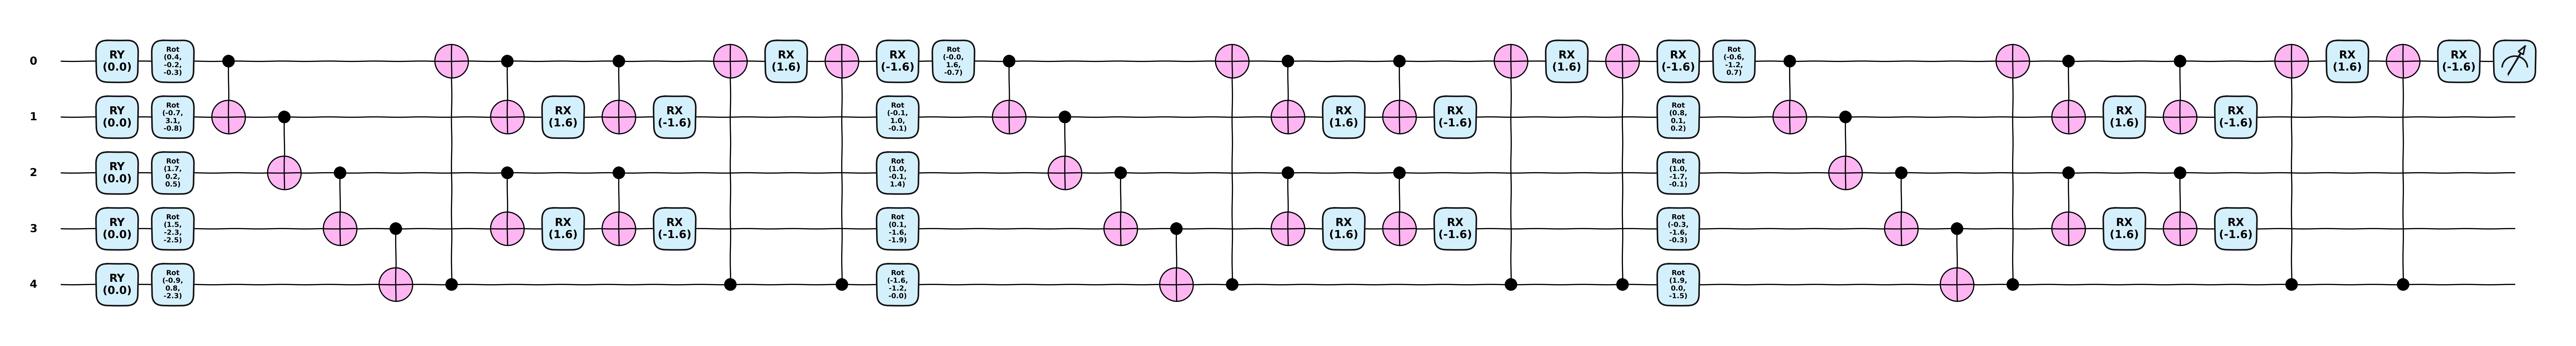

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import os


#ISING
start_time = time.time()

# Create a directory to save the .dat files if it doesn't exist
output_dir = "loss_data"
os.makedirs(output_dir, exist_ok=True)

# Define the number of qubits to run
qubit_counts = [2, 3, 4, 5]

# Define the target loss value
target_loss = 0.0001

# Define the Shift (LS) 2.0 | Tolerance=0.01**
lsvec=[2]
for ls in lsvec:

# Define accuracy function
    def accuracy(labels, predictions, tolerance=0.01):
        correct_predictions = np.abs(labels - predictions) < tolerance
        return np.mean(correct_predictions)
    
    for num_qubits in qubit_counts:
        print(f"\nRunning Ising model with {num_qubits} qubits")
    
        # Define the device
        dev = qml.device("default.qubit", wires=num_qubits)
    
        # Number of discretization points, training data
        N = 100
        x_values = np.linspace(0, 2 * np.pi, N)
        y_values = np.sin(x_values)
    
        # Quantum circuit for encoding and processing
        @qml.qnode(dev)
        def quantum_circuit(params, x):
            # Encode the classical input x into the quantum state
            for i in range(num_qubits):
                qml.RY(x, wires=i)
            
            # Apply the variational layers
            for layer in params:
                for i in range(num_qubits):
                    qml.RX(layer[i], wires=i)
                    qml.RZ(layer[i + num_qubits], wires=i)
                for i in range(num_qubits):
                    qml.CZ(wires=[i, (i + 1) % num_qubits])
            
            # Measure the expectation value of the Pauli-Z operator
            return qml.expval(qml.PauliZ(0))
    
        # Cost function: Mean Squared Error between predicted and target values 
        def cost(params):
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            return np.mean((predictions - y_values)**2)
    
        # Initialize random parameters
        np.random.seed(42)
        num_layers = 3
        init_params = np.random.randn(num_layers, 2 * num_qubits, requires_grad=True)
    
        # Optimization
        opt = qml.AdamOptimizer(0.1)
        steps = 100
        params = init_params
    
        # To store the loss and accuracy at each step
        losses = []
        accuracies = []
        loss_reached = False
    
        for i in range(steps):
            params = opt.step(cost, params)
            loss = cost(params)
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            acc = accuracy(y_values, predictions)
            losses.append(loss)
            accuracies.append(acc)
            if i % 10 == 0:
                print(f"Step {i}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
            if loss <= target_loss and not loss_reached:
                print(f"Loss reached {target_loss} at step {i}")
                loss_reached = True
    
        # Save the steps vs. loss and accuracy values to a .dat file
        filename = os.path.join(output_dir, f"Ising_loss_2_vs_steps_{num_qubits}_qubits_ls={ls}.dat")
        I = np.column_stack((range(len(losses)), losses, accuracies))

        np.savetxt(filename, I, header="Step Loss Accuracy", fmt="%d %0.6f %0.6f")
        globals()[f"I_M_{num_qubits}"] = I
    
        # Print the final parameters and loss
        print(f"Optimized parameters: {params}")
        final_loss = cost(params)
        print(f"Final loss: {final_loss:.4f}")
    
        # Test the model on new data
        test_x_values = np.linspace(0, 2 * np.pi + ls, N) 
        test_predictions = np.array([quantum_circuit(params, x) for x in test_x_values])
    
        
    
        # Evaluating model performance using regression metrics: Mean Absolute Error
        mae = np.mean(np.abs(test_predictions - y_values))
        print(f"Mean Absolute Error: {mae}")
    
        # Runtime
        runtime = time.time() - start_time
        print("Runtime:", timedelta(seconds=runtime))
    
        # Visualize the circuit
        plt.style.use('pennylane.drawer.plot')
        qnode = qml.QNode(quantum_circuit, dev)
        qml.draw_mpl(qnode, decimals=1, style="pennylane_sketch")(params, x_values[0])
        plt.show()

#HYBRID
start_time = time.time()

# Create a directory to save the .dat files if it doesn't exist
output_dir = "loss_data"
os.makedirs(output_dir, exist_ok=True)

# Define the number of qubits to run
qubit_counts = [2,3,4,5]

# Define the target loss value
target_loss = 0.0001

# Define the Shift (LS) 2.0 | Tolerance=0.01**
ls_vec= [2]
for ls in ls_vec:
# Define an accuracy function
    def accuracy(labels, predictions, tolerance=0.01):
        correct_predictions = np.abs(labels - predictions) < tolerance
        return np.mean(correct_predictions)
    
    for num_qubits in qubit_counts:
        print(f"\nRunning Heisenberg-Ising model with {num_qubits} qubits")
    
        # Define the device
        dev = qml.device("default.qubit", wires=num_qubits)
    
        # Number of discretization points, training data
        N = 100
        x_values = np.linspace(0, 2 * np.pi, N)
        y_values = np.sin(x_values)
    
        # Quantum circuit for encoding and processing
        @qml.qnode(dev)
        def quantum_circuit(params, x):
            # Encode the classical input x into the quantum state
            for i in range(num_qubits):
                qml.RY(x, wires=i)
            
            # Apply the variational layers
            for layer in params:
                for i in range(num_qubits):
                    qml.Rot(layer[i], layer[i + num_qubits], layer[i + 2 * num_qubits], wires=i)
                
                # Apply CX chain for entanglement
                for i in range(num_qubits - 1):
                    qml.CNOT(wires=[i, i + 1])
                qml.CNOT(wires=[num_qubits - 1, 0])
            
                # Apply additional Heisenberg XXX interaction between alternate qubits
                for i in range(0, num_qubits, 2):
                    qml.CNOT(wires=[i, (i + 1) % num_qubits])
                    qml.RX(np.pi/2, wires=(i + 1) % num_qubits)
                    qml.CNOT(wires=[i, (i + 1) % num_qubits])
                    qml.RX(-np.pi/2, wires=(i + 1) % num_qubits)
            
            # Measure the expectation value of the Pauli-Z operator
            return qml.expval(qml.PauliZ(0))
    
        # Cost function: Mean Squared Error between predicted and target values 
        def cost(params):
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            return np.mean((predictions - y_values)**2)
    
        # Initialize random parameters
        np.random.seed(42)
        num_layers = 3
        init_params = np.random.randn(num_layers, 3 * num_qubits, requires_grad=True)
    
        # Optimization
        opt = qml.AdamOptimizer(0.1)
        steps = 100
        params = init_params
    
        # To store the loss and accuracy at each step
        losses = []
        accuracies = []
        loss_reached = False
    
        for i in range(steps):
            params = opt.step(cost, params)
            loss = cost(params)
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            acc = accuracy(y_values, predictions)
            losses.append(loss)
            accuracies.append(acc)
            if i % 10 == 0:
                print(f"Step {i}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
            if loss <= target_loss and not loss_reached:
                print(f"Loss reached {target_loss} at step {i}")
                loss_reached = True
    
        # Save the steps vs. loss values to a .dat file
        filename = os.path.join(output_dir, f"hybrid_loss_vs_steps_{num_qubits}_qubits_ls={ls}.dat")
        H = np.column_stack((range(len(losses)), losses, accuracies))

        np.savetxt(filename, H, header="Step Loss Accuracy", fmt="%d %0.6f %0.6f")
        globals()[f"H_M_{num_qubits}"] = H
    
        # Print the final parameters and loss
        print(f"Optimized parameters: {params}")
        final_loss = cost(params)
        print(f"Final loss: {final_loss:.4f}")
    
        # Test the model on new data
        test_x_values = np.linspace(0, 2 * np.pi + ls, N) 
        test_predictions = np.array([quantum_circuit(params, x) for x in test_x_values])
       
    
        # Evaluating model performance using regression metrics: Mean Absolute Error
        mae = np.mean(np.abs(test_predictions - y_values))
        print(f"Mean Absolute Error): {mae}")
    
        # Runtime
        runtime = time.time() - start_time
        print("Runtime:", timedelta(seconds=runtime))
    
        # Visualize the circuit
        plt.style.use('pennylane.drawer.plot')
        qnode = qml.QNode(quantum_circuit, dev)
        qml.draw_mpl(qnode, decimals=1, style="pennylane_sketch")(params, x_values[0])
        plt.show()



With the above implementation, we again run the same analysis for Huber Loss.
Motivation for Using Huber Loss:
1) Huber Loss behaves like MSE when the error is small (quadratic loss), which helps in faster convergence when the errors are small and helps in refining predictions. When the errors are large, they behave like MAE (linear loss), which makes them less sensitive to outliers than MSE. This robustness can be particularly beneficial in quantum machine learning, where data can have inherent noise or outliers.
2) Huber Loss provides a smooth approximation to MAE, which helps in gradient-based optimization methods. This smoothness can help in achieving better convergence properties compared to the non-smooth MAE.
3) It strikes a balance between the sensitivity to large errors and smooth gradients, which can help in stable training and better generalization.


Running Ising model with 2 qubits
Step 0, Loss: 0.5131, Accuracy: 0.0000
Step 10, Loss: 0.0042, Accuracy: 0.0500
Step 20, Loss: 0.0038, Accuracy: 0.0500
Step 30, Loss: 0.0034, Accuracy: 0.0600
Step 40, Loss: 0.0001, Accuracy: 0.3300
Loss reached 0.0001 at step 49
Step 50, Loss: 0.0000, Accuracy: 1.0000
Step 60, Loss: 0.0000, Accuracy: 1.0000
Step 70, Loss: 0.0000, Accuracy: 1.0000
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 1.98619151 -0.1382643   1.7000873   1.52302986]
 [ 1.32875309 -0.23413696  2.60853309  0.76743473]
 [-0.20409731  0.54256004 -0.46341769 -0.46572975]]
Final loss: 0.0000
Huber Loss: 0.6239697957470405
Runtime: 0:04:26.668753


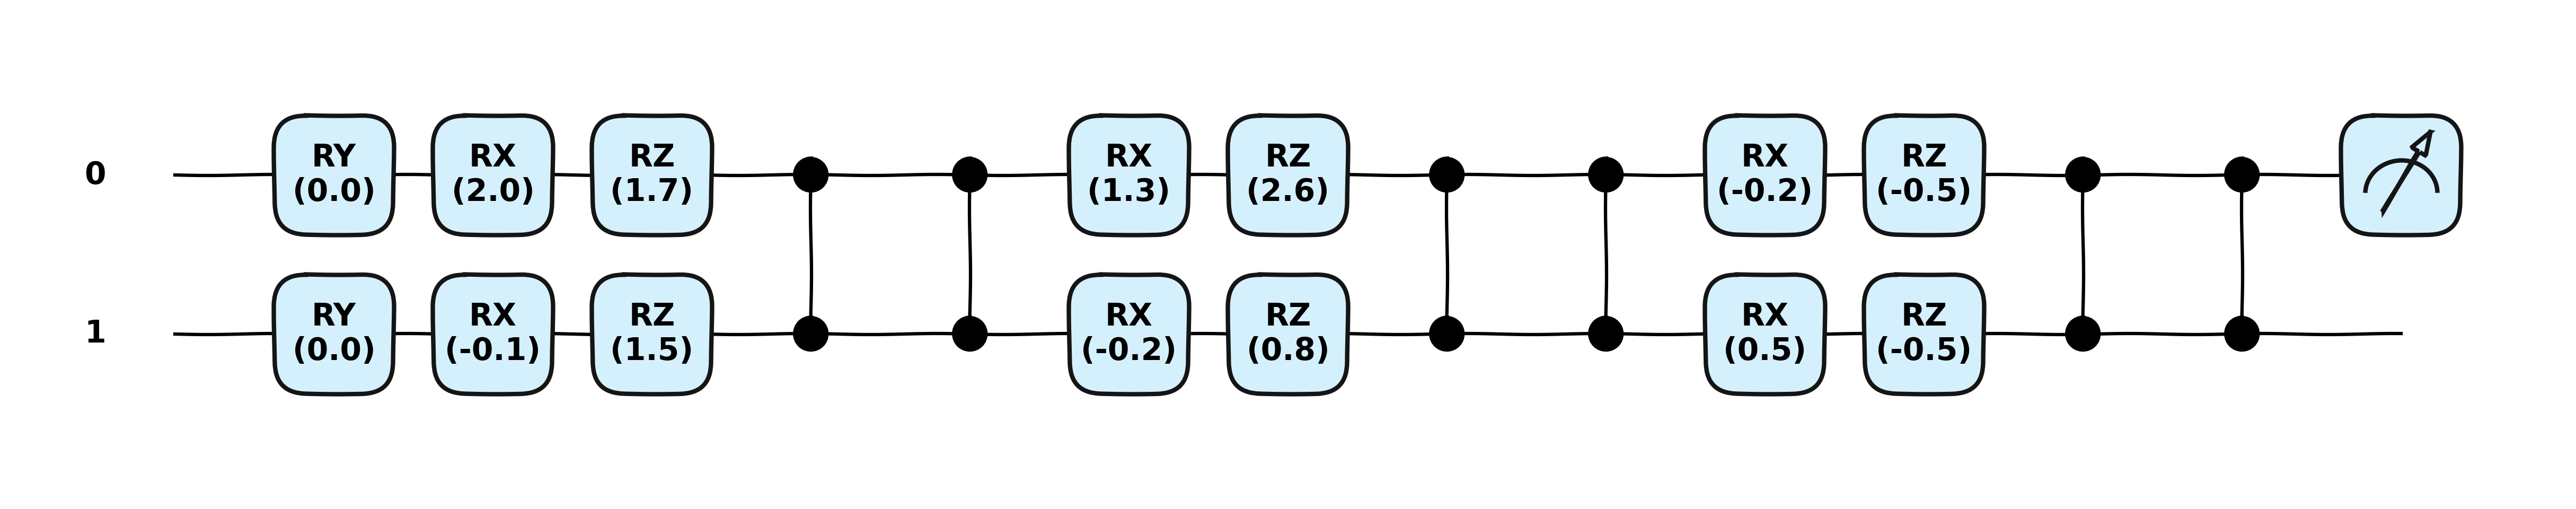


Running Ising model with 3 qubits
Step 0, Loss: 0.1519, Accuracy: 0.0200
Step 10, Loss: 0.0072, Accuracy: 0.0400
Step 20, Loss: 0.0023, Accuracy: 0.0200
Step 30, Loss: 0.0003, Accuracy: 0.0900
Step 40, Loss: 0.0001, Accuracy: 0.4600
Loss reached 0.0001 at step 41
Step 50, Loss: 0.0000, Accuracy: 0.8600
Step 60, Loss: 0.0000, Accuracy: 1.0000
Step 70, Loss: 0.0000, Accuracy: 1.0000
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 1.73818849 -1.15679396 -0.65452272  1.6139062  -1.83784969  0.68686292]
 [-0.05141611  0.00958318  0.03837976 -0.05847043 -0.46341769 -0.46572975]
 [ 1.66150819 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733]]
Final loss: 0.0000
Huber Loss: 0.6246945415827839
Runtime: 0:10:28.824569


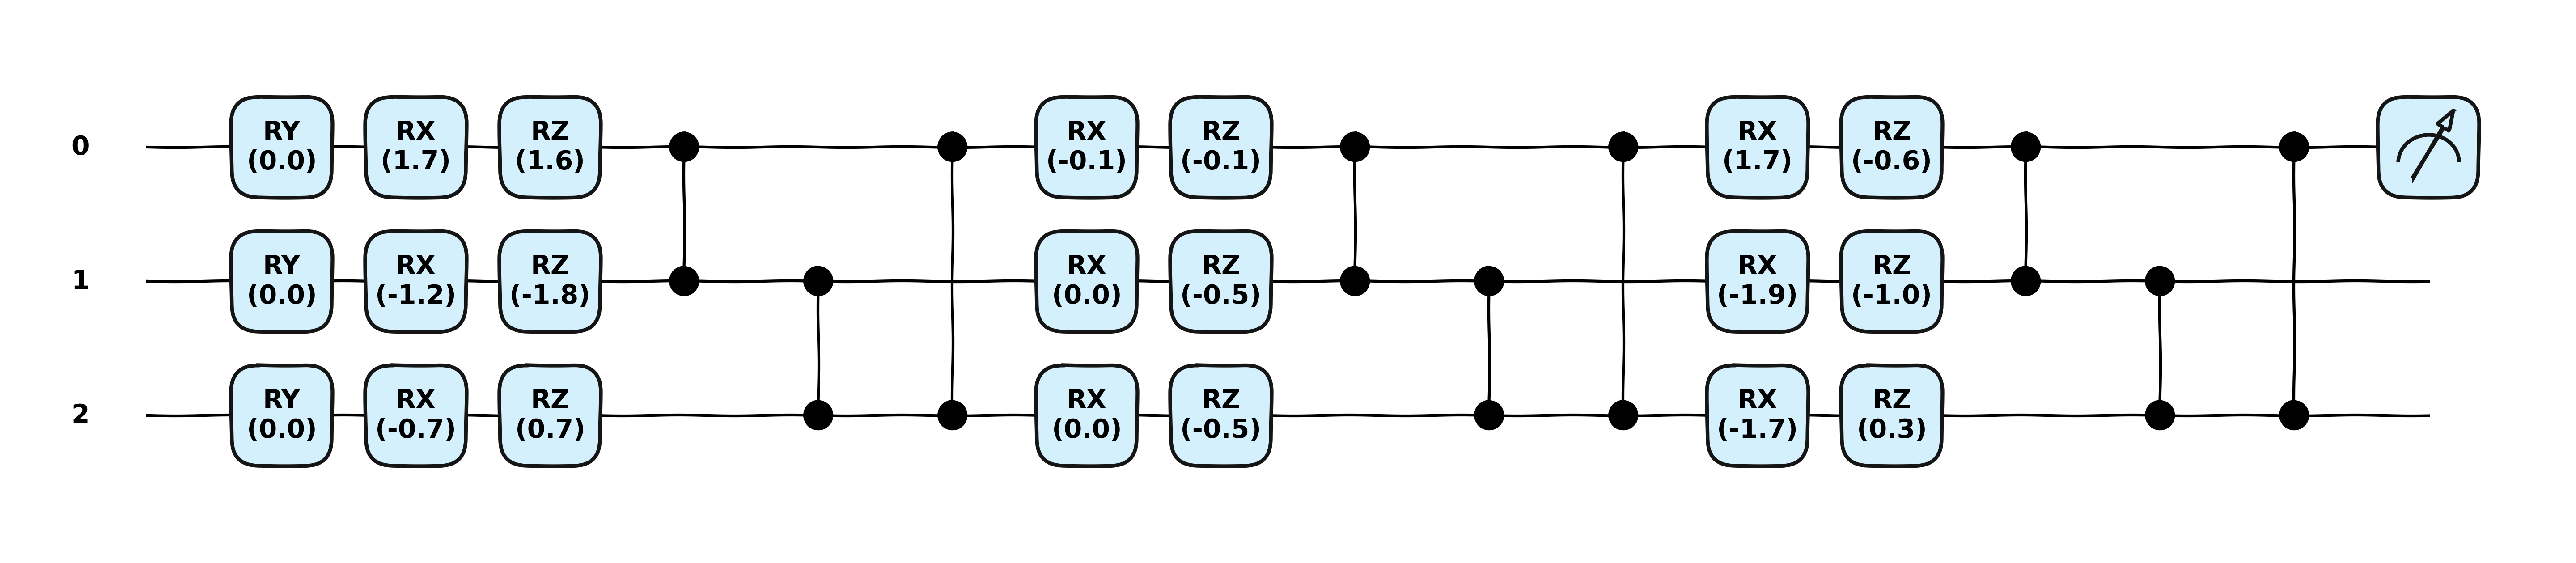


Running Ising model with 4 qubits
Step 0, Loss: 0.1920, Accuracy: 0.0000
Step 10, Loss: 0.0172, Accuracy: 0.0100
Step 20, Loss: 0.0035, Accuracy: 0.0500
Step 30, Loss: 0.0009, Accuracy: 0.1100
Step 40, Loss: 0.0003, Accuracy: 0.3800
Loss reached 0.0001 at step 45
Step 50, Loss: 0.0001, Accuracy: 0.1600
Step 60, Loss: 0.0001, Accuracy: 0.6500
Step 70, Loss: 0.0000, Accuracy: 0.7700
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[-0.20656831 -1.36334077 -0.40384664  1.13983203 -0.85928947 -0.46955025
   1.57921282 -0.56461724]
 [ 0.0789414  -0.0704525  -0.46341769  0.03276868 -0.64504052 -1.91328024
  -1.72491783 -0.56228753]
 [-1.56722099  0.31424733 -0.90802408 -1.4123037   1.46564877 -0.2257763
   0.0675282  -1.42474819]]
Final loss: 0.0000
Huber Loss: 0.624696078335358
Runtime: 0:18:13.466965


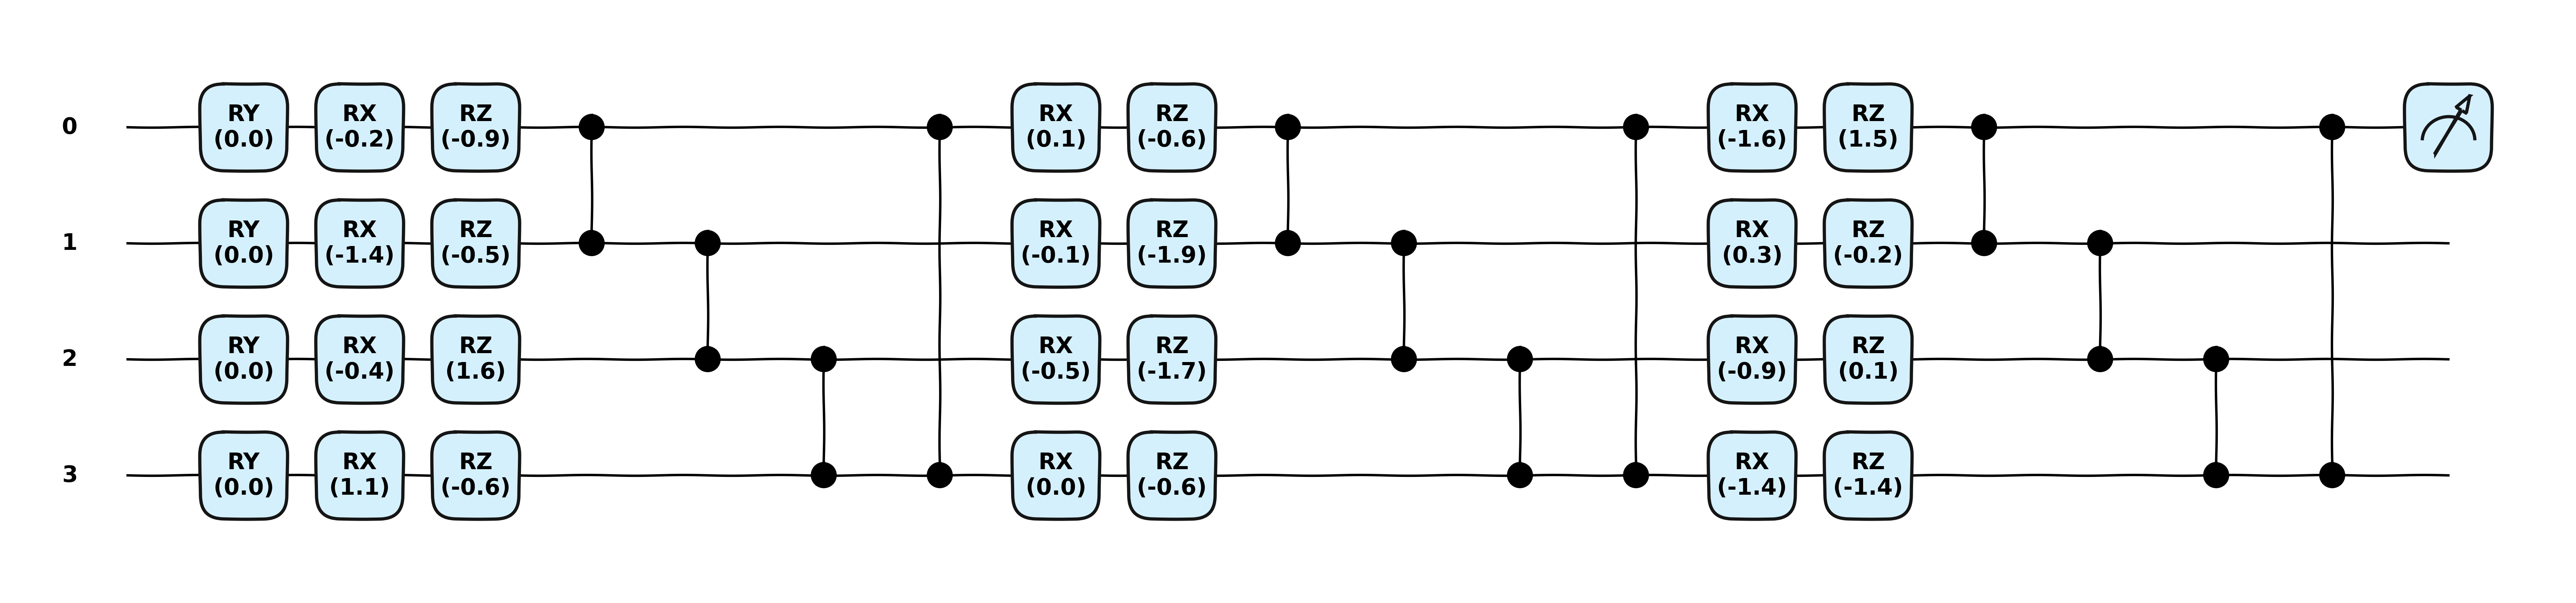


Running Ising model with 5 qubits
Step 0, Loss: 0.1586, Accuracy: 0.0100
Step 10, Loss: 0.0026, Accuracy: 0.1200
Loss reached 0.0001 at step 17
Step 20, Loss: 0.0001, Accuracy: 0.5500
Step 30, Loss: 0.0005, Accuracy: 0.0600
Step 40, Loss: 0.0001, Accuracy: 0.5500
Step 50, Loss: 0.0001, Accuracy: 0.6900
Step 60, Loss: 0.0000, Accuracy: 0.7200
Step 70, Loss: 0.0000, Accuracy: 0.8800
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 1.72819075e+00  5.95087103e-01 -3.28840550e-01 -1.58807485e-01
  -3.35398089e-04 -4.00697527e-01  3.26753945e+00  7.67434729e-01
  -4.69474386e-01 -1.44184608e+00]
 [ 5.23849366e-02 -2.90830281e-02  2.41962272e-01 -1.91328024e+00
  -3.25529555e+00 -1.16830406e+00 -1.01283112e+00  3.14247333e-01
  -9.08024075e-01 -1.41230370e+00]
 [ 1.56610008e+00 -2.25776301e-01  6.75282047e-02 -1.42474819e+00
  -5.44382725e-01  1.10922590e-01 -1.15099358e+00  3.75698018e-01
  -6.00638690e-01 -2.91693750e-01]]
Final loss:

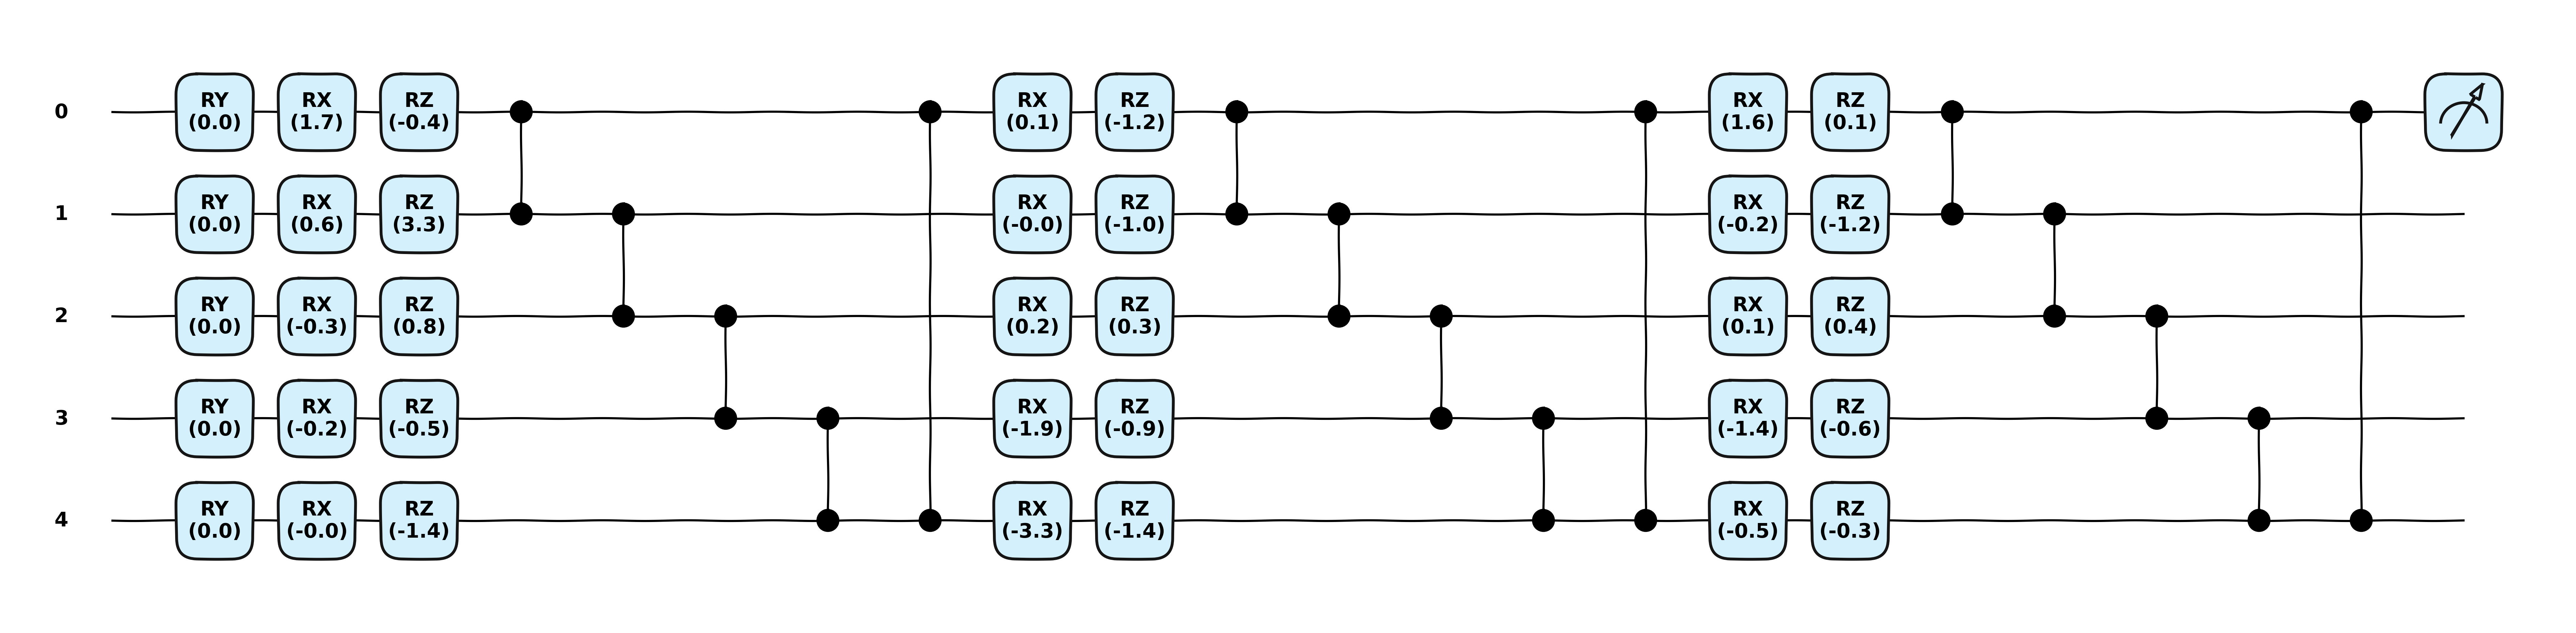


Running Heisenberg-Ising model with 2 qubits
Step 0, Loss: 0.3526, Accuracy: 0.0000
Step 10, Loss: 0.0178, Accuracy: 0.1200
Step 20, Loss: 0.0049, Accuracy: 0.0300
Step 30, Loss: 0.0014, Accuracy: 0.2300
Step 40, Loss: 0.0002, Accuracy: 0.3700
Step 50, Loss: 0.0002, Accuracy: 0.1900
Loss reached 0.0001 at step 56
Step 60, Loss: 0.0000, Accuracy: 0.7900
Step 70, Loss: 0.0000, Accuracy: 0.8000
Step 80, Loss: 0.0000, Accuracy: 1.0000
Step 90, Loss: 0.0000, Accuracy: 1.0000
Optimized parameters: [[ 1.37271785  0.52722217  0.11126889  3.34271416  0.15142222 -0.70175867]
 [ 1.1115911   1.19674254 -0.3677662   1.58043561 -0.28534521 -0.46572975]
 [ 0.24196227 -0.70254929 -1.72491783  0.10659295 -1.01283112  0.31424733]]
Final loss: 0.0000
Huber Loss): 0.6262994302819567
Runtime: 0:06:34.908596


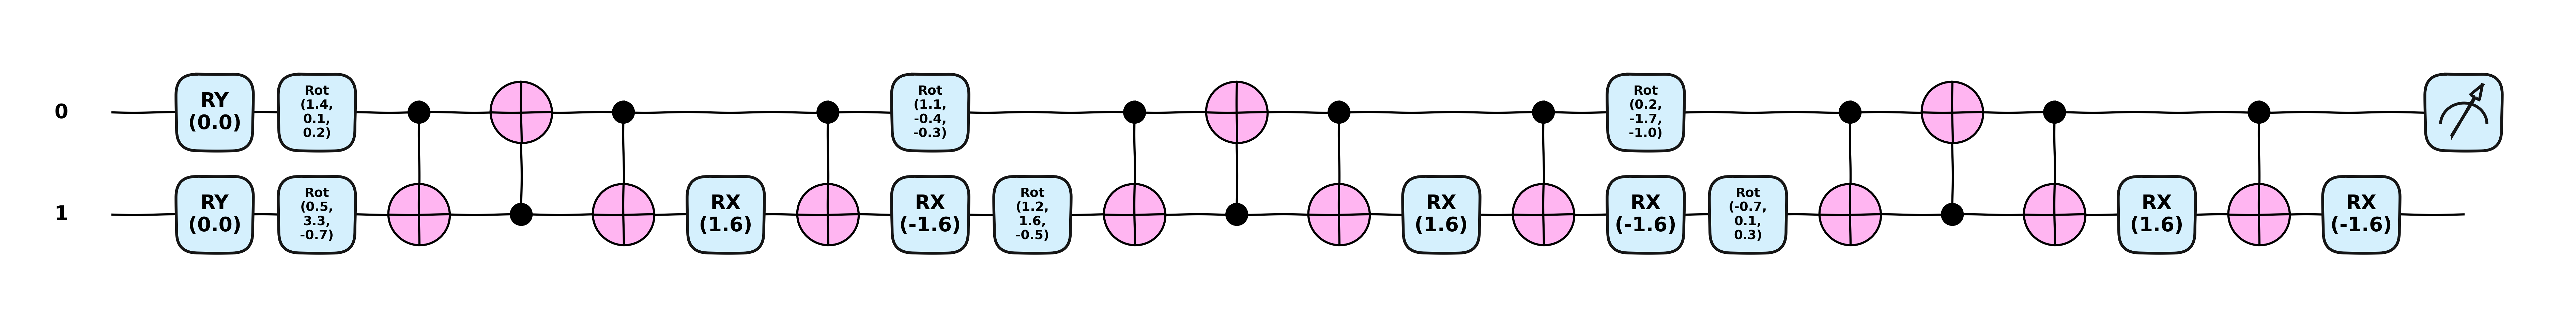


Running Heisenberg-Ising model with 3 qubits
Step 0, Loss: 0.1424, Accuracy: 0.0200
Step 10, Loss: 0.0206, Accuracy: 0.0100
Step 20, Loss: 0.0049, Accuracy: 0.0900
Step 30, Loss: 0.0017, Accuracy: 0.0300
Step 40, Loss: 0.0008, Accuracy: 0.1000
Step 50, Loss: 0.0005, Accuracy: 0.3200
Step 60, Loss: 0.0003, Accuracy: 0.3900
Step 70, Loss: 0.0001, Accuracy: 0.5400
Loss reached 0.0001 at step 73
Step 80, Loss: 0.0001, Accuracy: 0.7100
Step 90, Loss: 0.0000, Accuracy: 0.8000
Optimized parameters: [[ 0.69210359  0.47920498  1.21976783  1.08938142  0.04239147  0.10747866
   2.07036764  1.48557202  0.25586094]
 [ 0.16096721 -0.18786041  0.17365358 -0.12470252 -1.26754524 -1.42382663
  -1.15480817 -0.93774461  0.2168024 ]
 [-0.90802408 -3.24760189  1.80560714 -0.2257763  -0.37805216 -1.50489486
  -0.54438272  0.11092259 -1.15099358]]
Final loss: 0.0000
Huber Loss): 0.6242580562640639
Runtime: 0:16:47.358140


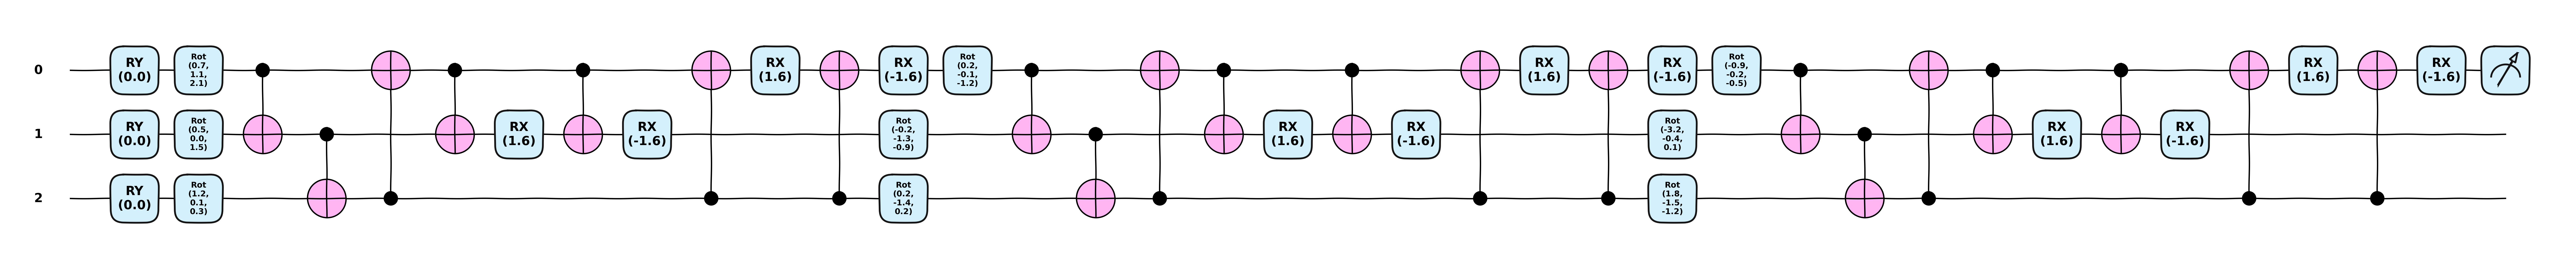


Running Heisenberg-Ising model with 4 qubits
Step 0, Loss: 0.1749, Accuracy: 0.0000
Step 10, Loss: 0.0325, Accuracy: 0.0200
Step 20, Loss: 0.0106, Accuracy: 0.0400
Step 30, Loss: 0.0074, Accuracy: 0.0300
Step 40, Loss: 0.0040, Accuracy: 0.0400
Step 50, Loss: 0.0017, Accuracy: 0.1100
Step 60, Loss: 0.0006, Accuracy: 0.4300
Step 70, Loss: 0.0002, Accuracy: 0.4500
Loss reached 0.0001 at step 77
Step 80, Loss: 0.0001, Accuracy: 0.6200
Step 90, Loss: 0.0000, Accuracy: 0.7200
Optimized parameters: [[ 1.19628416e+00 -6.19026621e-01  3.47689878e-01  1.12441061e+00
   2.69741110e-01 -1.33407297e+00  1.45760813e+00  3.00367329e+00
   2.60335539e-01  7.36419822e-03  5.71610059e-01  3.64704861e-01]
 [-3.22158700e-01 -2.00528027e+00 -1.14350149e+00 -1.59097955e+00
   3.71799831e-02 -5.16696402e-03 -1.55330427e+00 -7.50413698e-01
   1.77441914e+00  4.58814070e-01  9.28666509e-03  1.44080069e-02]
 [-5.44382724e-01  1.04884918e+00 -2.29330155e+00 -3.36922254e-01
  -6.00638690e-01 -1.35660399e-03 -6.2

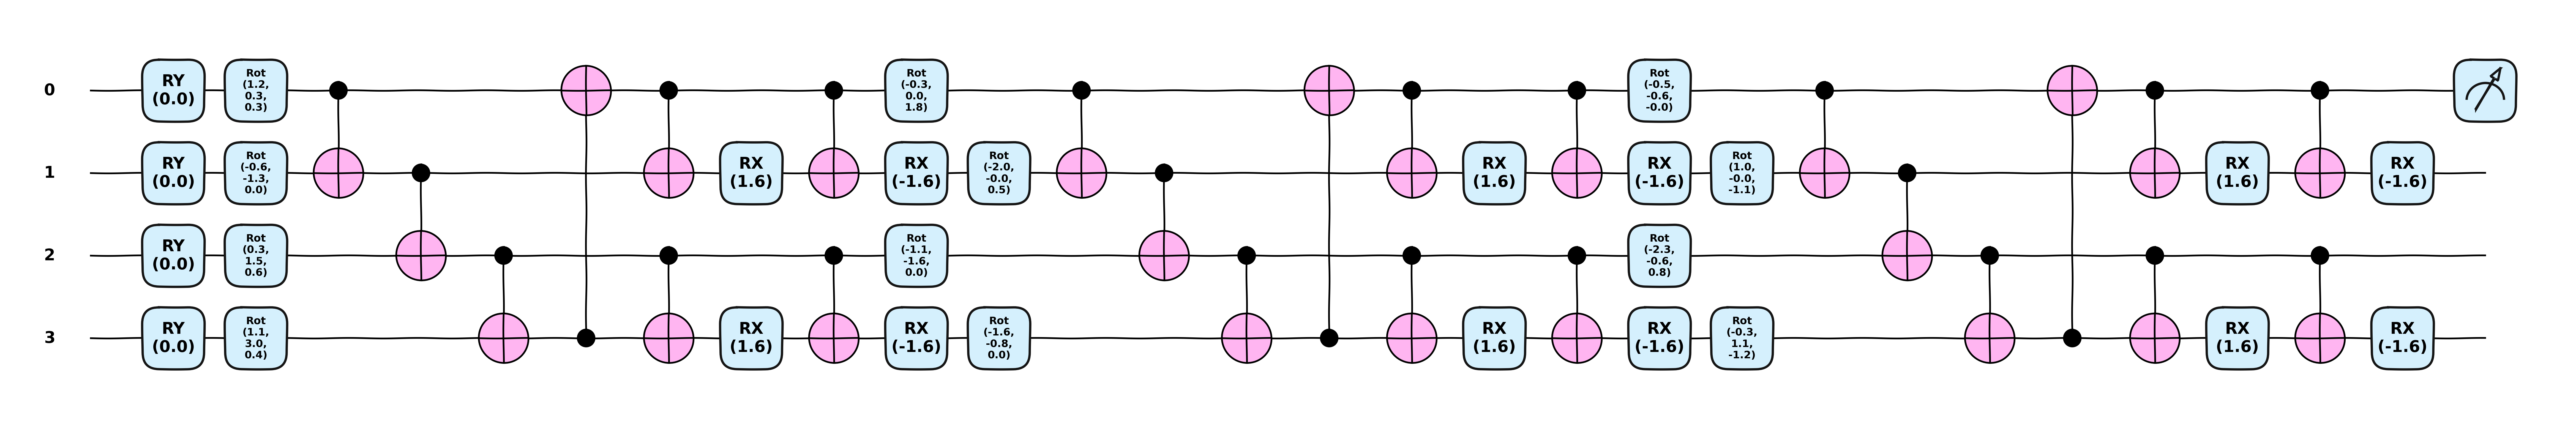


Running Heisenberg-Ising model with 5 qubits
Step 0, Loss: 0.1250, Accuracy: 0.0000
Step 10, Loss: 0.0103, Accuracy: 0.0400
Step 20, Loss: 0.0049, Accuracy: 0.0800
Step 30, Loss: 0.0009, Accuracy: 0.2000
Step 40, Loss: 0.0002, Accuracy: 0.4900
Step 50, Loss: 0.0001, Accuracy: 0.5200
Loss reached 0.0001 at step 51
Step 60, Loss: 0.0000, Accuracy: 0.7000
Step 70, Loss: 0.0000, Accuracy: 0.7700
Step 80, Loss: 0.0000, Accuracy: 0.8800
Step 90, Loss: 0.0000, Accuracy: 0.9100
Optimized parameters: [[ 0.42927254 -0.72646739  1.69391532  1.52597014 -0.86843651 -0.1897892
   3.10430285  0.20565111 -2.26926229  0.81989108 -0.35124567 -0.7515766
   0.48191308 -2.51638399 -2.29898845]
 [-0.015643   -0.05466087  1.018154    0.05935546 -1.56131004  1.58735531
   0.9790948  -0.08263335 -1.56435691 -1.15996479 -0.66586104 -0.06277646
   1.38988752 -1.95603197 -0.02067783]
 [-0.60170661  0.77595359  1.02433264 -0.25445111  1.88978332 -1.22084365
   0.05712362 -1.74621659 -1.56741243  0.04933647  0.738

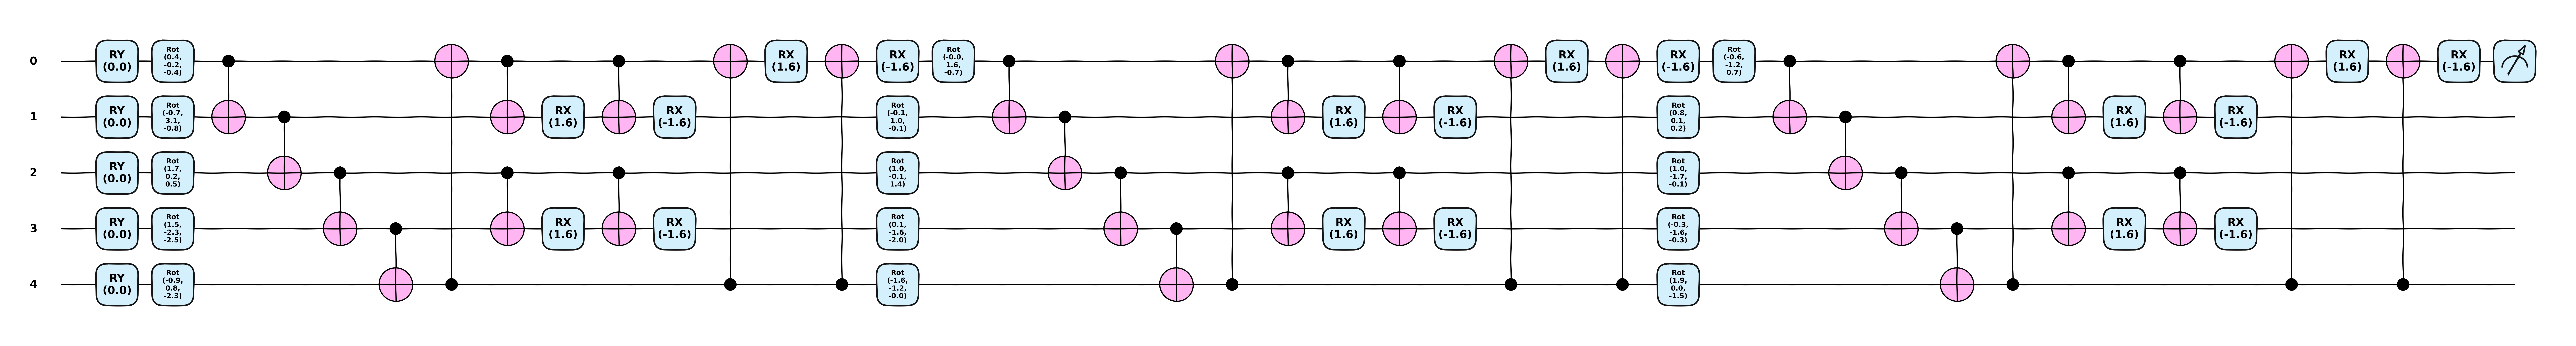

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import os

#ISING
start_time = time.time()

# Create a directory to save the .dat files if it doesn't exist
output_dir = "loss_data"
os.makedirs(output_dir, exist_ok=True)

# Define the number of qubits to run
qubit_counts = [2, 3, 4, 5]

# Define the target loss value
target_loss = 0.0001

# Define the Shift (LS) 2.0 | Tolerance=0.01**
lsvec=[2]
for ls in lsvec:

# Define accuracy function
    def accuracy(labels, predictions, tolerance=0.01):
        correct_predictions = np.abs(labels - predictions) < tolerance
        return np.mean(correct_predictions)
    
    for num_qubits in qubit_counts:
        print(f"\nRunning Ising model with {num_qubits} qubits")
    
        # Define the device
        dev = qml.device("default.qubit", wires=num_qubits)
    
        # Number of discretization points, training data
        N = 100
        x_values = np.linspace(0, 2 * np.pi, N)
        y_values = np.sin(x_values)
    
        # Quantum circuit for encoding and processing
        @qml.qnode(dev)
        def quantum_circuit(params, x):
            # Encode the classical input x into the quantum state
            for i in range(num_qubits):
                qml.RY(x, wires=i)
            
            # Apply the variational layers
            for layer in params:
                for i in range(num_qubits):
                    qml.RX(layer[i], wires=i)
                    qml.RZ(layer[i + num_qubits], wires=i)
                for i in range(num_qubits):
                    qml.CZ(wires=[i, (i + 1) % num_qubits])
            
            # Measure the expectation value of the Pauli-Z operator
            return qml.expval(qml.PauliZ(0))
    
        # Cost function: Mean Squared Error between predicted and target values 
        def cost(params, delta=1):
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            residual = np.abs(predictions - y_values)
            return np.mean(np.where(residual <= delta, 0.5 * residual**2, delta * (residual - 0.5 * delta)))
    
        # Initialize random parameters
        np.random.seed(42)
        num_layers = 3
        init_params = np.random.randn(num_layers, 2 * num_qubits, requires_grad=True)
    
        # Optimization
        opt = qml.AdamOptimizer(0.1)
        steps = 100
        params = init_params
    
        # To store the loss and accuracy at each step
        losses = []
        accuracies = []
        loss_reached = False
    
        for i in range(steps):
            params = opt.step(cost, params)
            loss = cost(params)
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            acc = accuracy(y_values, predictions)
            losses.append(loss)
            accuracies.append(acc)
            if i % 10 == 0:
                print(f"Step {i}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
            if loss <= target_loss and not loss_reached:
                print(f"Loss reached {target_loss} at step {i}")
                loss_reached = True
    
        # Save the steps vs. loss and accuracy values to a .dat file
        filename = os.path.join(output_dir, f"Ising_loss_2_vs_steps_{num_qubits}_qubits_ls={ls}.dat")
        I = np.column_stack((range(len(losses)), losses, accuracies))

        np.savetxt(filename, I, header="Step Loss Accuracy", fmt="%d %0.6f %0.6f")
        globals()[f"I_H_{num_qubits}"] = I
    
        # Print the final parameters and loss
        print(f"Optimized parameters: {params}")
        final_loss = cost(params)
        print(f"Final loss: {final_loss:.4f}")
    
        # Test the model on new data
        test_x_values = np.linspace(0, 2 * np.pi + ls, N) 
        test_predictions = np.array([quantum_circuit(params, x) for x in test_x_values])
    
        
    
        # Evaluating model performance using regression metrics: Mean Absolute Error
        mae = np.mean(np.abs(test_predictions - y_values))
        print(f"Huber Loss: {mae}")
    
        # Runtime
        runtime = time.time() - start_time
        print("Runtime:", timedelta(seconds=runtime))
    
        # Visualize the circuit
        plt.style.use('pennylane.drawer.plot')
        qnode = qml.QNode(quantum_circuit, dev)
        qml.draw_mpl(qnode, decimals=1, style="pennylane_sketch")(params, x_values[0])
        plt.show()

#HYBRID
start_time = time.time()

# Create a directory to save the .dat files if it doesn't exist
output_dir = "loss_data"
os.makedirs(output_dir, exist_ok=True)

# Define the number of qubits to run
qubit_counts = [2,3,4,5]

# Define the target loss value
target_loss = 0.0001

# Define the Shift (LS) 2.0 | Tolerance=0.01**
ls_vec= [2]
for ls in ls_vec:
# Define an accuracy function
    def accuracy(labels, predictions, tolerance=0.01):
        correct_predictions = np.abs(labels - predictions) < tolerance
        return np.mean(correct_predictions)
    
    for num_qubits in qubit_counts:
        print(f"\nRunning Heisenberg-Ising model with {num_qubits} qubits")
    
        # Define the device
        dev = qml.device("default.qubit", wires=num_qubits)
    
        # Number of discretization points, training data
        N = 100
        x_values = np.linspace(0, 2 * np.pi, N)
        y_values = np.sin(x_values)
    
        # Quantum circuit for encoding and processing
        @qml.qnode(dev)
        def quantum_circuit(params, x):
            # Encode the classical input x into the quantum state
            for i in range(num_qubits):
                qml.RY(x, wires=i)
            
            # Apply the variational layers
            for layer in params:
                for i in range(num_qubits):
                    qml.Rot(layer[i], layer[i + num_qubits], layer[i + 2 * num_qubits], wires=i)
                
                # Apply CX chain for entanglement
                for i in range(num_qubits - 1):
                    qml.CNOT(wires=[i, i + 1])
                qml.CNOT(wires=[num_qubits - 1, 0])
            
                # Apply additional Heisenberg XXX interaction between alternate qubits
                for i in range(0, num_qubits, 2):
                    qml.CNOT(wires=[i, (i + 1) % num_qubits])
                    qml.RX(np.pi/2, wires=(i + 1) % num_qubits)
                    qml.CNOT(wires=[i, (i + 1) % num_qubits])
                    qml.RX(-np.pi/2, wires=(i + 1) % num_qubits)
            
            # Measure the expectation value of the Pauli-Z operator
            return qml.expval(qml.PauliZ(0))
    
        # Cost function: Mean Squared Error between predicted and target values 
        def cost(params, delta=1):
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            residual = np.abs(predictions - y_values)
            return np.mean(np.where(residual <= delta, 0.5 * residual**2, delta * (residual - 0.5 * delta)))
    
        # Initialize random parameters
        np.random.seed(42)
        num_layers = 3
        init_params = np.random.randn(num_layers, 3 * num_qubits, requires_grad=True)
    
        # Optimization
        opt = qml.AdamOptimizer(0.1)
        steps = 100
        params = init_params
    
        # To store the loss and accuracy at each step
        losses = []
        accuracies = []
        loss_reached = False
    
        for i in range(steps):
            params = opt.step(cost, params)
            loss = cost(params)
            predictions = np.array([quantum_circuit(params, x) for x in x_values])
            acc = accuracy(y_values, predictions)
            losses.append(loss)
            accuracies.append(acc)
            if i % 10 == 0:
                print(f"Step {i}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")
            if loss <= target_loss and not loss_reached:
                print(f"Loss reached {target_loss} at step {i}")
                loss_reached = True
    
        # Save the steps vs. loss values to a .dat file
        filename = os.path.join(output_dir, f"hybrid_loss_2_vs_steps_{num_qubits}_qubits_ls={ls}.dat")
        H = np.column_stack((range(len(losses)), losses, accuracies))

        np.savetxt(filename, H, header="Step Loss Accuracy", fmt="%d %0.6f %0.6f")
        globals()[f"H_H_{num_qubits}"] = H
    
        # Print the final parameters and loss
        print(f"Optimized parameters: {params}")
        final_loss = cost(params)
        print(f"Final loss: {final_loss:.4f}")
    
        # Test the model on new data
        test_x_values = np.linspace(0, 2 * np.pi + ls, N) 
        test_predictions = np.array([quantum_circuit(params, x) for x in test_x_values])
       
    
        # Evaluating model performance using regression metrics: Mean Absolute Error
        mae = np.mean(np.abs(test_predictions - y_values))
        print(f"Huber Loss): {mae}")
    
        # Runtime
        runtime = time.time() - start_time
        print("Runtime:", timedelta(seconds=runtime))
    
        # Visualize the circuit
        plt.style.use('pennylane.drawer.plot')
        qnode = qml.QNode(quantum_circuit, dev)
        qml.draw_mpl(qnode, decimals=1, style="pennylane_sketch")(params, x_values[0])
        plt.show()



Finally we plot the loss and accuracy of the implementation:

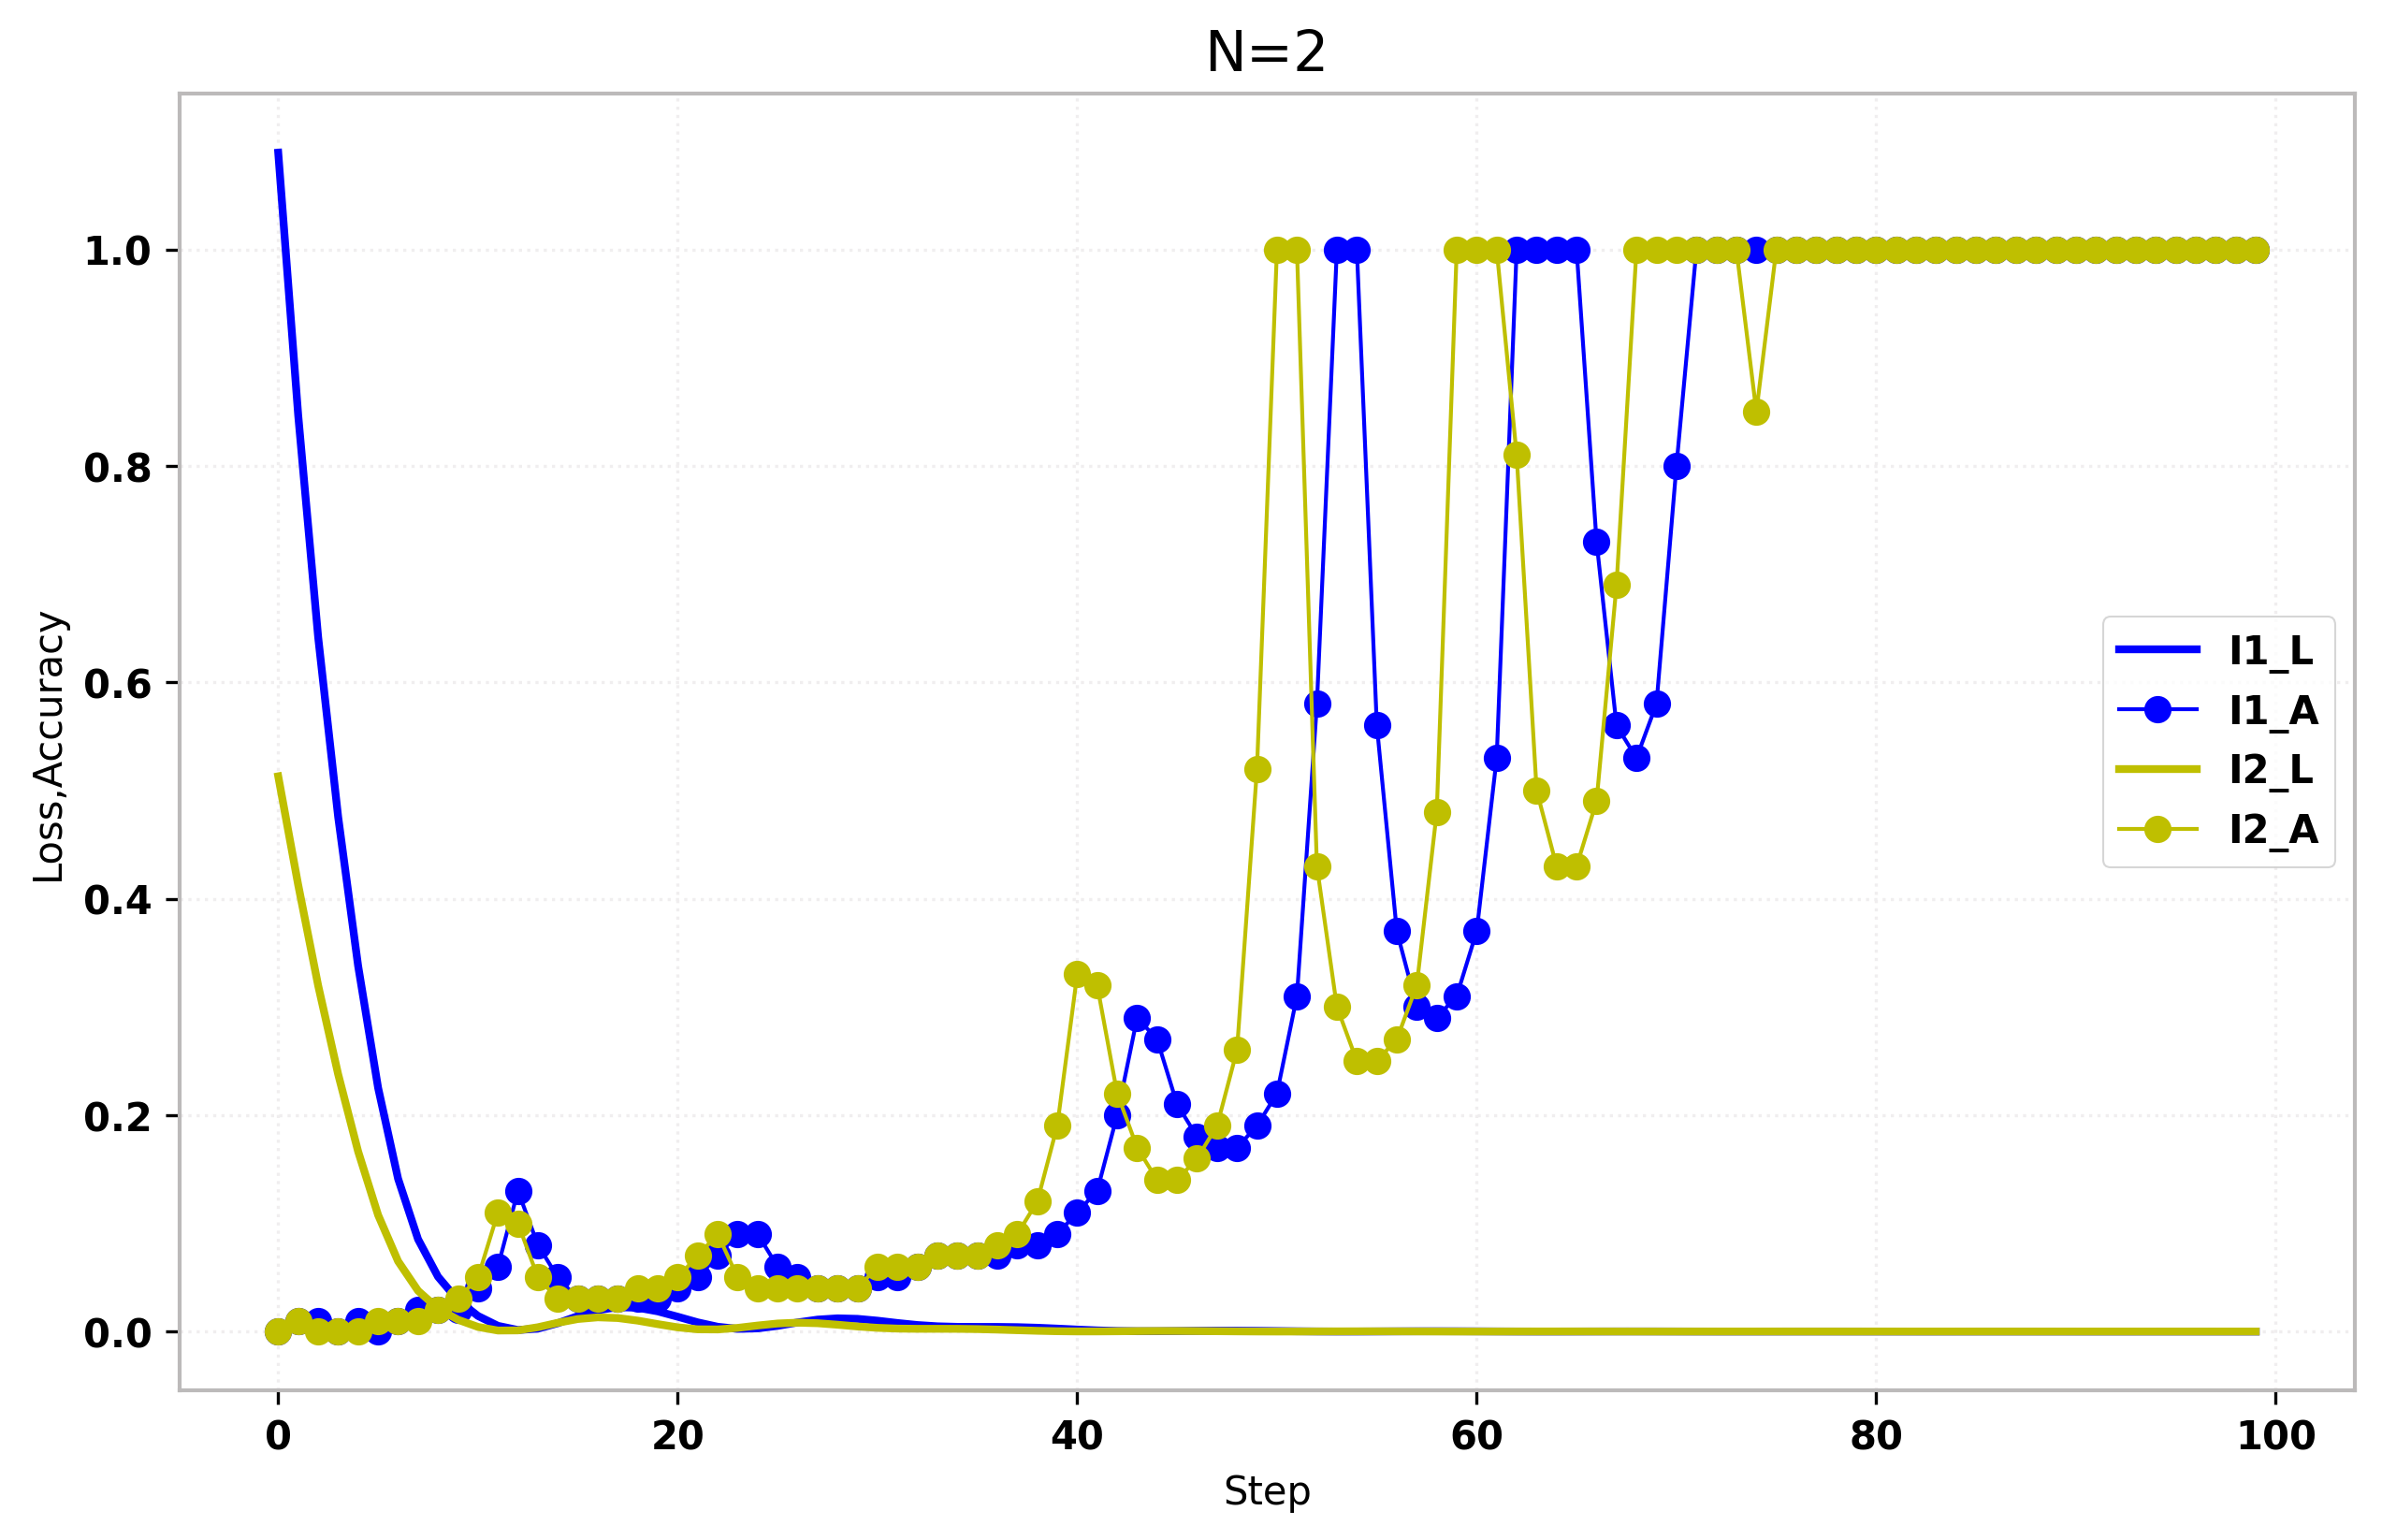

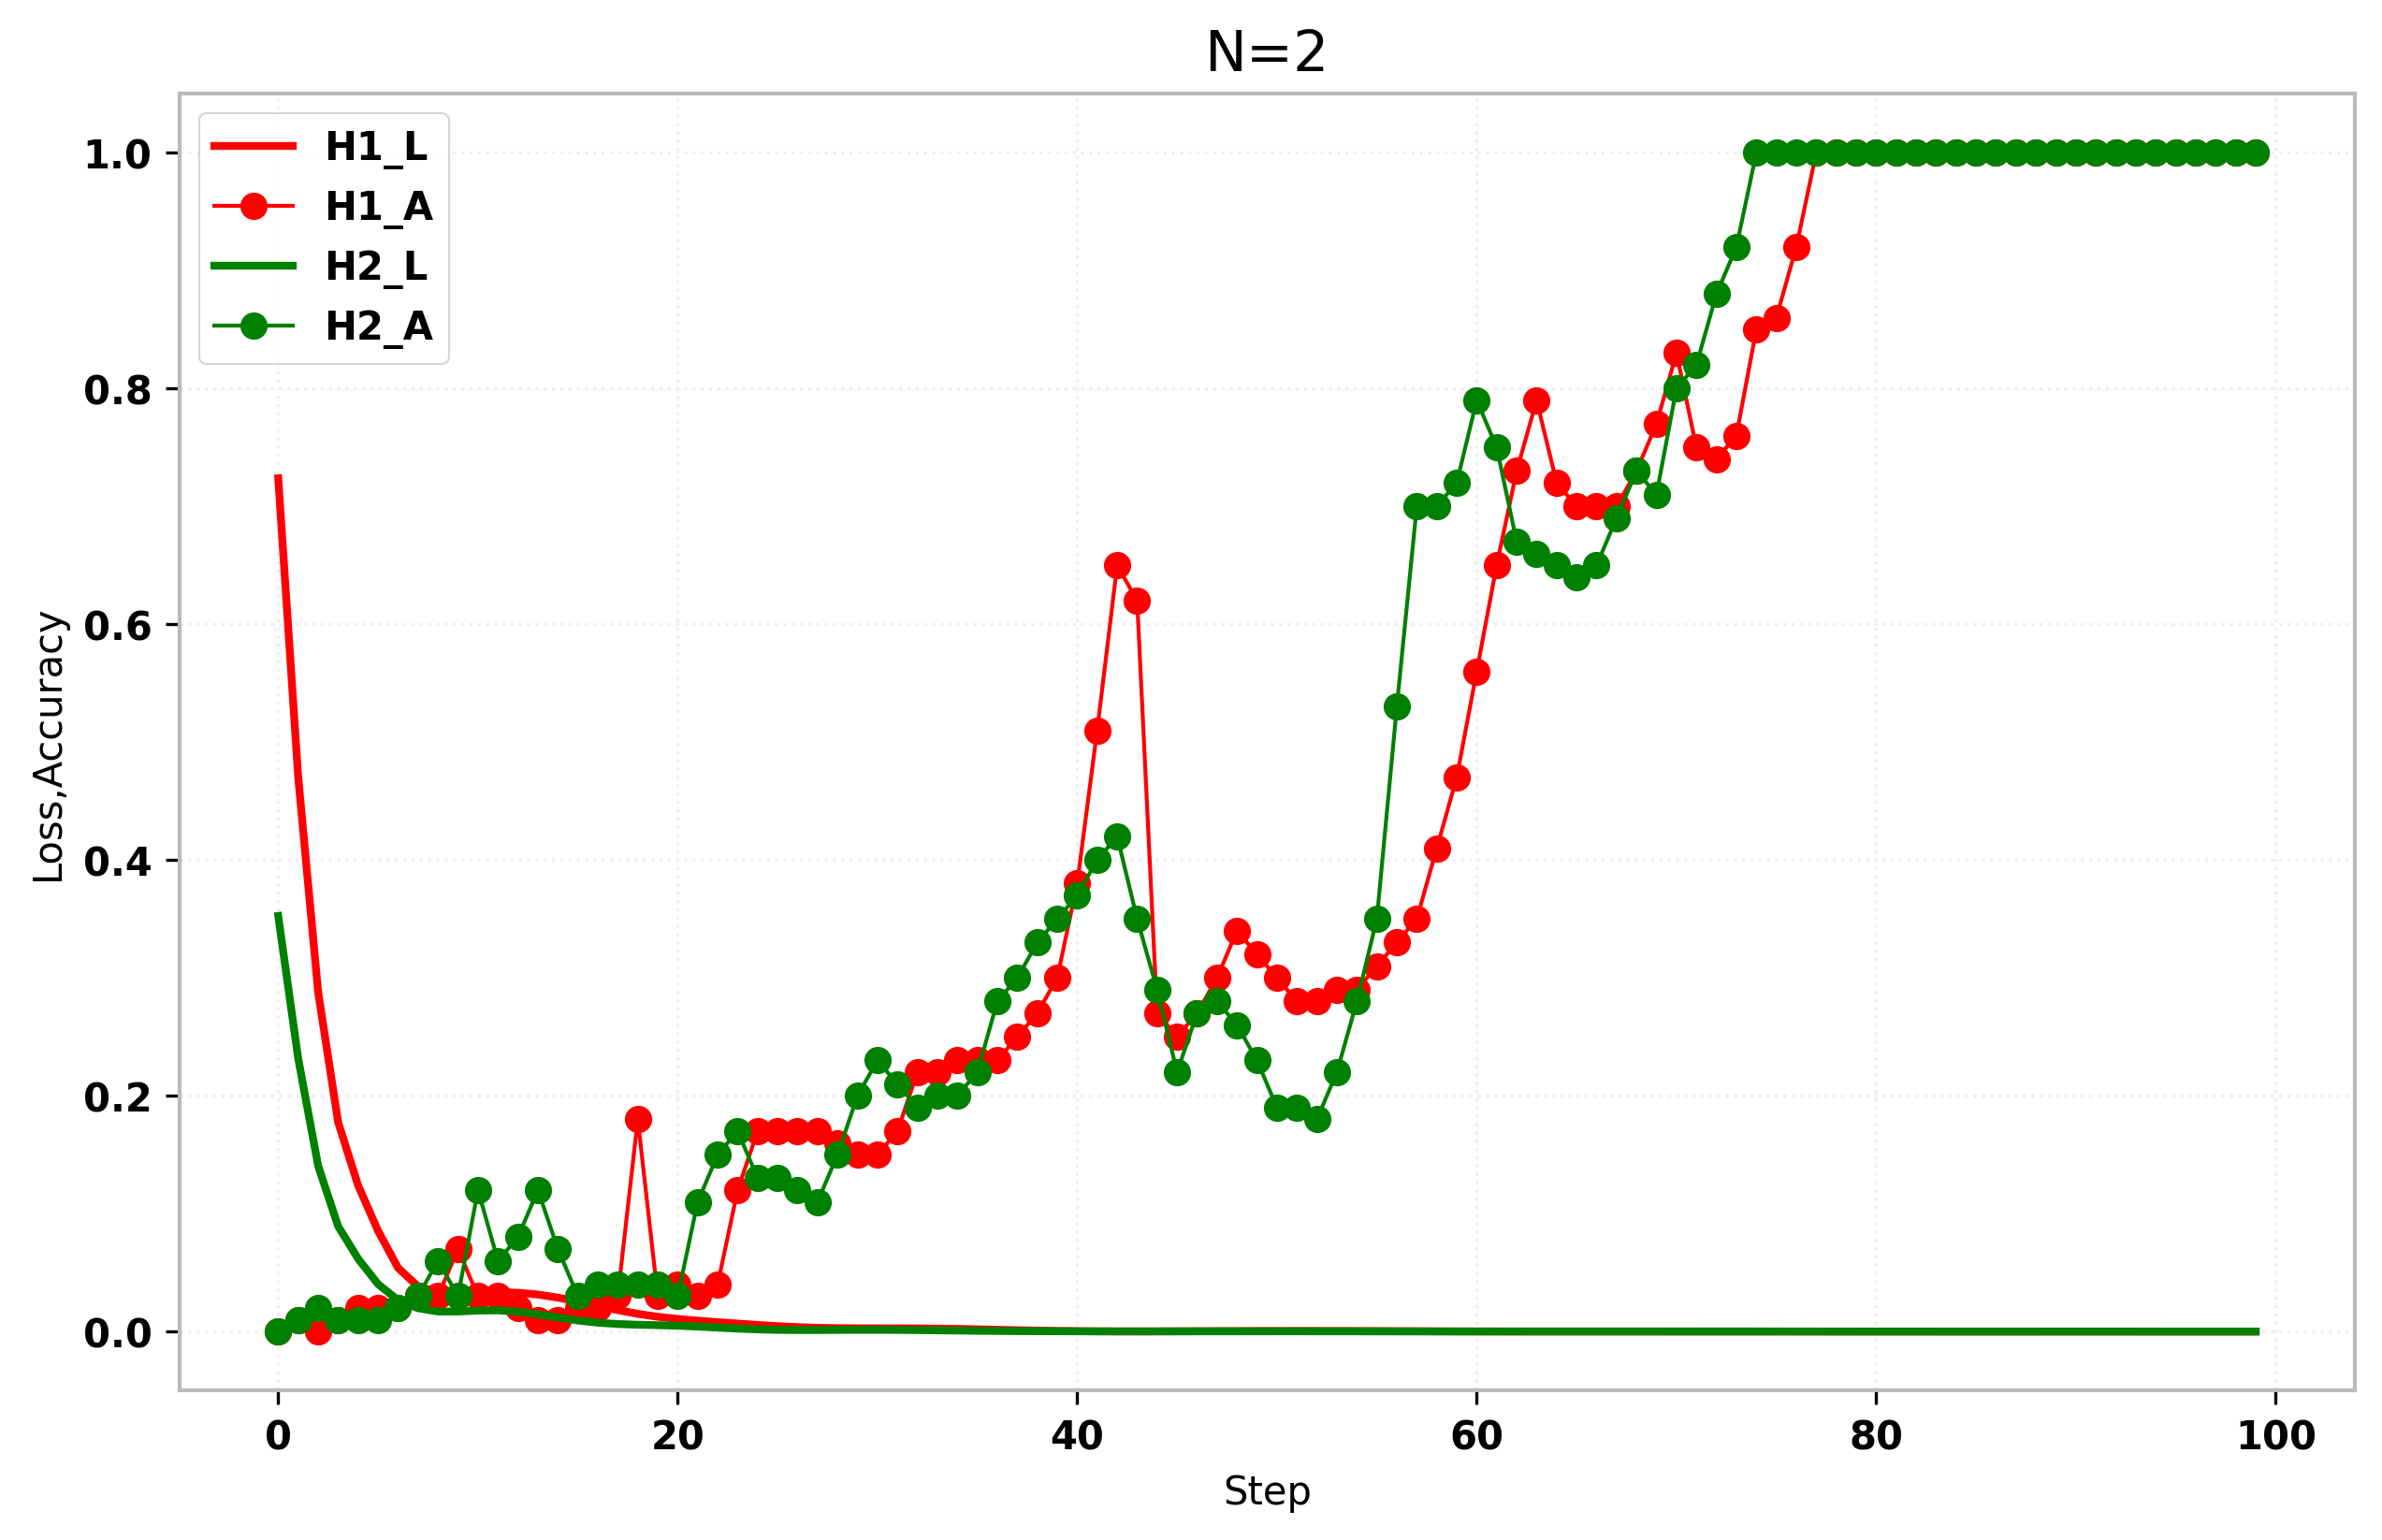

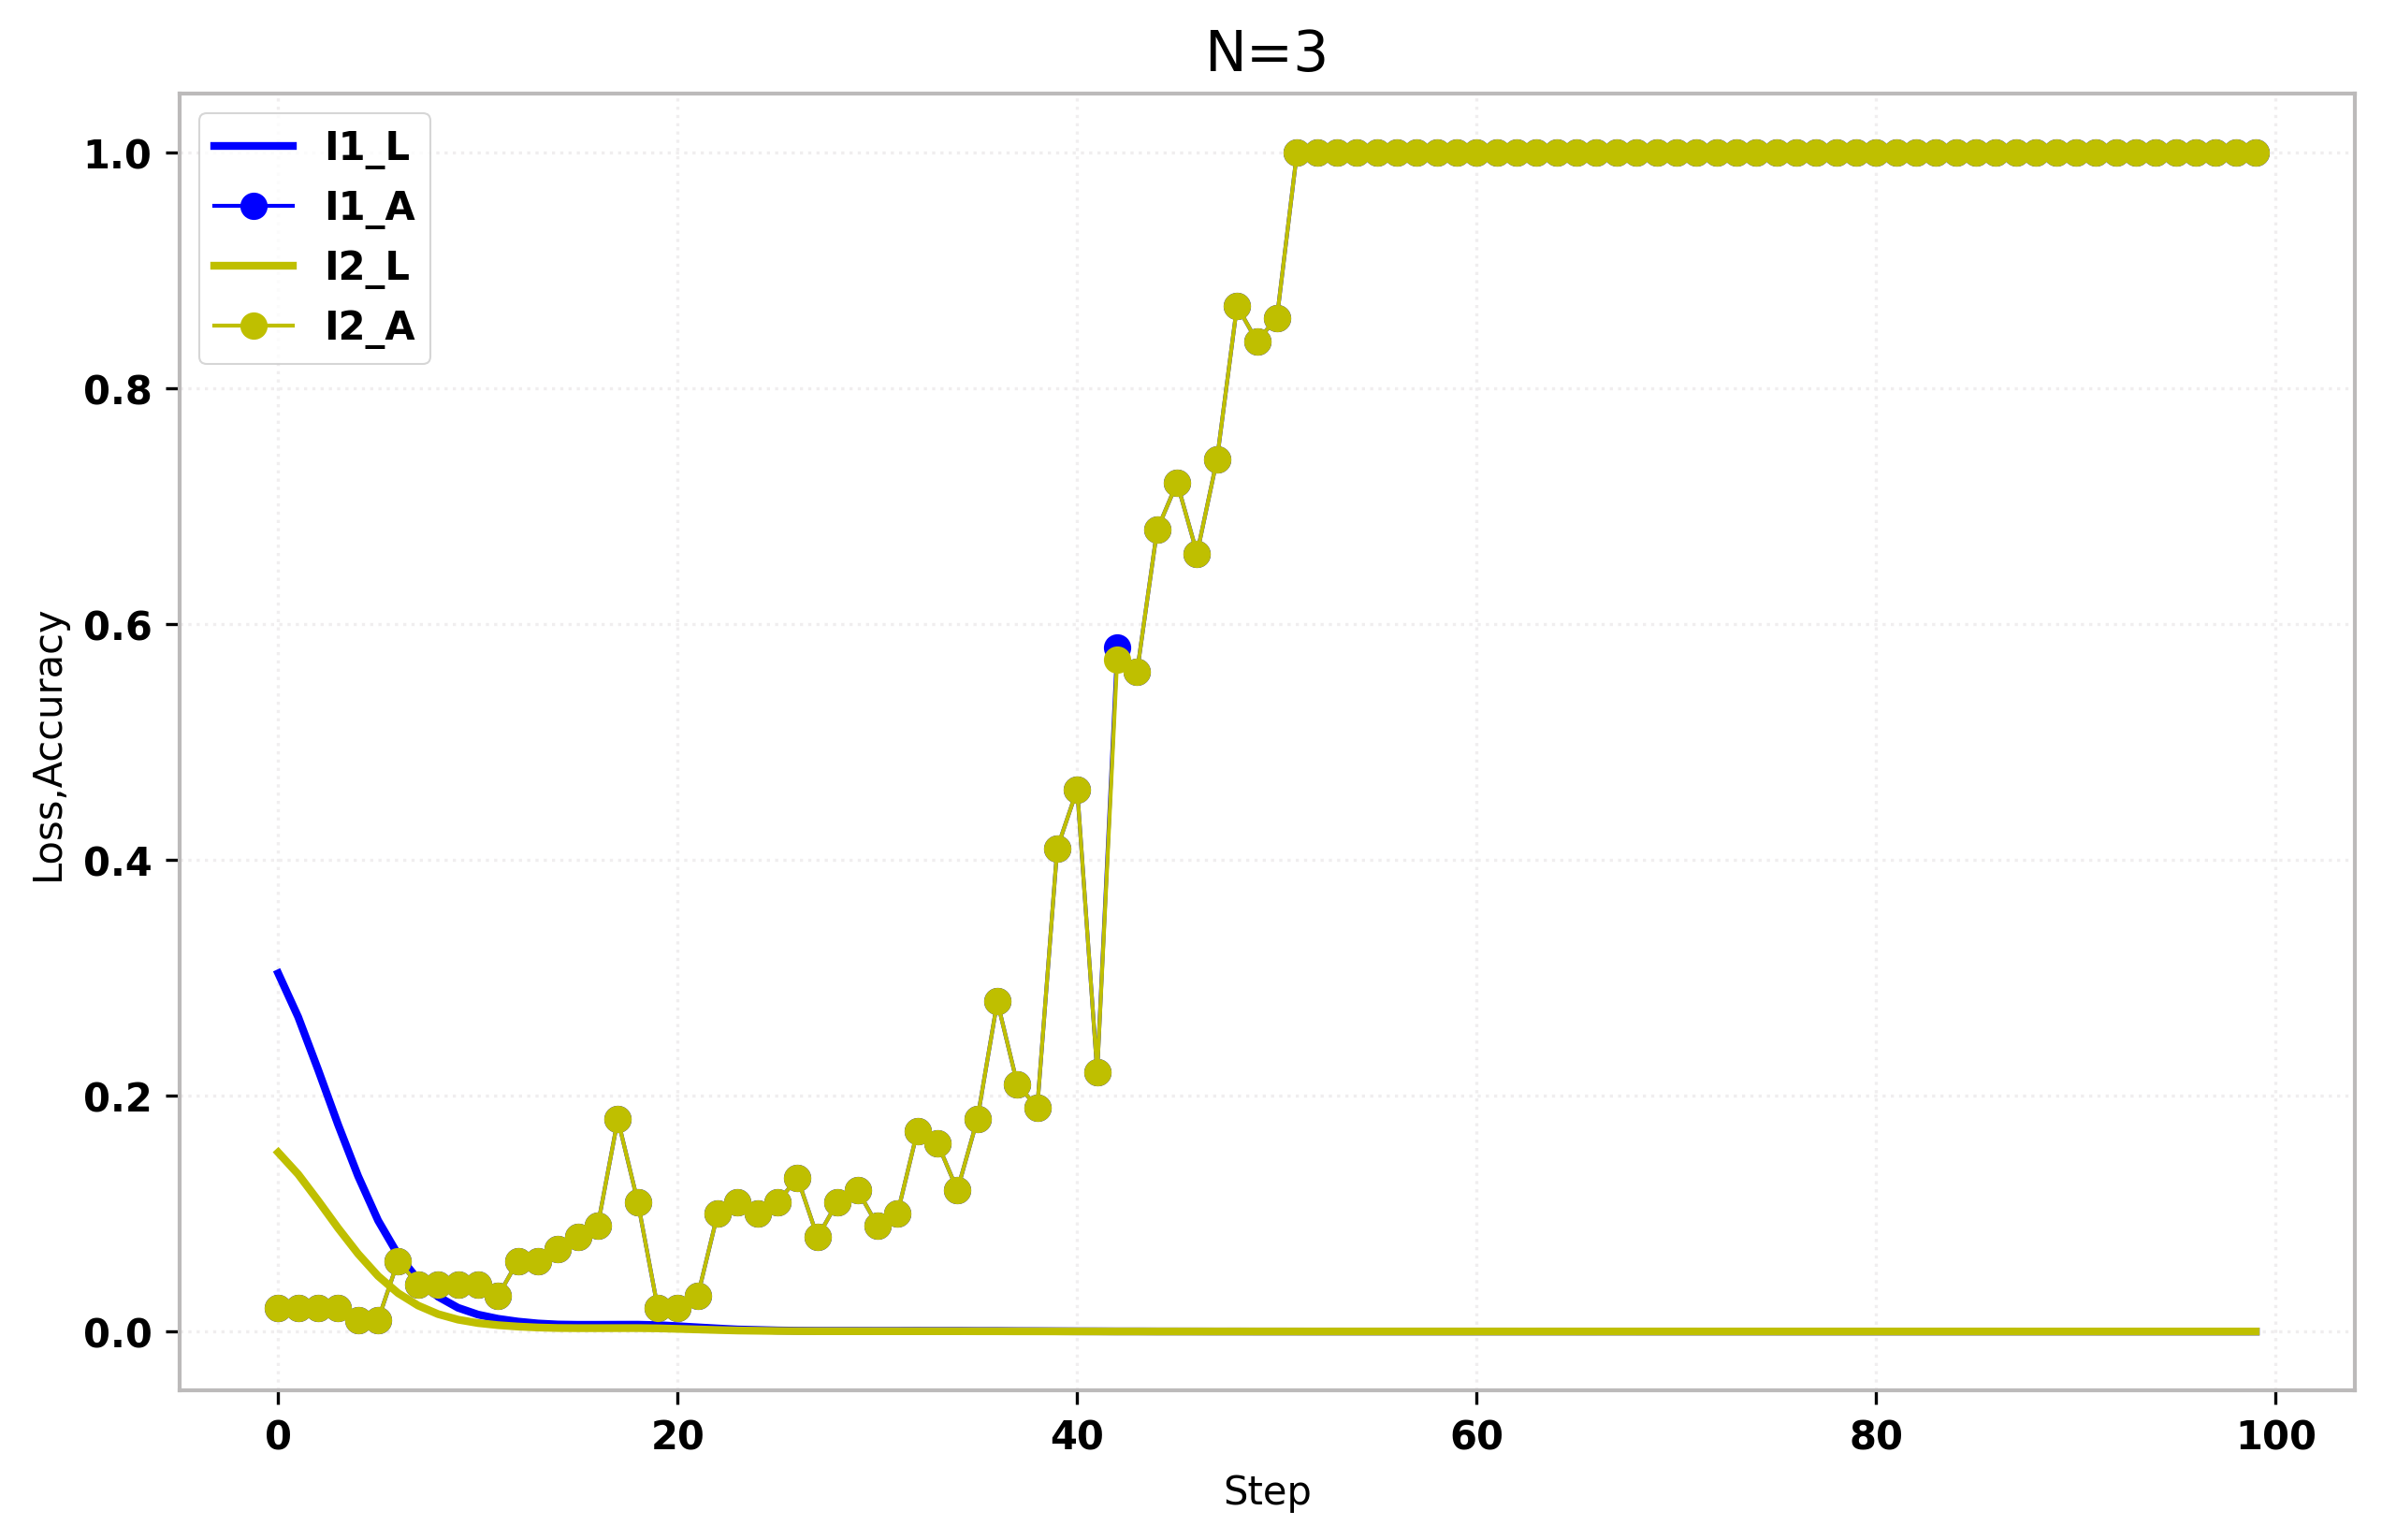

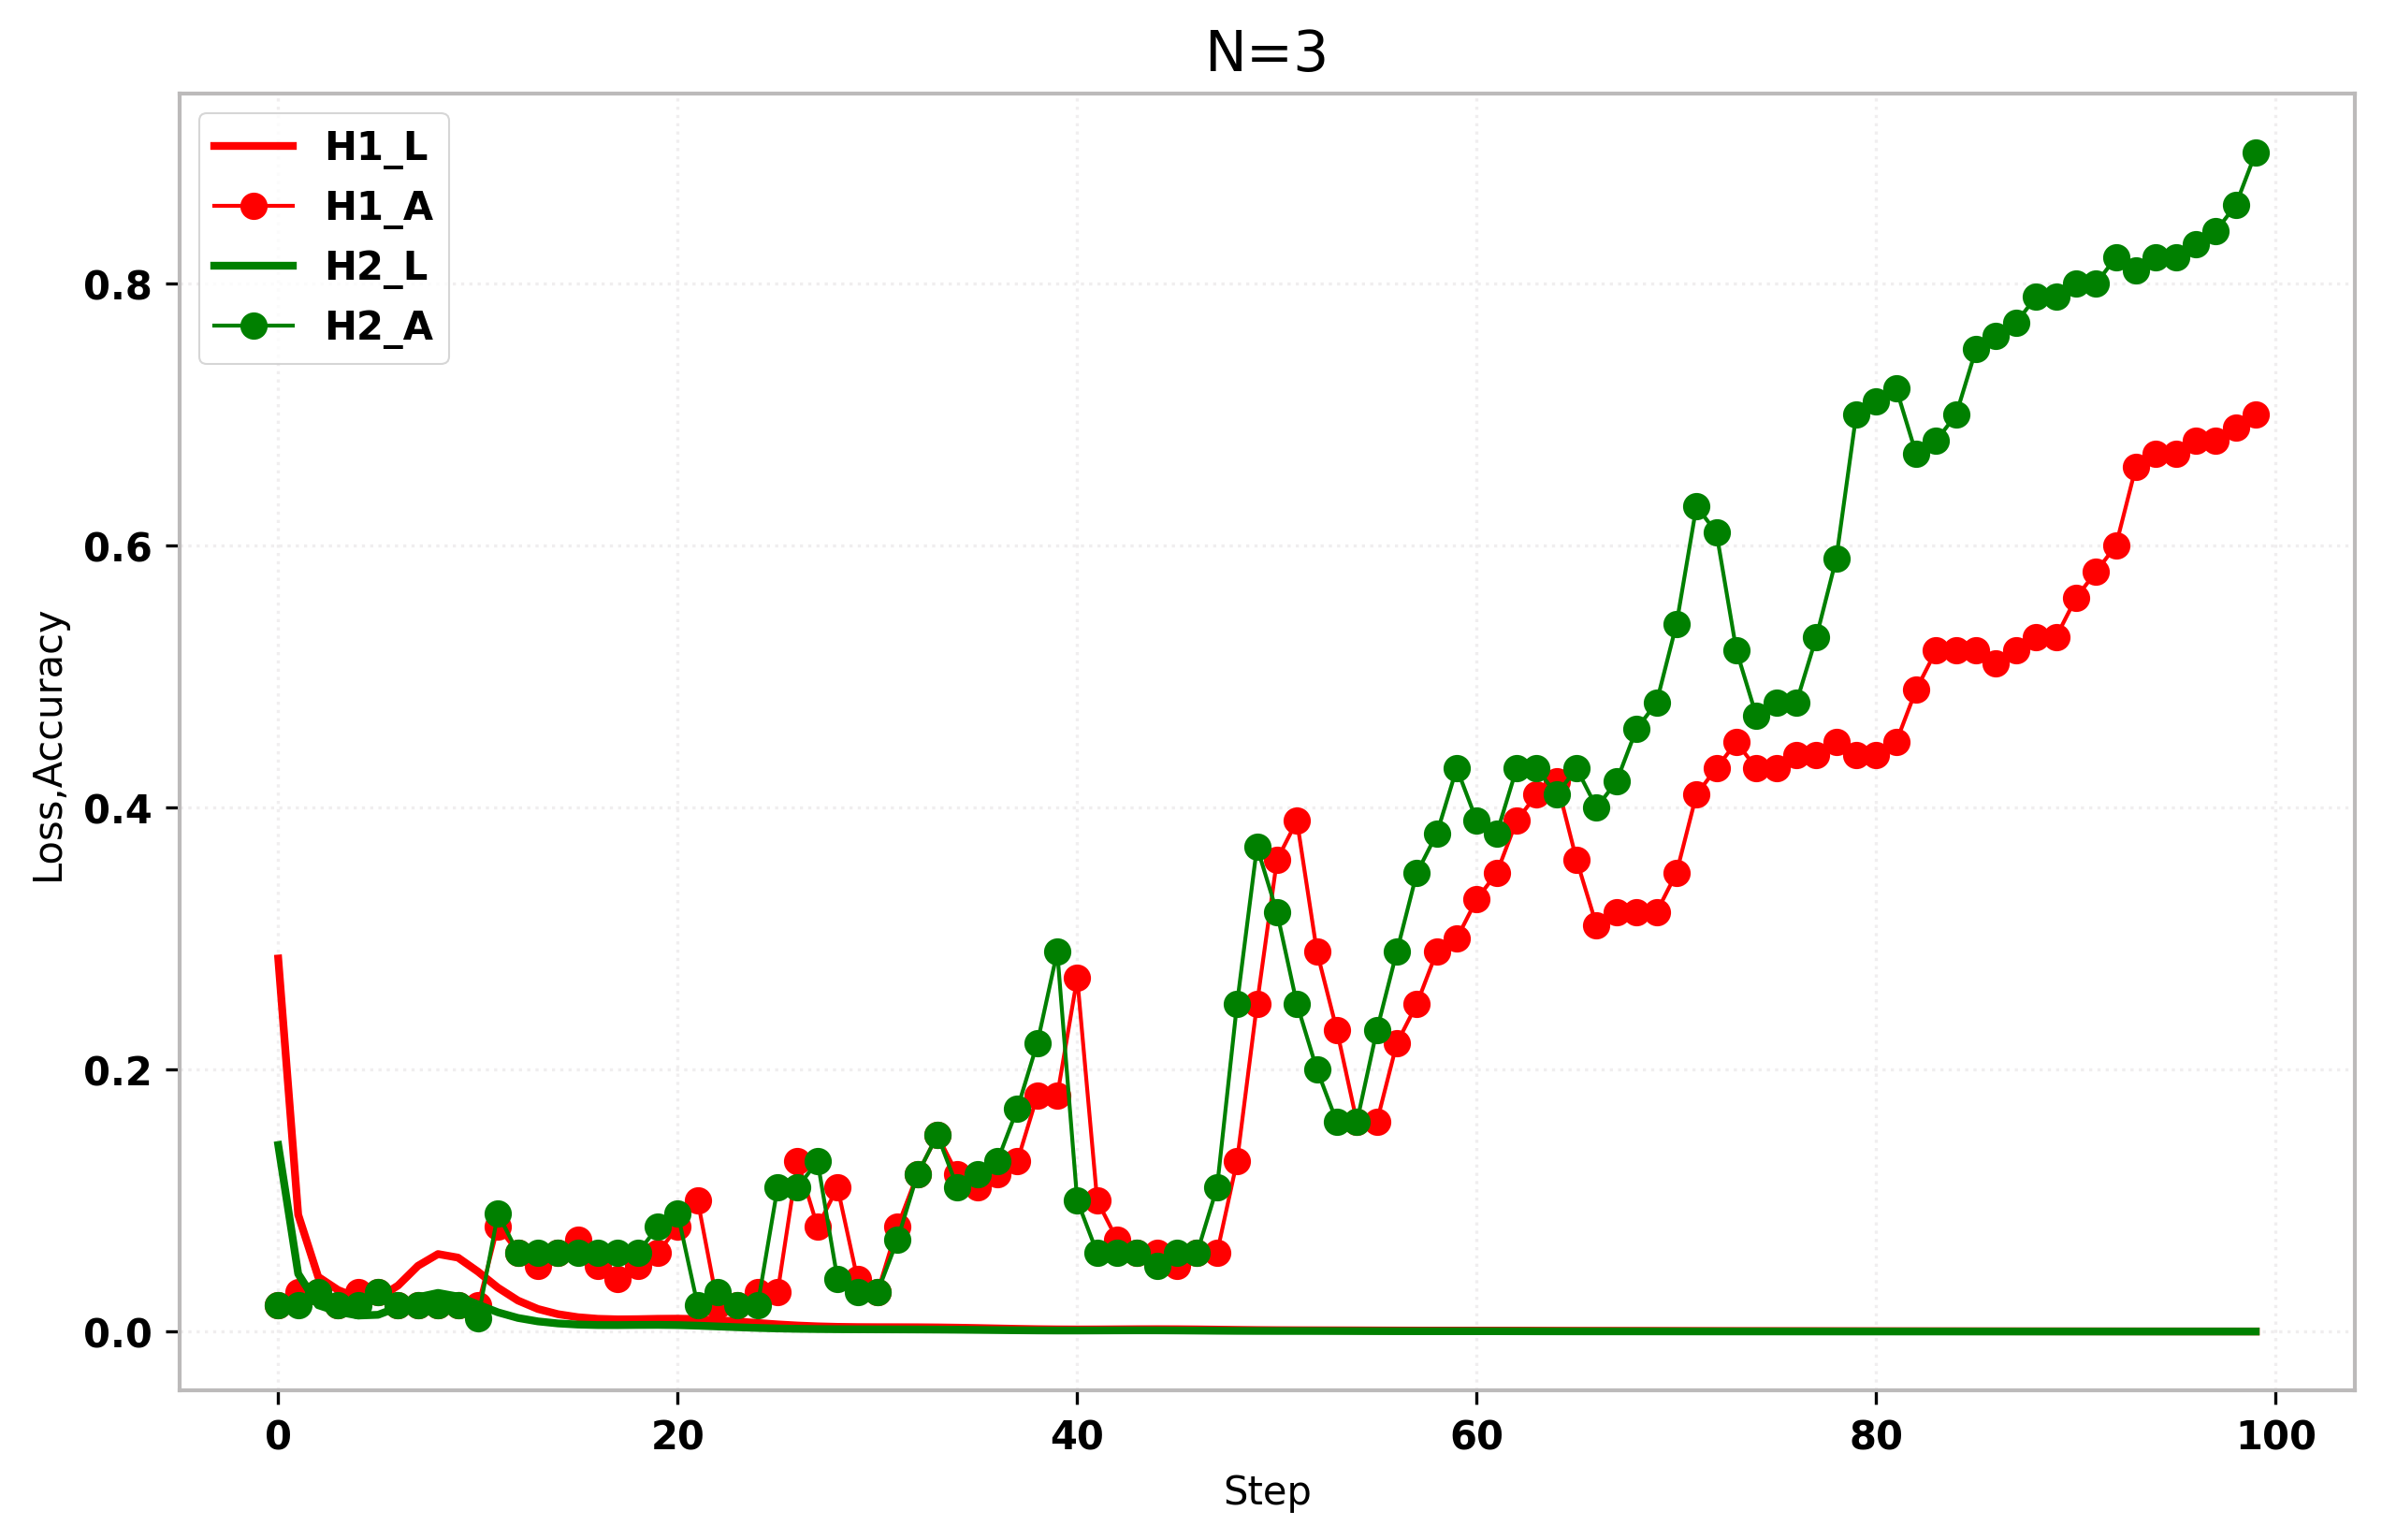

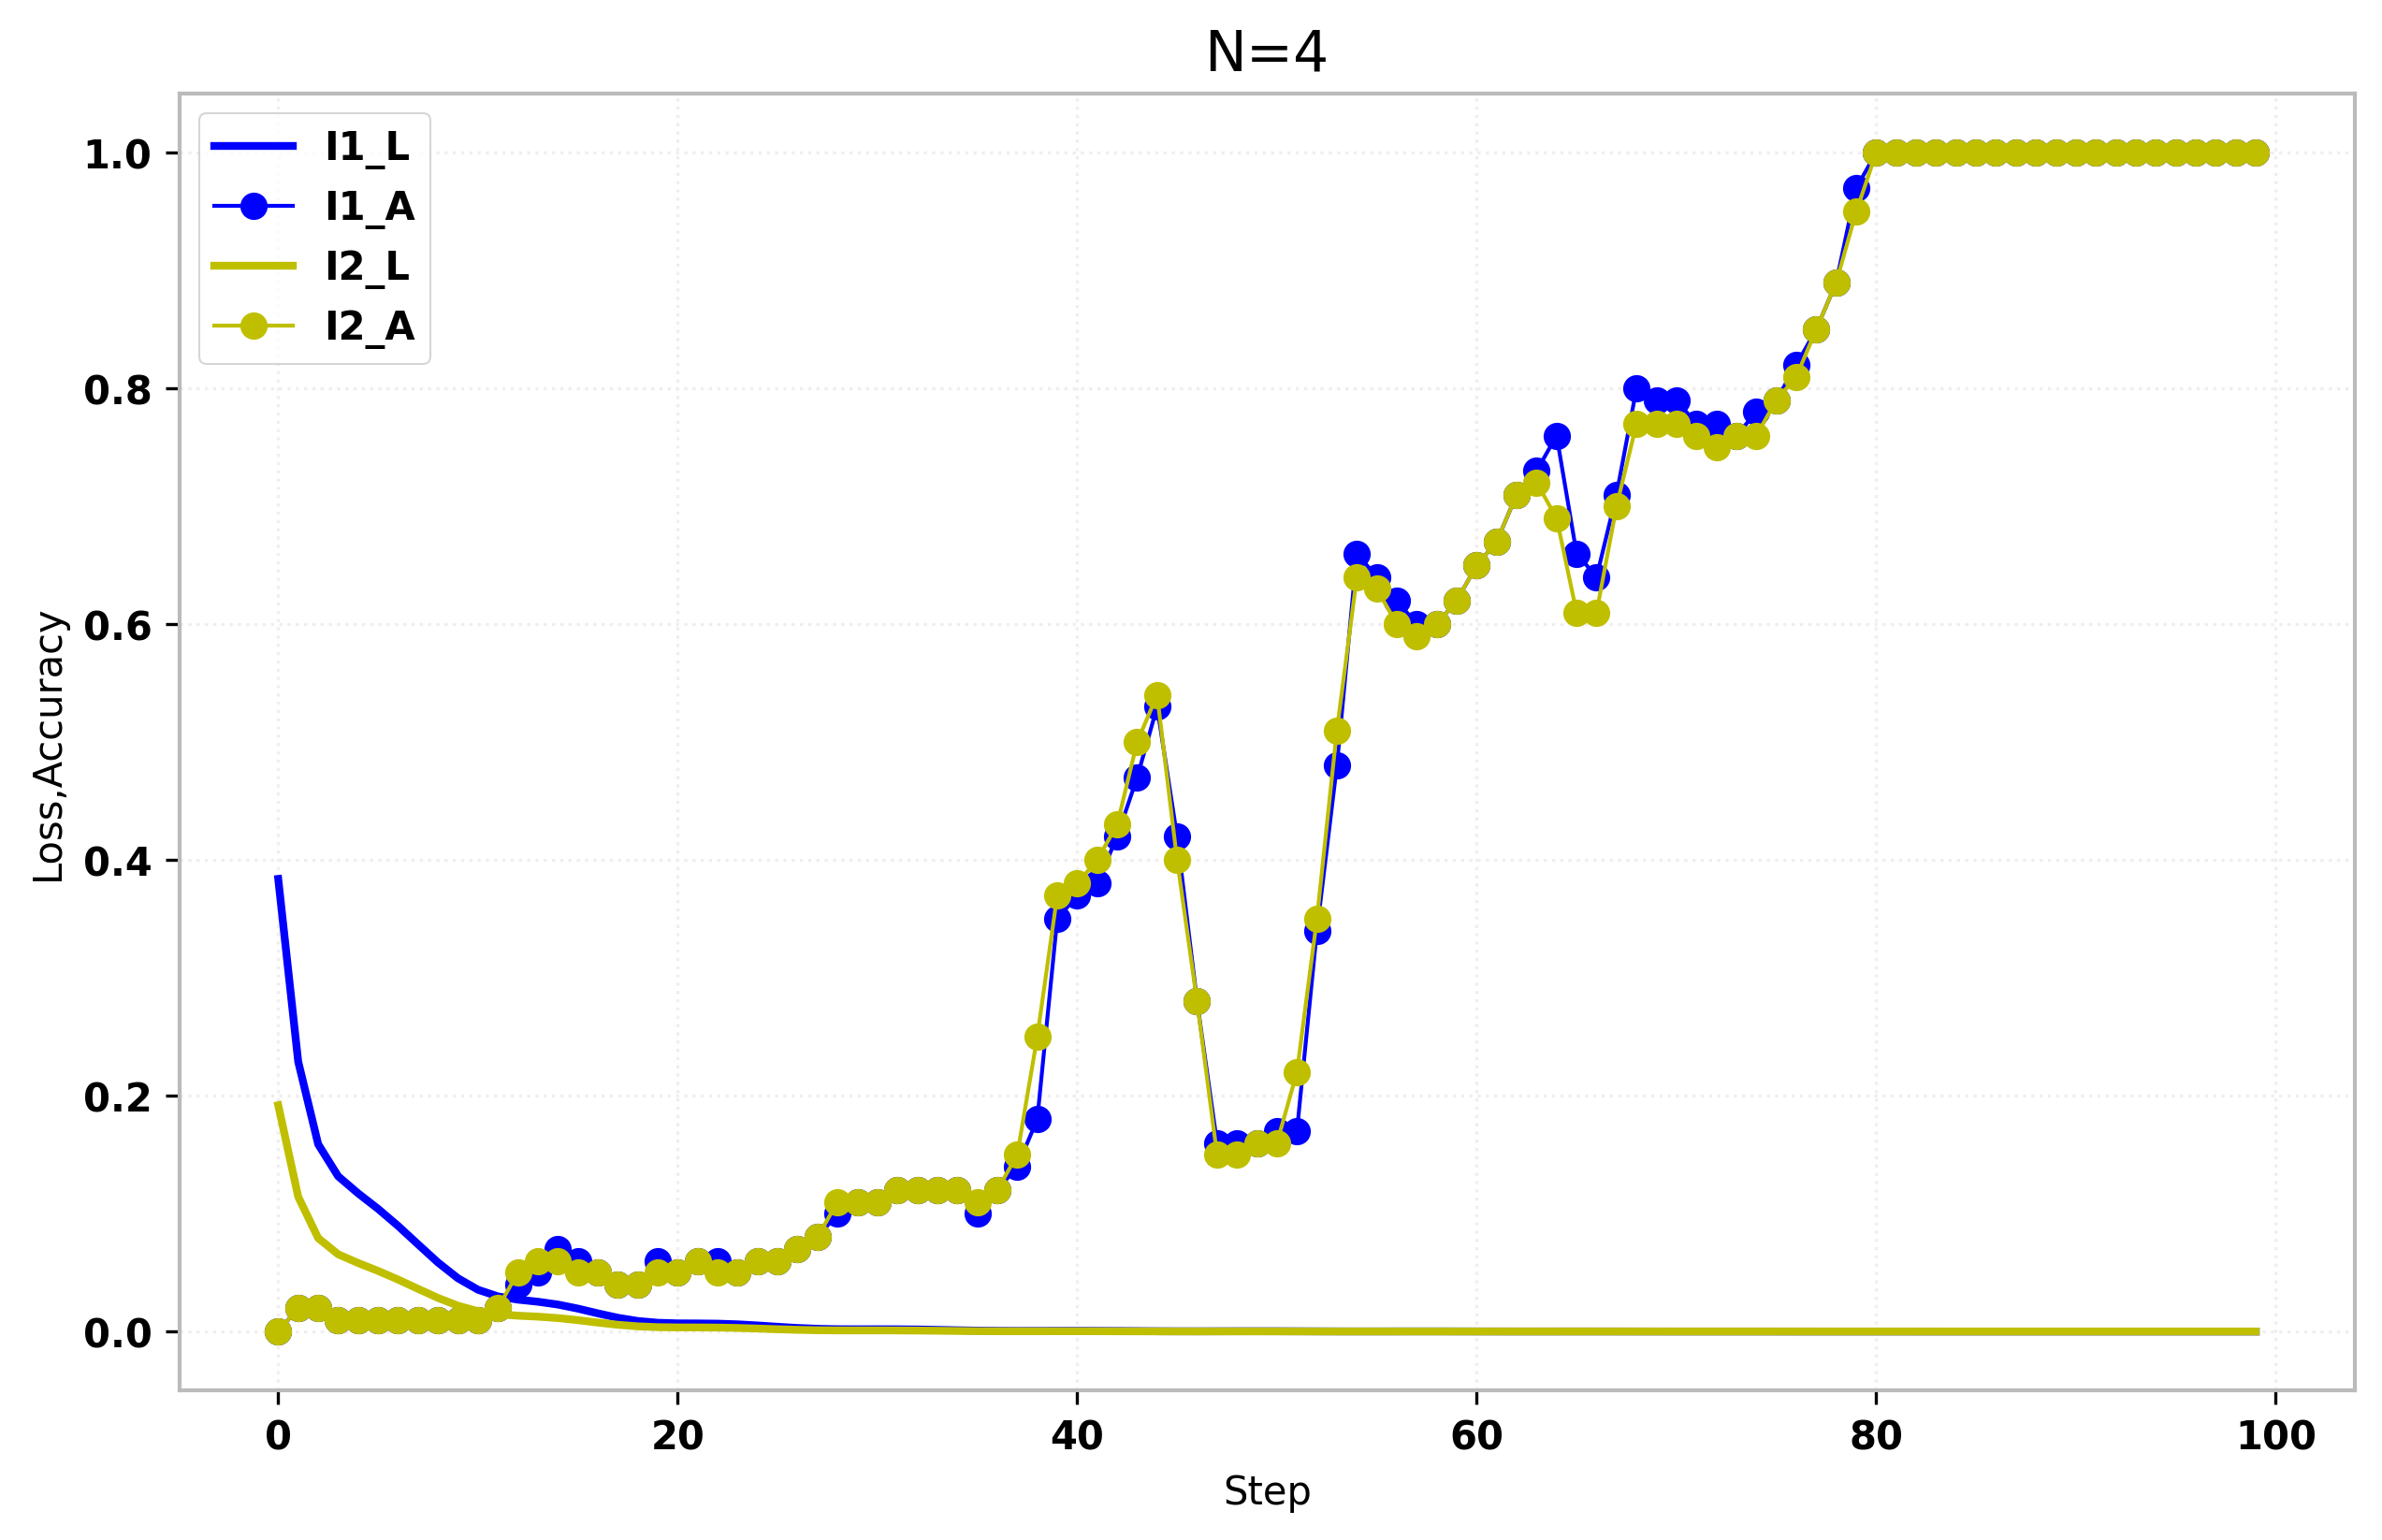

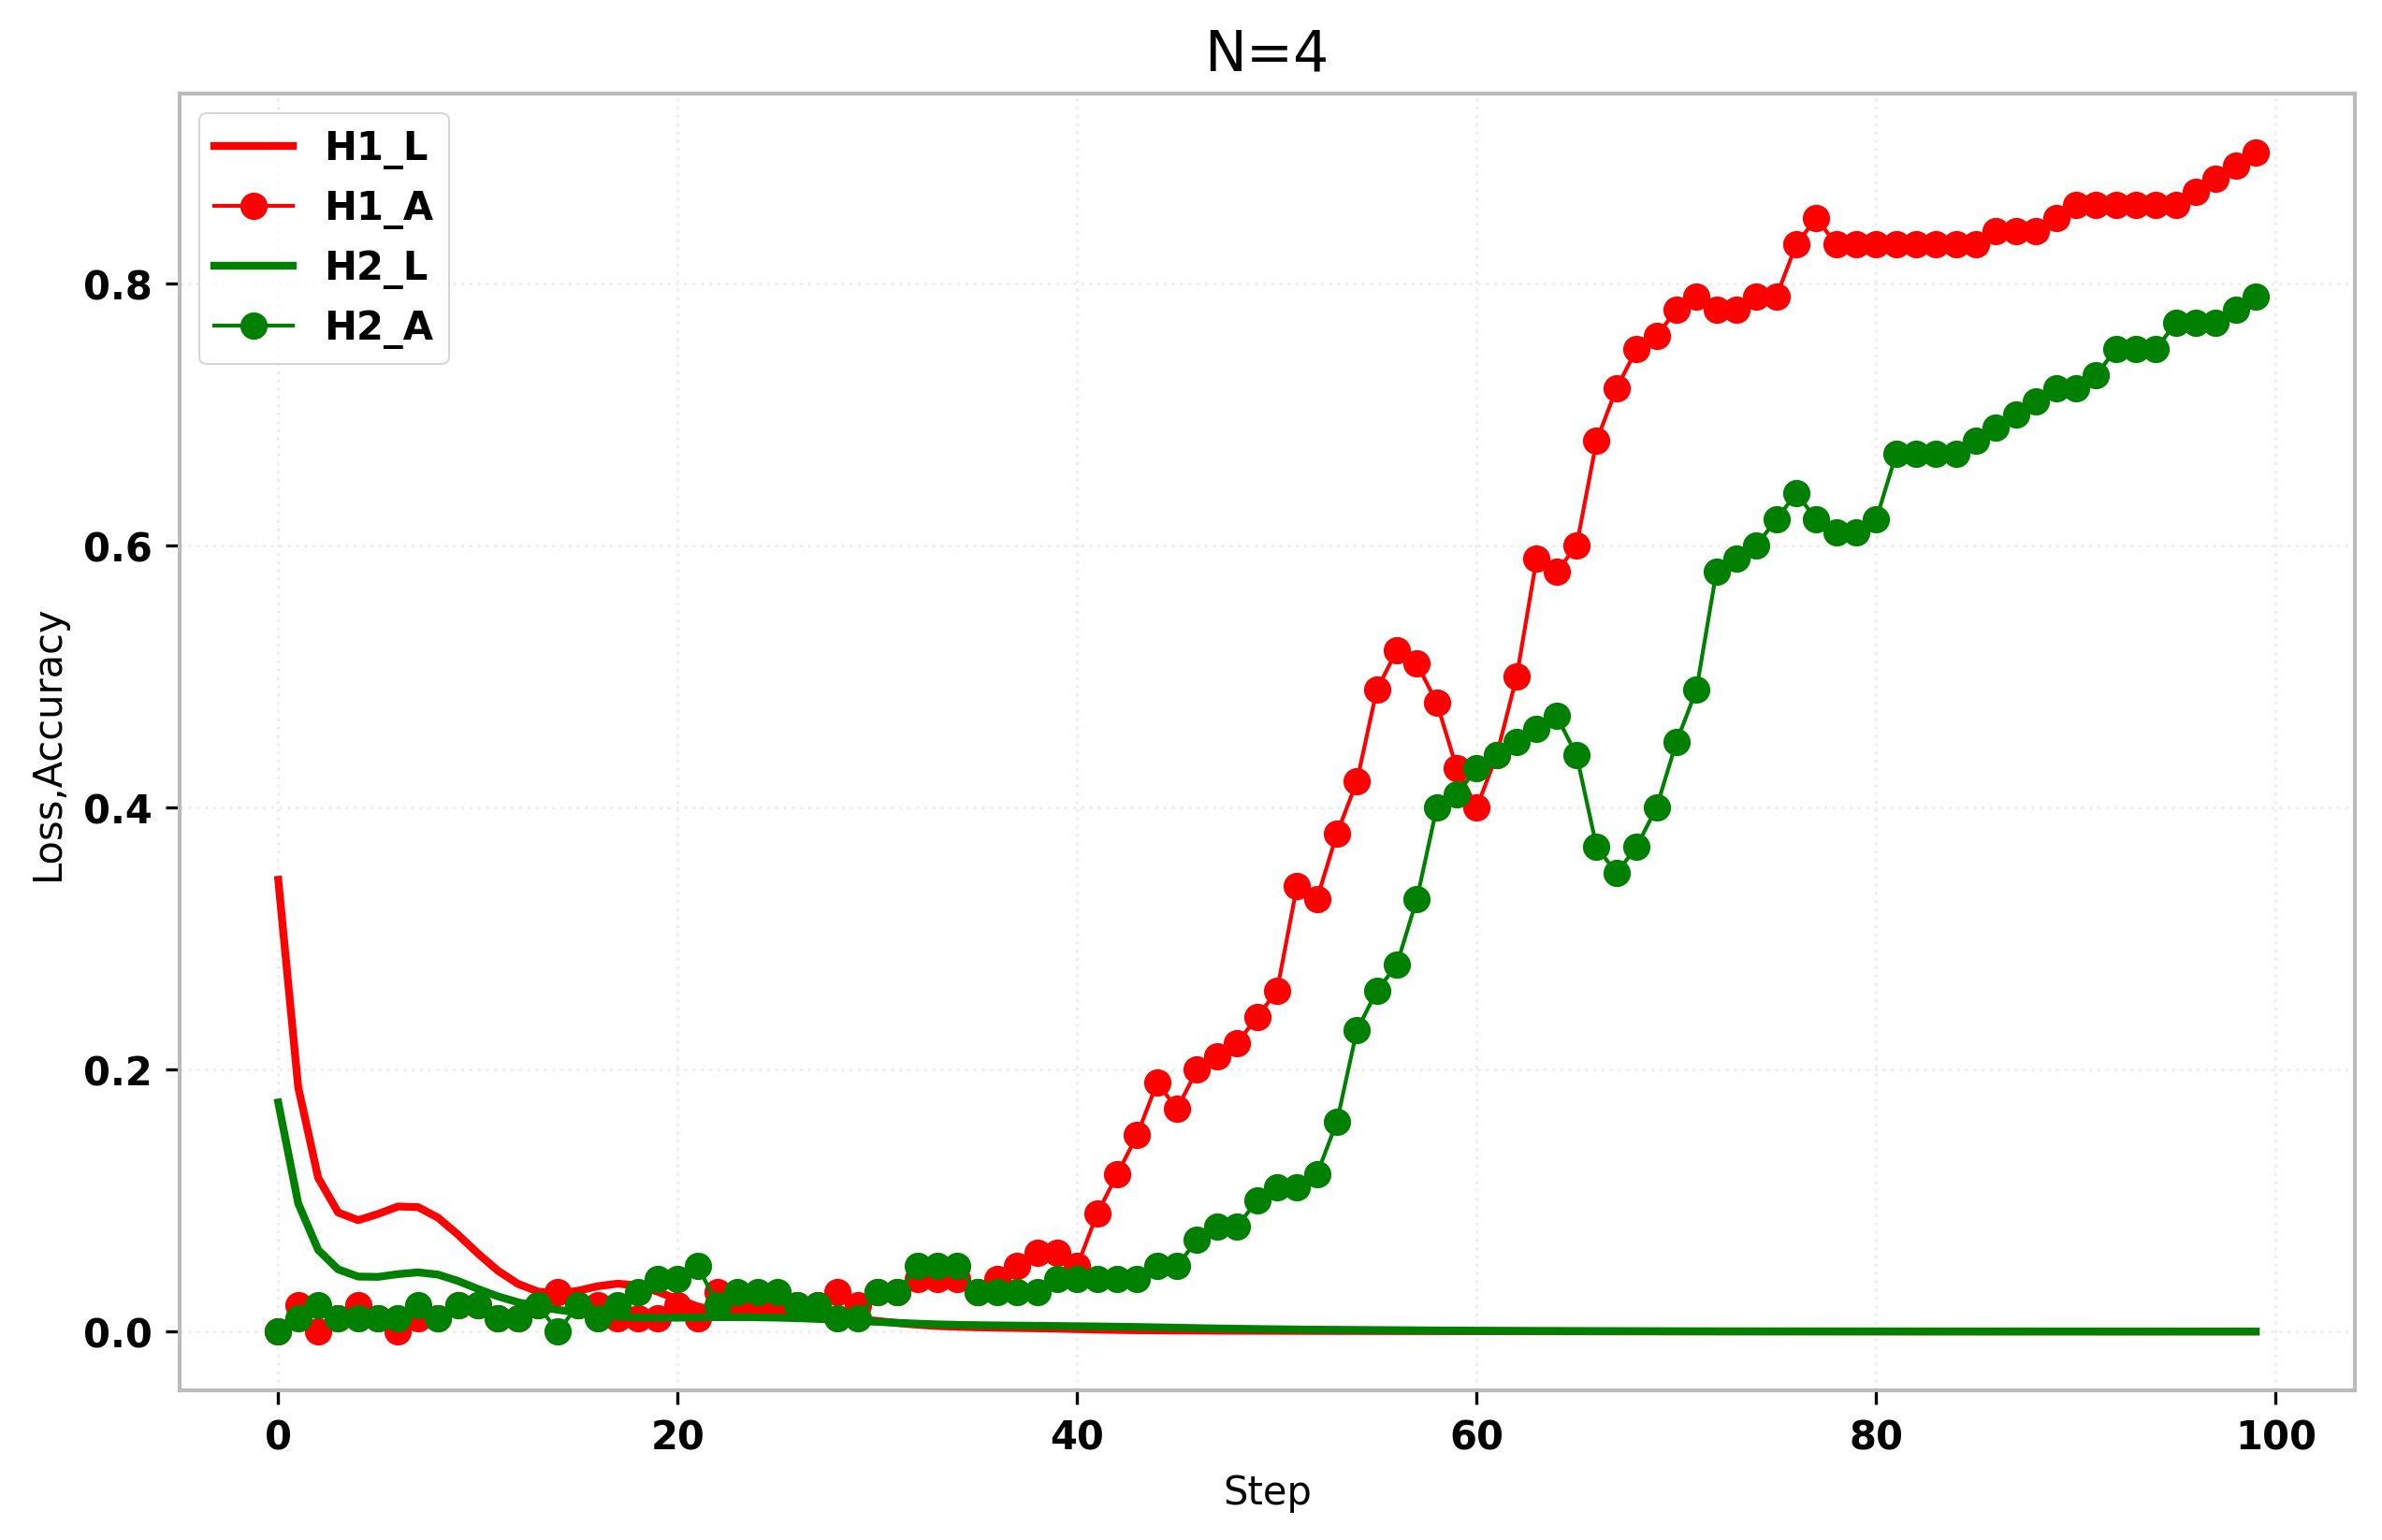

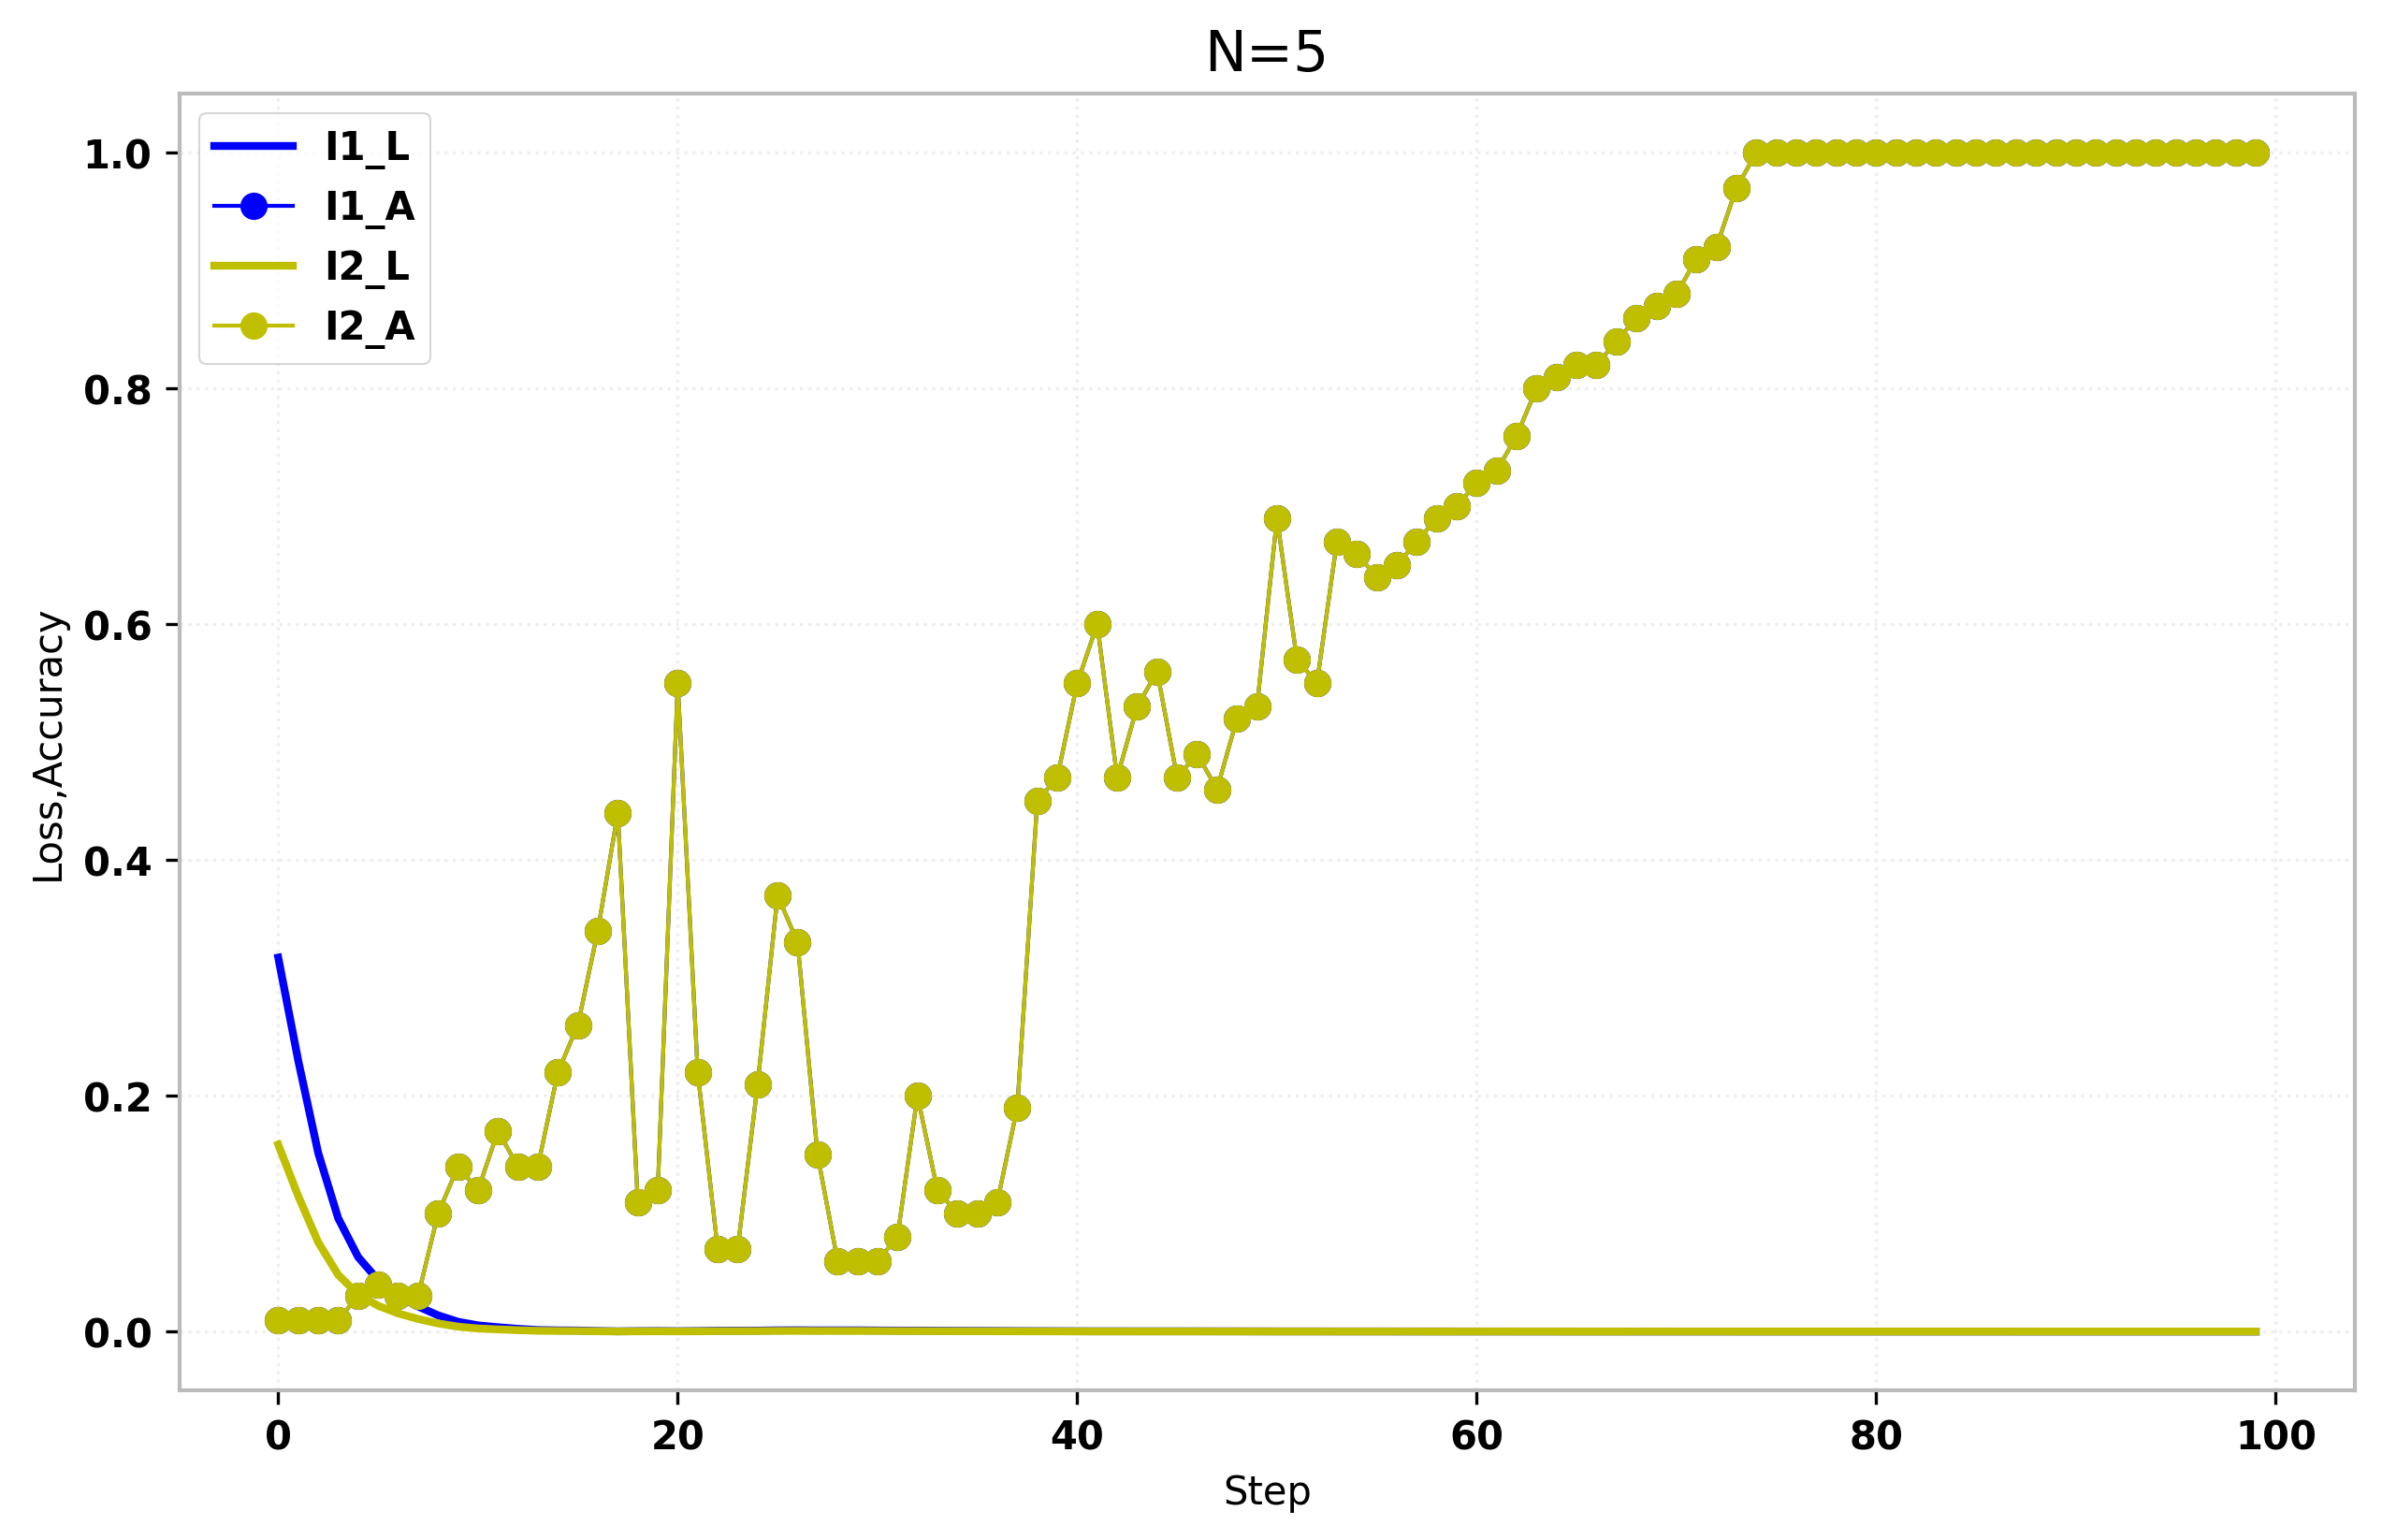

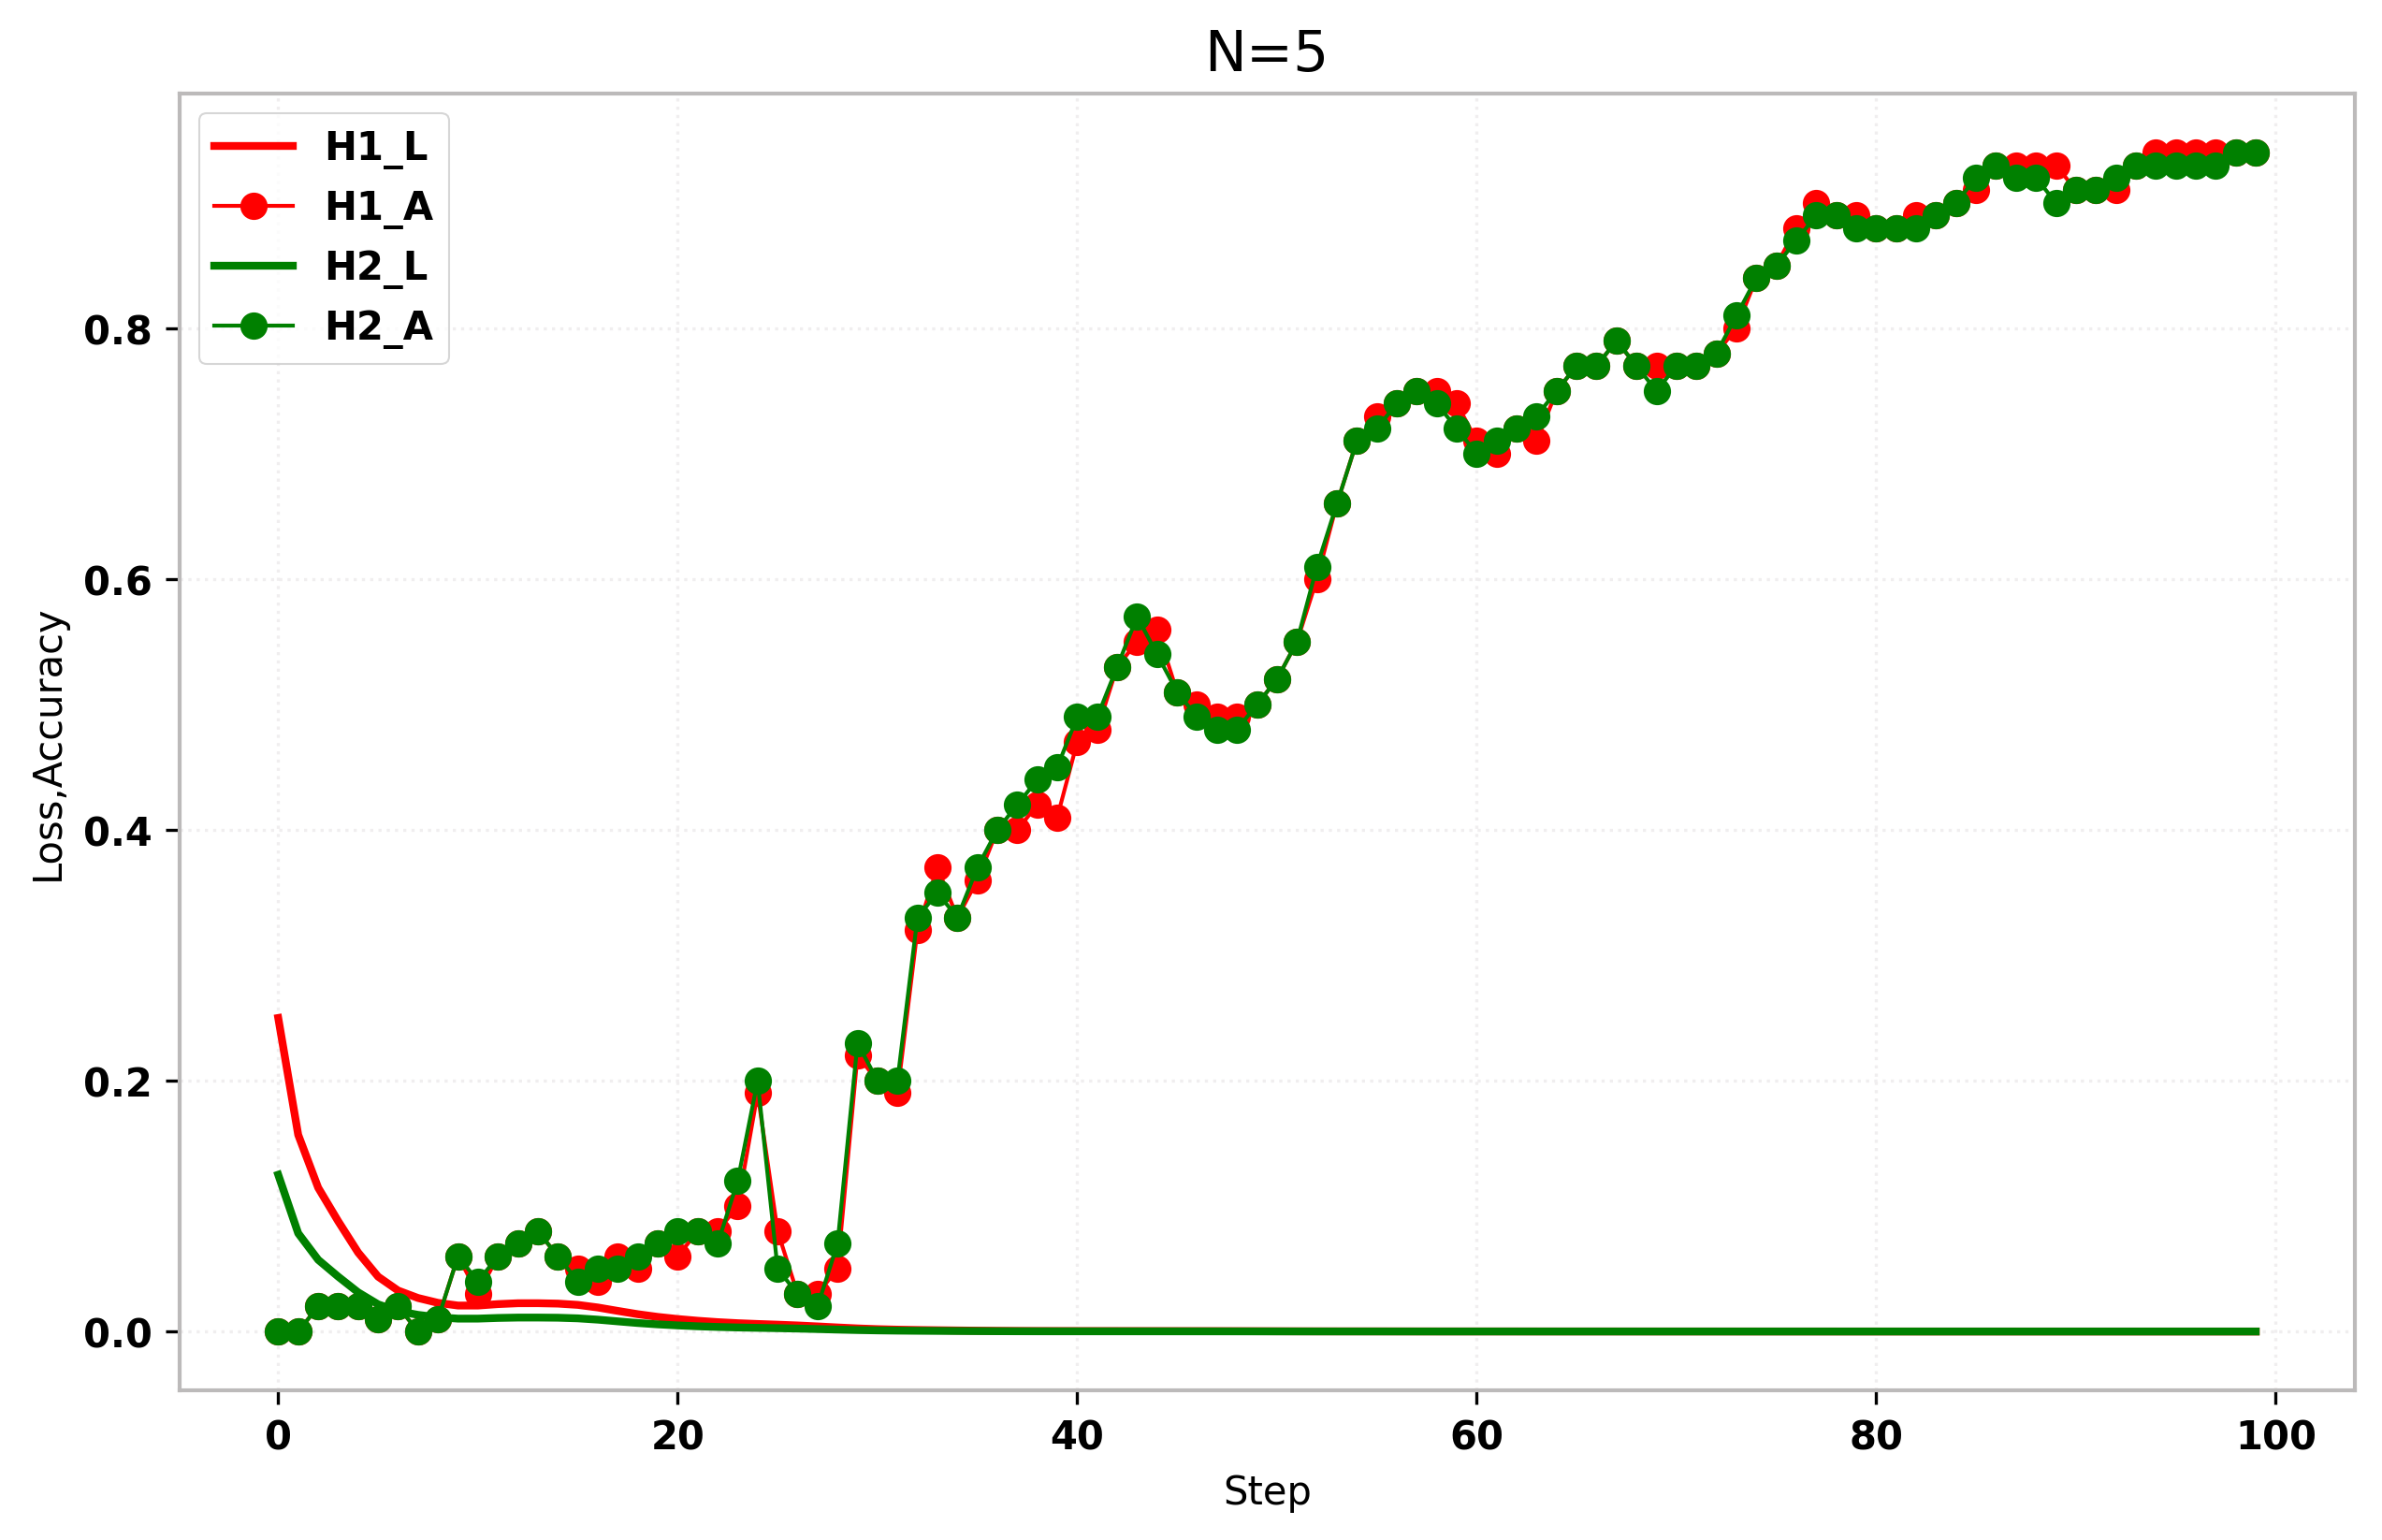

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num = [2, 3, 4, 5]

for n in num:
    H_M_n = globals().get(f"H_M_{n}")
    I_M_n = globals().get(f"I_M_{n}")
    H_H_n = globals().get(f"H_H_{n}")
    I_H_n = globals().get(f"I_H_{n}")
    
        # Extract columns
    stepsh = H_M_n[:, 0]
    lossesh = H_M_n[:, 1]
    ah= H_M_n[:,2]
    stepsi = I_M_n[:, 0]
    lossesi = I_M_n[:, 1]
    ai = I_M_n[:,2]
    stepsh2 = H_H_n[:, 0]
    lossesh2 = H_H_n[:, 1]
    ah2= H_H_n[:,2]
    stepsi2 = I_H_n[:, 0]
    lossesi2 = I_H_n[:, 1]
    ai2 = I_H_n[:,2]
    
        # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    #plt.plot(stepsh, lossesh, 'r-',linewidth=2,label=f'H1_L')
    plt.plot(stepsi, lossesi,'b-',linewidth=2, label=f'I1_L')
    #plt.plot(stepsh, ah, 'r--',linewidth=2,label=f'H1_A')
    plt.plot(stepsi, ai,'bo-',linewidth=1, label=f'I1_A')
    #plt.plot(stepsh2, lossesh2, 'g-',linewidth=2,label=f'H2_L')
    plt.plot(stepsi2, lossesi2,'y-',linewidth=2, label=f'I2_L')
    #plt.plot(stepsh2, ah2, 'g--',linewidth=2,label=f'H2_A')
    plt.plot(stepsi2, ai2,'yo-',linewidth=1, label=f'I2_A')
    plt.xlabel('Step')
    plt.ylabel('Loss,Accuracy')
    plt.title(f'N={n}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
   

    
        # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    plt.plot(stepsh, lossesh, 'r-',linewidth=2,label=f'H1_L')
    #plt.plot(stepsi, lossesi,'b-',linewidth=2, label=f'I1_L')
    plt.plot(stepsh, ah, 'ro-',linewidth=1,label=f'H1_A')
    #plt.plot(stepsi, ai,'bo-',linewidth=1, label=f'I1_A')
    plt.plot(stepsh2, lossesh2, 'g-',linewidth=2,label=f'H2_L')
    #plt.plot(stepsi2, lossesi2,'y-',linewidth=2, label=f'I2_L')
    plt.plot(stepsh2, ah2, 'go-',linewidth=1,label=f'H2_A')
    #plt.plot(stepsi2, ai2,'yo-',linewidth=1, label=f'I2_A')
    plt.xlabel('Step')
    plt.ylabel('Loss,Accuracy')
    plt.title(f'N={n}')
    plt.legend()
    plt.grid(True)
    plt.show()

**Summary of results**:

With the set of plots above we show that both our implementation models give rise to much higher accuracy than our first toy model (**almost for every implementation, we have had convergence**).
Even for 2 qubits, the Ising model shows accuracy converging to 1 with a higher number of steps. It can be ascertained that spin chain models serve as a good implementation of quantum machine learning models with their ability to show high expressivity. Huber Loss gives a better response in most of the models implemented above. 

Ising chain with `N=3` has the best accuracy output out of all our implementations. 


We attribute the following reasons for the output: 

1) In the Ising model with N=3, the interaction terms between spins are more balanced compared to models with fewer spins. With N=3, you have sufficient interactions to model complex behavior without excessive complexity. This balance leads to an effective representation of the sine function compared to smaller or larger N.
2) For N=3, the model has just the right amount of capacity to learn the function without overfitting. If N is too small, the model gets too simple to capture the function accurately and when N is too large, the model is susceptible to overfitting or becoming too complex, making effective learning harder for the model. 



**Conclusion**:

Using Huber Loss helps in achieving a balance between robustness and smooth optimization, which is useful in dealing with noisy or complex data. The Ising model with N=3 performs well due to its optimal balance of interaction terms, effective representational power, and training stability. These factors contribute to its superior performance in learning the sine function compared to other configurations.
It can be seen that the Ising model is performing better than our Hybrid model for all implementations. Thus in this specific scenario, we conclude increasing complexity is detrimental to learning. Whether that result is global for all cases is left for future analysis where we plan to implement a theoretical framework to see the direct effect of complexity on learning models. Further study on this line can include analysis for higher number of spins and how phase transition affects learning in spin models. 
In addition to showing the abililty of spin models to serve as quantum learning models we also establish the superiority of Huber Loss and shown the effect of complexity on learning for a case specific model.